**DATA DOWNLOADING**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the clinical data
clinical_data = pd.read_csv('crc_eo_2020_clinical_data.tsv', sep='\t')

# Load the mutation data
mutation_data = pd.read_csv('data_mutations.txt', sep='\t')

# Load the copy number alteration (CNA) data
cna_data = pd.read_csv('data_cna.txt', sep='\t')

# Load the structural variant (SV) data
sv_data = pd.read_csv('data_sv.txt', sep='\t')




/tmp/ipykernel_3950/2899963527.py:8: DtypeWarning: Columns (44) have mixed types. Specify dtype option on import or set low_memory=False.
  mutation_data = pd.read_csv('data_mutations.txt', sep='\t')


In [2]:
# Check the shape and first few rows of each dataset
print("Clinical Data:")
print(clinical_data.shape)
print(clinical_data.head())

print("\nMutation Data:")
print(mutation_data.shape)
print(mutation_data.head())

print("\nCNA Data:")
print(cna_data.shape)
print(cna_data.head())

print("\nSV Data:")
print(sv_data.shape)
print(sv_data.head())


Clinical Data:
(1516, 44)
      Study ID Patient ID          Sample ID  Age at Diagnosis Age Groups  \
0  crc_eo_2020  P-0000119  P-0000119-T01-IM3              67.0         AO   
1  crc_eo_2020  P-0000520  P-0000520-T01-IM3              64.0         AO   
2  crc_eo_2020  P-0000552  P-0000552-T01-IM3              63.0         AO   
3  crc_eo_2020  P-0000616  P-0000616-T01-IM3              58.0         AO   
4  crc_eo_2020  P-0000625  P-0000625-T01-IM3              68.0         AO   

  Age Subgroups   BMI BMI categories        Cancer Type  Cancer Type Detailed  \
0            AO  24.7             NW  Colorectal Cancer  Colon Adenocarcinoma   
1            AO  18.9             NW  Colorectal Cancer  Colon Adenocarcinoma   
2            AO  19.5             NW  Colorectal Cancer  Colon Adenocarcinoma   
3            AO  24.9             NW  Colorectal Cancer  Colon Adenocarcinoma   
4            AO  25.0             OW  Colorectal Cancer  Colon Adenocarcinoma   

   ...  Smoking history 

In [3]:
# Display basic information about the dataset
print(clinical_data.info())

# Show summary statistics for numerical columns
print(clinical_data.describe())

# Show summary statistics for categorical columns
print(clinical_data.describe(include=['O']))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1516 entries, 0 to 1515
Data columns (total 44 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Study ID                                   1516 non-null   object 
 1   Patient ID                                 1516 non-null   object 
 2   Sample ID                                  1516 non-null   object 
 3   Age at Diagnosis                           1513 non-null   float64
 4   Age Groups                                 1515 non-null   object 
 5   Age Subgroups                              1513 non-null   object 
 6   BMI                                        1439 non-null   float64
 7   BMI categories                             1455 non-null   object 
 8   Cancer Type                                1516 non-null   object 
 9   Cancer Type Detailed                       1516 non-null   object 
 10  Impact TMB Score        

The dataset contains 1,516 records (patients) with 44 columns. There are missing data in some columns.
   
The average age at diagnosis is around 51 years, with a standard deviation of approximately 13 years. The youngest patient was diagnosed at 14 years old, while the oldest was diagnosed at 93 years old.

The average BMI is approximately 27.37, which is on the higher end of the normal range (18.5 - 24.9), indicating that the patient population generally tends towards being overweight or obese.

The dataset predominantly focuses on "Colorectal Cancer" with the most detailed subtype being "Colon Adenocarcinoma."

About 55% of the patients have undergone metastasectomy.
  
The "Overall Survival (Months) from Dx of Met" has a mean of approximately 39.47 months, indicating that on average, patients survived around 3.3 years after diagnosis of metastasis.
There is considerable variability in survival times, ranging from 0 to over 26 years.

A significant proportion of patients (approximately 63%) have never smoked.

Tumor purity, average of 36.08%. 

There is a higher proportion of male patients (801 out of 1,461) compared to female patients.
The majority of patients are categorized as "WHITE", the data is biaed towards white.

**RAW DATA VISUALIZATIONS**

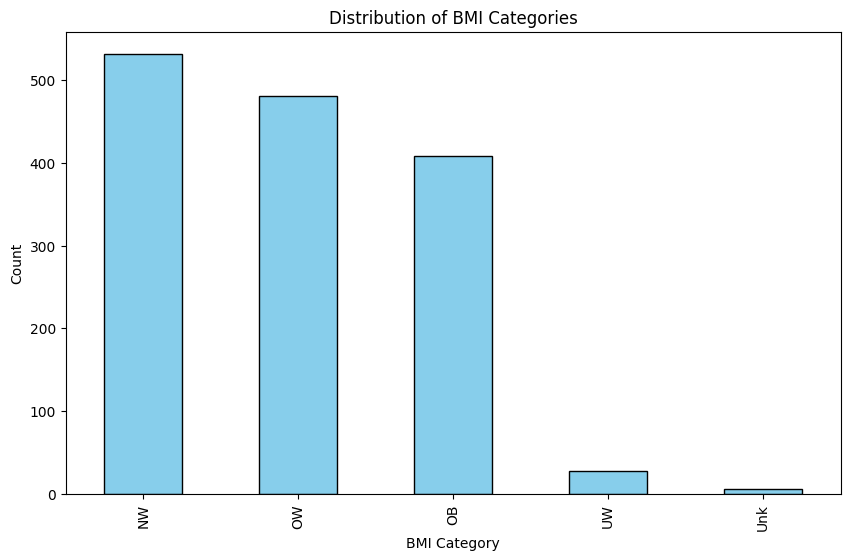

In [5]:
plt.figure(figsize=(10, 6))
clinical_data['BMI categories'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of BMI Categories')
plt.xlabel('BMI Category')
plt.ylabel('Count')
plt.show()


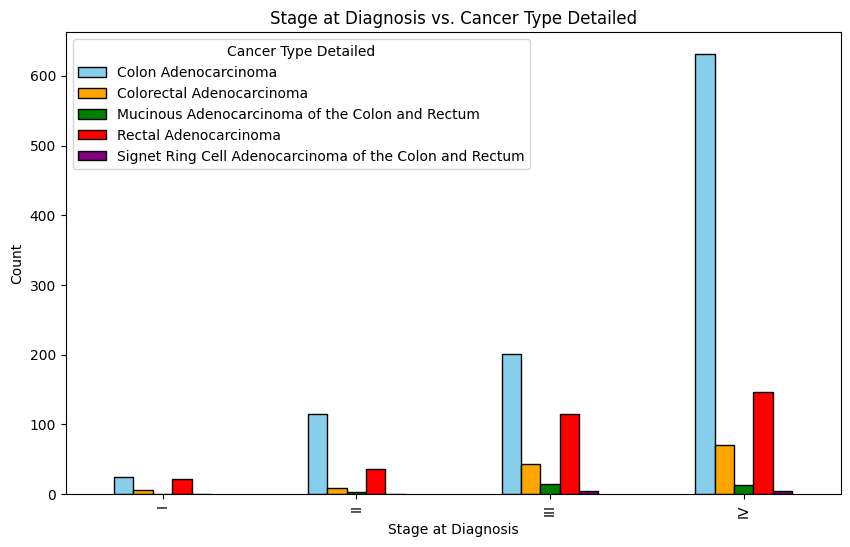

In [6]:
# Pivot the data to get counts for each combination of 'Stage at Diagnosis' and 'Cancer Type Detailed'
pivot_data = clinical_data.pivot_table(index='Stage at Diagnosis', columns='Cancer Type Detailed', aggfunc='size', fill_value=0)

# Plot the data
pivot_data.plot(kind='bar', stacked=False, figsize=(10, 6), color=['skyblue', 'orange', 'green', 'red', 'purple', 'brown'], edgecolor='black')
plt.title('Stage at Diagnosis vs. Cancer Type Detailed')
plt.xlabel('Stage at Diagnosis')
plt.ylabel('Count')
plt.legend(title='Cancer Type Detailed')
plt.show()


**DATA CLEANING**

In [7]:
# Check for missing values
missing_values = clinical_data.isnull().sum()
print(missing_values[missing_values > 0])

Age at Diagnosis                              3
Age Groups                                    1
Age Subgroups                                 3
BMI                                          77
BMI categories                               61
Impact TMB Score                              8
Diabetes Mellitus History                    60
First Symptoms at Diagnosis                  87
Fraction Genome Altered                       3
Hypertension History                         67
Metastasectomy                              380
Metastatic Site                             902
Molecular Subtype                            48
MSI Score                                     3
MSI Type                                      3
Mutation Count                               12
Overall Survival (Months) from Dx of Met    376
Overall Survival Status                     376
Primary Tumor Location                       67
PUMP                                        379
Race Category                           

In [8]:
#Handle missing values
threshold = 0.3 #more than 30% missing
clinical_data_cleaned = clinical_data.dropna(thresh=len(clinical_data) * (1 - threshold), axis=1)

# fill missing values with appropriate methods (mean, median, mode, etc.)
clinical_data_cleaned['BMI'].fillna(clinical_data_cleaned['BMI'].median(), inplace=True)
clinical_data_cleaned['Age at Diagnosis'].fillna(clinical_data_cleaned['Age at Diagnosis'].median(), inplace=True)
clinical_data['BMI categories'].fillna(clinical_data['BMI categories'].mode()[0], inplace=True)
clinical_data['Stage at Diagnosis'].fillna(clinical_data['Stage at Diagnosis'].mode()[0], inplace=True)

#Checking for duplicates and remove them
duplicates = clinical_data_cleaned.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")
clinical_data_cleaned = clinical_data_cleaned.drop_duplicates()

# Converting data type
clinical_data_cleaned['Age at Diagnosis'] = pd.to_numeric(clinical_data_cleaned['Age at Diagnosis'], errors='coerce')

# Standardizing categorical data 
clinical_data_cleaned['Sex'] = clinical_data_cleaned['Sex'].str.capitalize()

print("\nCleaned data:")
print(clinical_data_cleaned.head())



Number of duplicate rows: 0

Cleaned data:
      Study ID Patient ID          Sample ID  Age at Diagnosis Age Groups  \
0  crc_eo_2020  P-0000119  P-0000119-T01-IM3              67.0         AO   
1  crc_eo_2020  P-0000520  P-0000520-T01-IM3              64.0         AO   
2  crc_eo_2020  P-0000552  P-0000552-T01-IM3              63.0         AO   
3  crc_eo_2020  P-0000616  P-0000616-T01-IM3              58.0         AO   
4  crc_eo_2020  P-0000625  P-0000625-T01-IM3              68.0         AO   

  Age Subgroups   BMI BMI categories        Cancer Type  Cancer Type Detailed  \
0            AO  24.7             NW  Colorectal Cancer  Colon Adenocarcinoma   
1            AO  18.9             NW  Colorectal Cancer  Colon Adenocarcinoma   
2            AO  19.5             NW  Colorectal Cancer  Colon Adenocarcinoma   
3            AO  24.9             NW  Colorectal Cancer  Colon Adenocarcinoma   
4            AO  25.0             OW  Colorectal Cancer  Colon Adenocarcinoma   

   ... 

/tmp/ipykernel_3883/2599726430.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  clinical_data_cleaned['BMI'].fillna(clinical_data_cleaned['BMI'].median(), inplace=True)
/tmp/ipykernel_3883/2599726430.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clinical_data_cleaned['BMI'].fillna(clinical_data_cleaned['BMI'].median(), inplace=True)
/

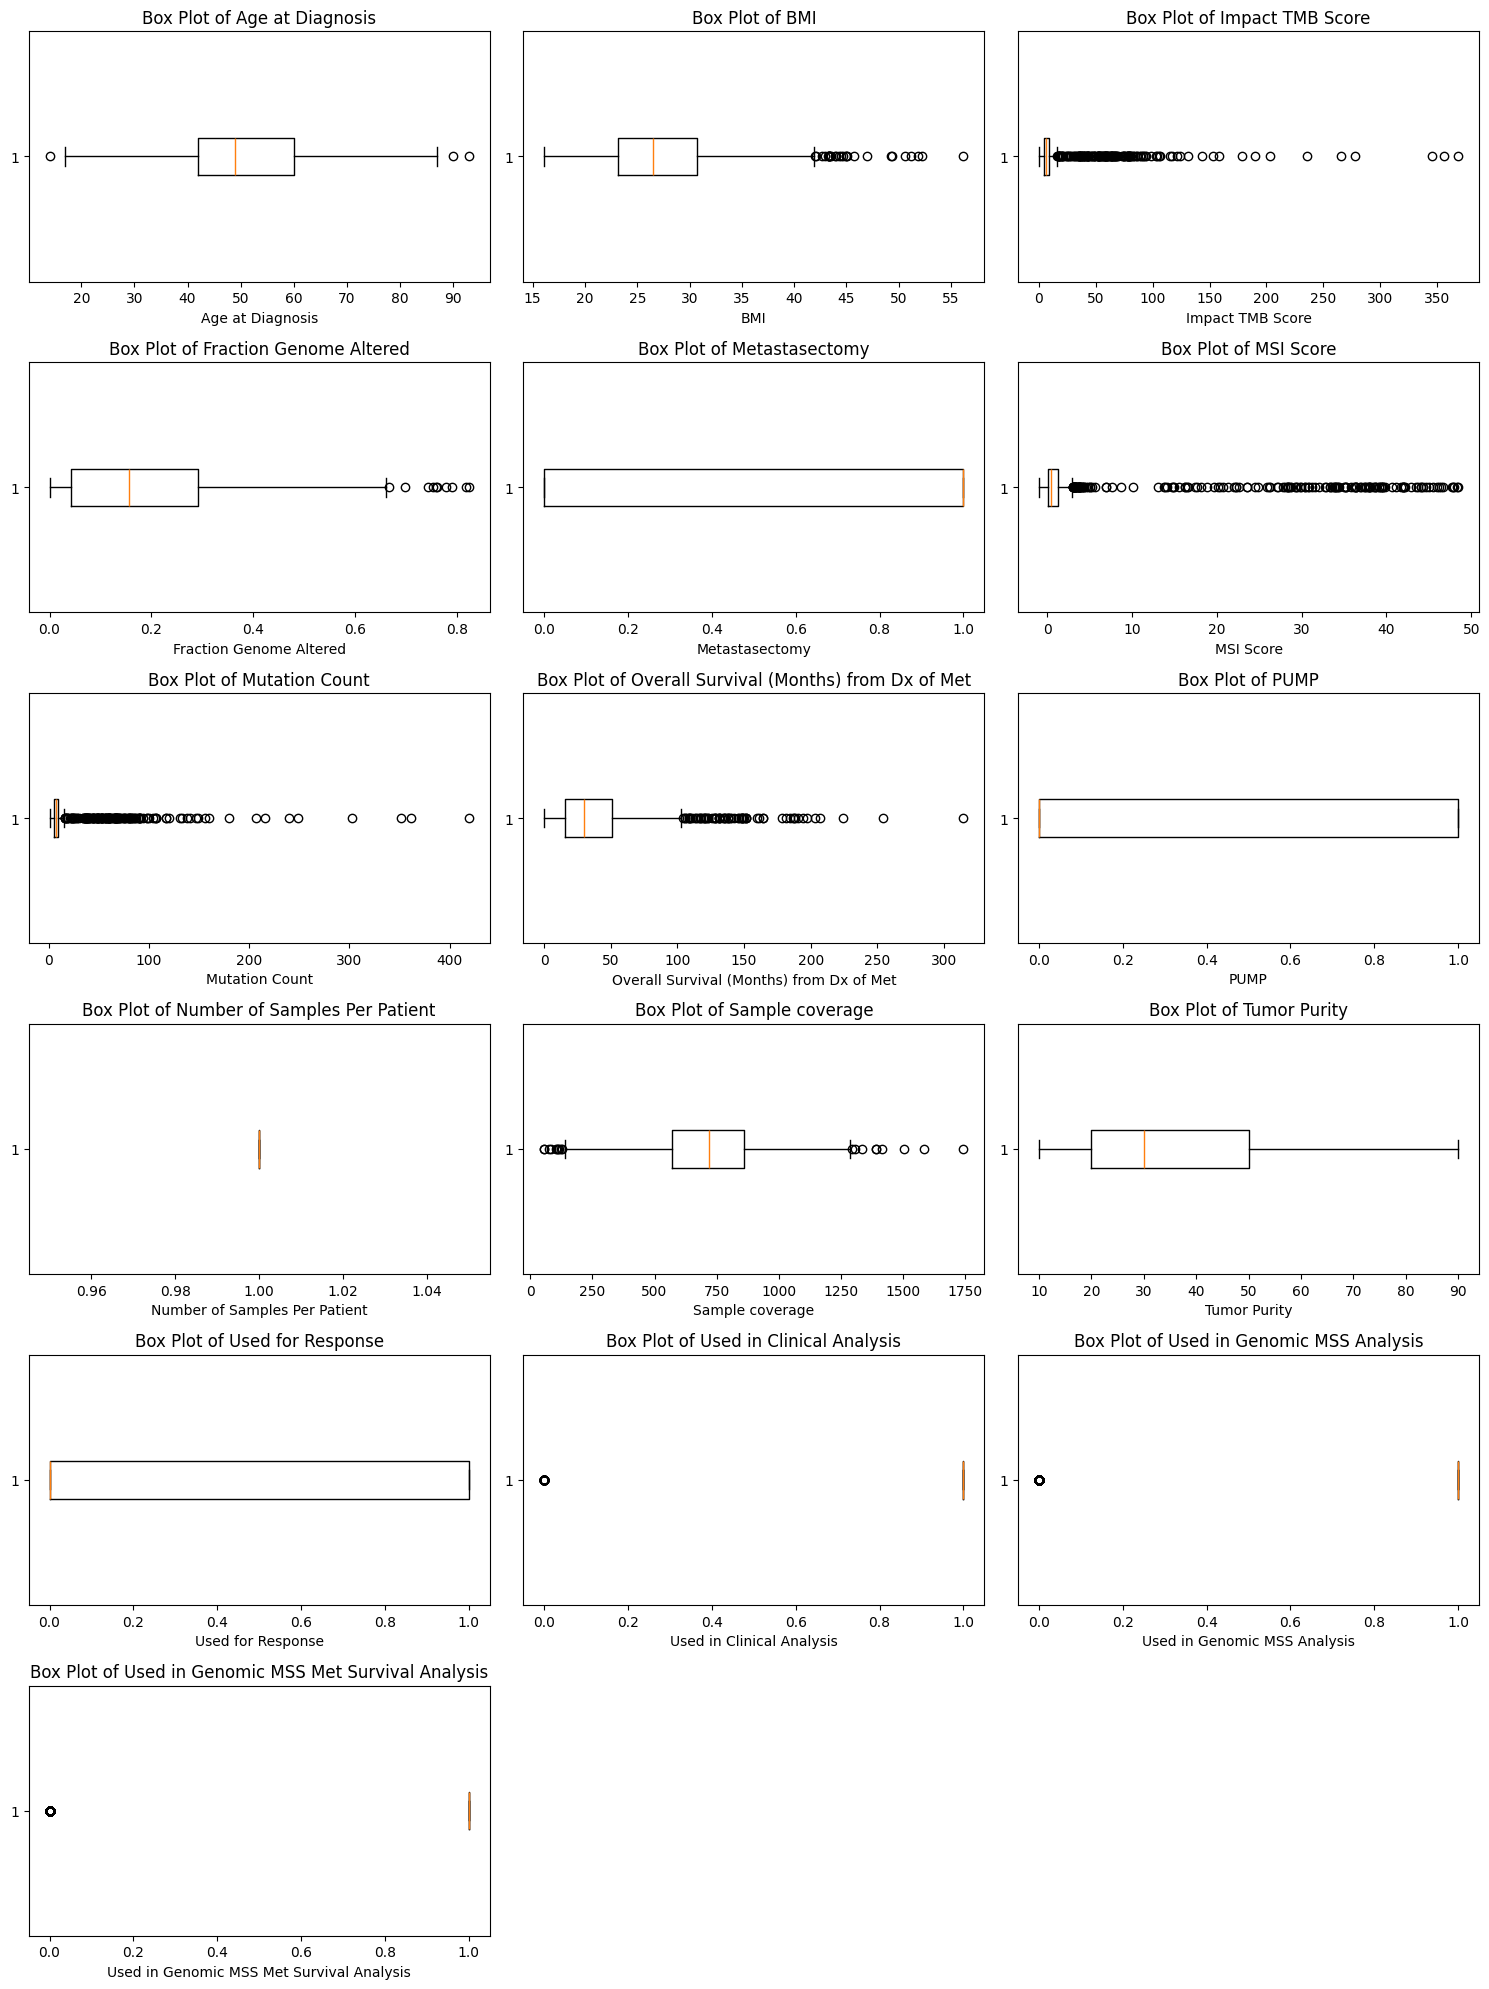

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_columns = clinical_data.select_dtypes(include=['float64', 'int64']).columns

# Set up the plotting space
plt.figure(figsize=(15, 20))

# Loop through each numeric column and create a box plot for each
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(len(numeric_columns) // 3 + 1, 3, i)
    plt.boxplot(clinical_data[column].dropna(), vert=False)
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)
    plt.tight_layout()

# Show all plots
plt.show()


(938, 42)


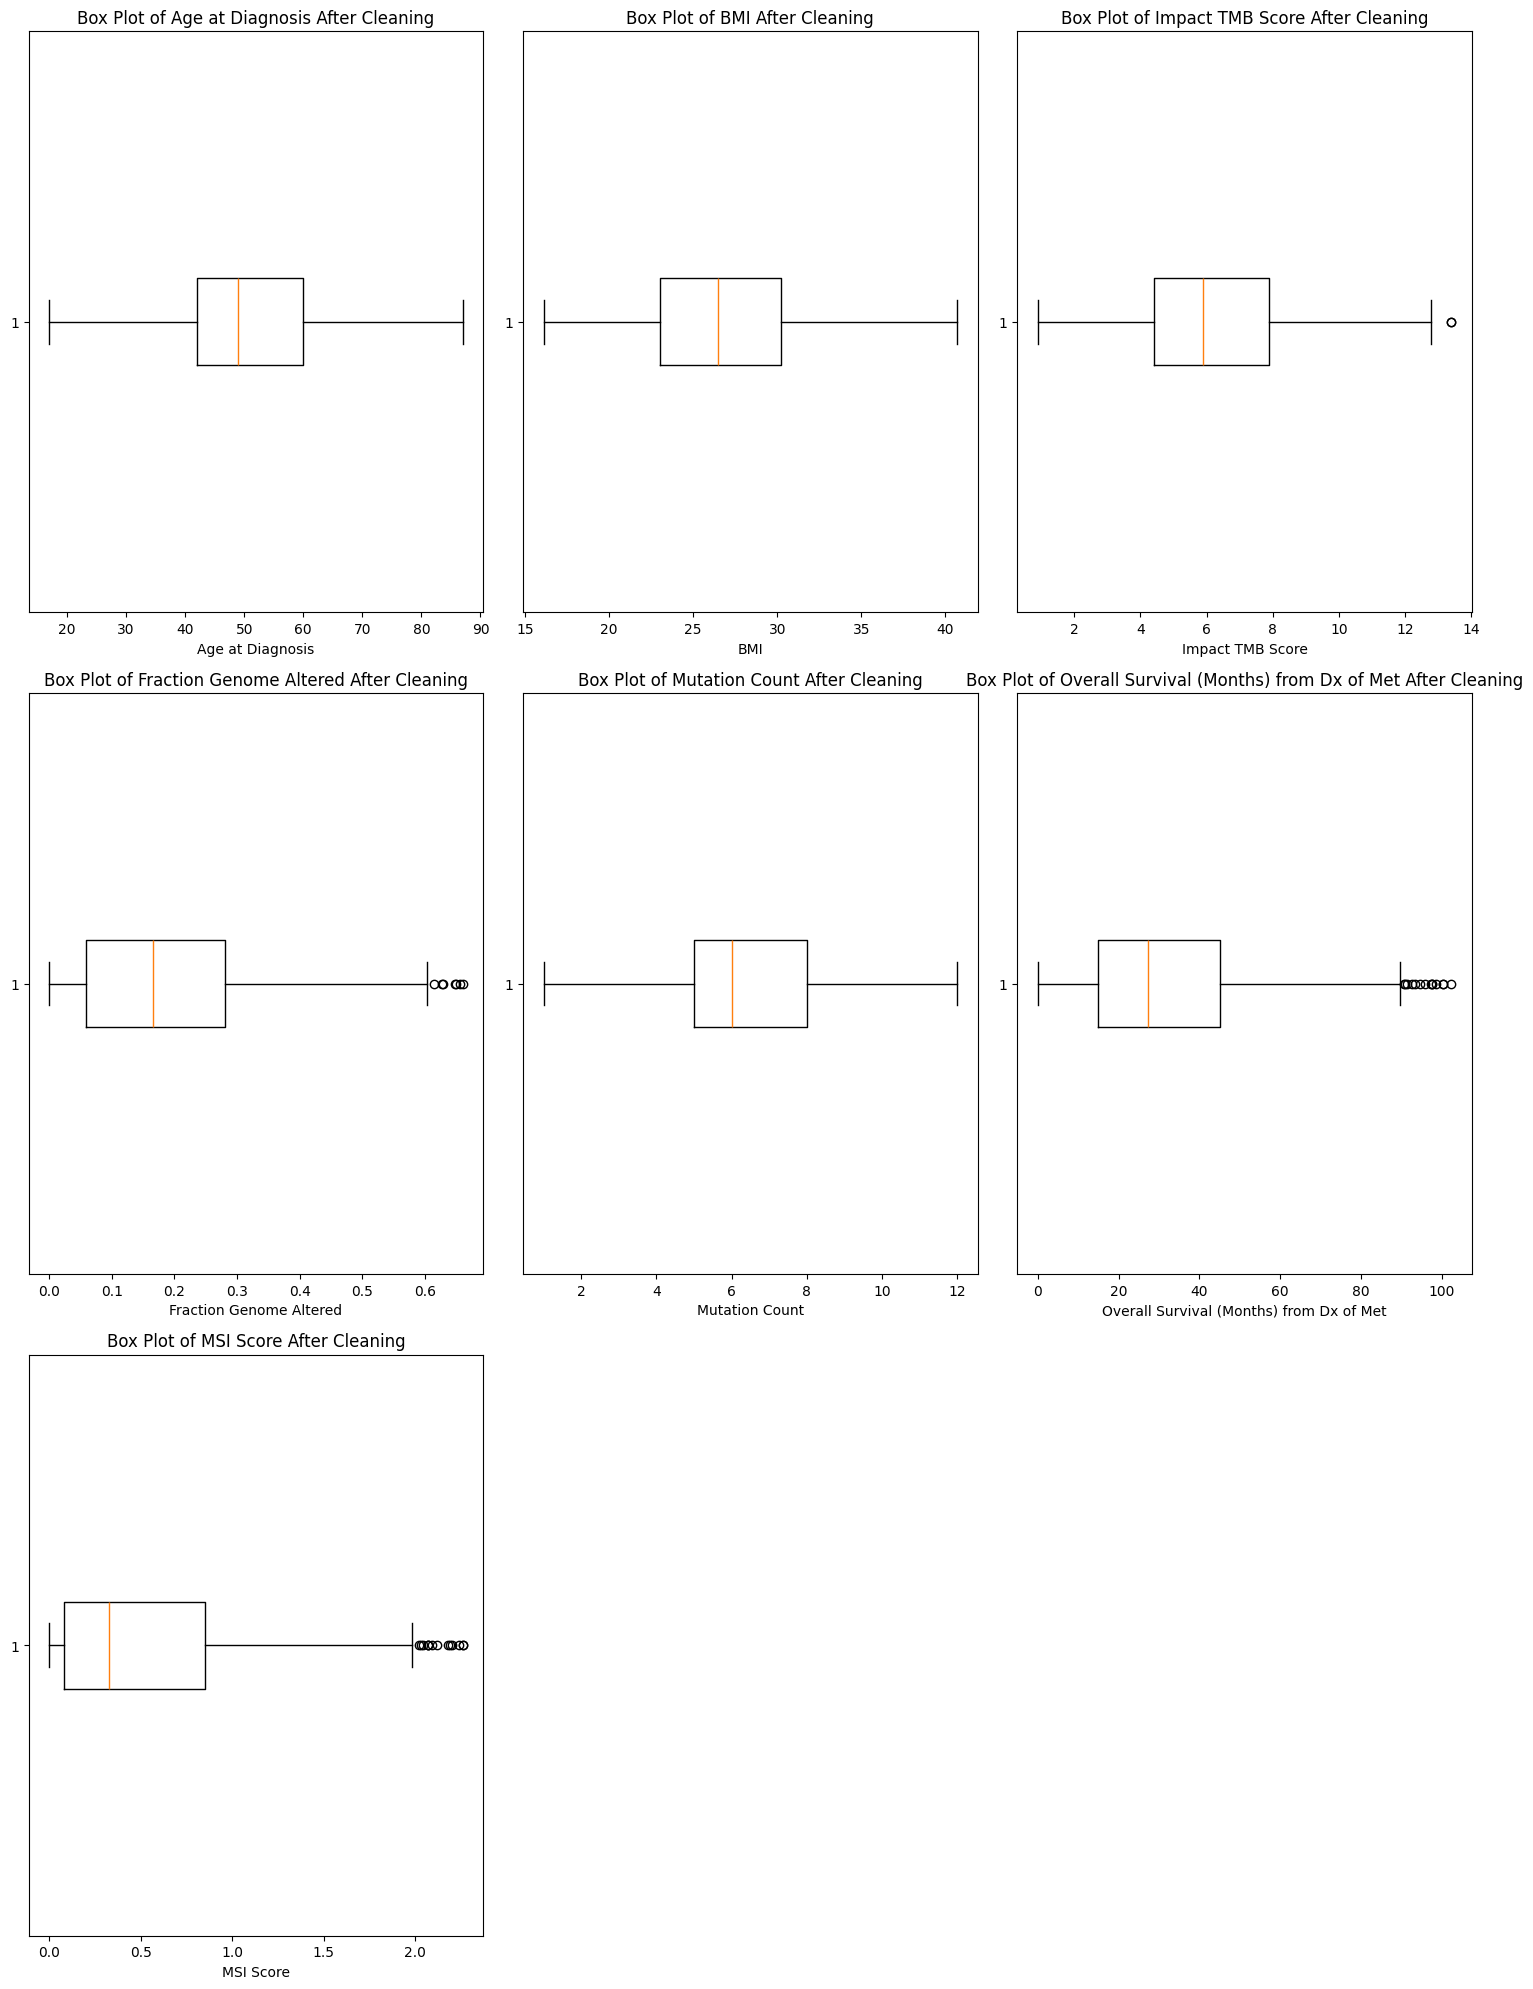

In [10]:
# Define a function to remove outliers based on IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# List of columns where outliers should be removed
columns_to_clean = ['Age at Diagnosis', 'BMI', 'Impact TMB Score', 
                    'Fraction Genome Altered', 'Mutation Count', 
                    'Overall Survival (Months) from Dx of Met', 'MSI Score']

# Apply the outlier removal function to each column
for column in columns_to_clean:
    clinical_data_cleaned = remove_outliers(clinical_data_cleaned, column)

# Verify the shape of the data after outlier removal
print(clinical_data_cleaned.shape)

# Replot the boxplots to verify outliers are removed
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 20))
for i, column in enumerate(columns_to_clean, 1):
    plt.subplot(len(columns_to_clean) // 3 + 1, 3, i)
    plt.boxplot(clinical_data_cleaned[column].dropna(), vert=False)
    plt.title(f'Box Plot of {column} After Cleaning')
    plt.xlabel(column)
    plt.tight_layout()

plt.show()


In [11]:
# Display basic information about the dataset
print(mutation_data.info())

# Show summary statistics for numerical columns
print(mutation_data.describe())

# Show summary statistics for categorical columns
print(mutation_data.describe(include=['O']))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20199 entries, 0 to 20198
Data columns (total 46 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Hugo_Symbol                    20199 non-null  object 
 1   Entrez_Gene_Id                 20199 non-null  int64  
 2   Center                         20199 non-null  object 
 3   NCBI_Build                     20199 non-null  object 
 4   Chromosome                     20199 non-null  object 
 5   Start_Position                 20199 non-null  int64  
 6   End_Position                   20199 non-null  int64  
 7   Strand                         20199 non-null  object 
 8   Consequence                    20199 non-null  object 
 9   Variant_Classification         20199 non-null  object 
 10  Variant_Type                   20199 non-null  object 
 11  Reference_Allele               20199 non-null  object 
 12  Tumor_Seq_Allele1              20199 non-null 

In [12]:
# Dropping columns with too many missing values
cols_to_drop = [
    'dbSNP_Val_Status', 'Matched_Norm_Sample_Barcode', 'Match_Norm_Seq_Allele1', 'Match_Norm_Seq_Allele2',
    'Tumor_Validation_Allele1', 'Tumor_Validation_Allele2', 'Match_Norm_Validation_Allele1', 'Match_Norm_Validation_Allele2',
    'Verification_Status', 'Validation_Method', 'BAM_File', 'Sequencer', 'Sequence_Source', 'Sequencing_Phase'
]
mutation_data_cleaned = mutation_data.drop(columns=cols_to_drop)

# Filling missing values in important columns
# Use .loc[] to modify the DataFrame in place without triggering the warning
mutation_data_cleaned.loc[:, 'Validation_Status'] = mutation_data_cleaned['Validation_Status'].fillna('Not Validated')
mutation_data_cleaned.loc[:, 'HGVSc'] = mutation_data_cleaned['HGVSc'].fillna('Unknown')
mutation_data_cleaned.loc[:, 'HGVSp'] = mutation_data_cleaned['HGVSp'].fillna('Unknown')
mutation_data_cleaned.loc[:, 'HGVSp_Short'] = mutation_data_cleaned['HGVSp_Short'].fillna('Unknown')


# Standardizing some columns
mutation_data_cleaned['Hugo_Symbol'] = mutation_data_cleaned['Hugo_Symbol'].str.upper()
mutation_data_cleaned['Variant_Classification'] = mutation_data_cleaned['Variant_Classification'].str.replace('_', ' ').str.capitalize()

# Removing duplicate rows if any
mutation_data_cleaned.drop_duplicates(inplace=True)

# Ensuring correct data types
mutation_data_cleaned['Start_Position'] = pd.to_numeric(mutation_data_cleaned['Start_Position'], errors='coerce')
mutation_data_cleaned['End_Position'] = pd.to_numeric(mutation_data_cleaned['End_Position'], errors='coerce')
mutation_data_cleaned['Protein_position'] = pd.to_numeric(mutation_data_cleaned['Protein_position'], errors='coerce')

# Drop unnecessary columns
mutation_data_cleaned = mutation_data_cleaned.drop(columns=['Score', 'Hotspot', 'Annotation_Status', 'Transcript_ID', 'RefSeq'])

# Final check
print(mutation_data_cleaned.info())


<class 'pandas.core.frame.DataFrame'>
Index: 20168 entries, 0 to 20198
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Hugo_Symbol             20168 non-null  object 
 1   Entrez_Gene_Id          20168 non-null  int64  
 2   Center                  20168 non-null  object 
 3   NCBI_Build              20168 non-null  object 
 4   Chromosome              20168 non-null  object 
 5   Start_Position          20168 non-null  int64  
 6   End_Position            20168 non-null  int64  
 7   Strand                  20168 non-null  object 
 8   Consequence             20168 non-null  object 
 9   Variant_Classification  20168 non-null  object 
 10  Variant_Type            20168 non-null  object 
 11  Reference_Allele        20168 non-null  object 
 12  Tumor_Seq_Allele1       20168 non-null  object 
 13  Tumor_Seq_Allele2       20168 non-null  object 
 14  dbSNP_RS                9589 non-null   obj

In [13]:
# Display basic information about the dataset
print(cna_data.info())

# Show summary statistics for numerical columns
print(cna_data.describe())

# Show summary statistics for categorical columns
print(cna_data.describe(include=['O']))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Columns: 1514 entries, Hugo_Symbol to P-0009433-T01-IM5
dtypes: int64(1513), object(1)
memory usage: 6.2+ MB
None
       P-0024260-T01-IM6  P-0035326-T01-IM6  P-0003886-T01-IM5  \
count              541.0              541.0         541.000000   
mean                 0.0                0.0          -0.003697   
std                  0.0                0.0           0.085987   
min                  0.0                0.0          -2.000000   
25%                  0.0                0.0           0.000000   
50%                  0.0                0.0           0.000000   
75%                  0.0                0.0           0.000000   
max                  0.0                0.0           0.000000   

       P-0007486-T01-IM5  P-0004011-T01-IM5  P-0030238-T01-IM6  \
count              541.0              541.0         541.000000   
mean                 0.0                0.0           0.022181   
std                  

In [14]:
# Check for missing values in the dataset
missing_values = cna_data.isnull().sum()
print(missing_values[missing_values > 0])

# Fill missing values in CNA columns with the median of each column
for column in cna_data.columns[1:]:  # Skip the 'Hugo_Symbol' column
    cna_data[column] = cna_data[column].fillna(cna_data[column].median())
    
# Function to remove outliers based on IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Apply the outlier removal to each column in CNA data
for column in cna_data.columns[1:]:  # Skip 'Hugo_Symbol'
    cna_data = remove_outliers(cna_data, column)
from sklearn.preprocessing import StandardScaler

# 4. Standardize CNA Values
scaler = StandardScaler()
cna_data_cleaned = cna_data.copy()  # Store cleaned data into a new variable
cna_data_cleaned[cna_data_cleaned.columns[1:]] = scaler.fit_transform(cna_data_cleaned[cna_data_cleaned.columns[1:]])

# 5. Verify the Cleaning Process
print(cna_data_cleaned.isnull().sum().sum())  # Ensure no missing values
print("Shape of cleaned CNA data:", cna_data_cleaned.shape)



Series([], dtype: int64)
0
Shape of cleaned CNA data: (240, 1514)


In [15]:
import pandas as pd

# Assuming sv_data is already loaded
sv_data_cleaned = sv_data.copy()

# Handle missing values for categorical columns by filling with the most frequent value (mode)
for column in sv_data_cleaned.select_dtypes(include=['object']).columns:
    if not sv_data_cleaned[column].mode().empty:
        sv_data_cleaned[column].fillna(sv_data_cleaned[column].mode()[0], inplace=True)
    else:
        sv_data_cleaned[column].fillna('Unknown', inplace=True)

# Handle missing values for numerical columns by filling with the median
for column in sv_data_cleaned.select_dtypes(include=['float64', 'int64']).columns:
    sv_data_cleaned[column].fillna(sv_data_cleaned[column].median(), inplace=True)

# After cleaning, check if there are any remaining missing values
print("Remaining missing values:", sv_data_cleaned.isnull().sum().sum())

# Verify cleaned data
print(sv_data_cleaned.head())




Remaining missing values: 812
           Sample_Id Site1_Chromosome  \
0  P-0012110-T01-IM5                3   
1  P-0012623-T01-IM5               15   
2  P-0011259-T01-IM5                8   
3  P-0013277-T01-IM5               13   
4  P-0012779-T01-IM5               15   

                         Site1_Description  Site1_Region  Site1_Region_Number  \
0  Intron of PBRM1(-): 131bp after exon 29           NaN                  NaN   
1    Intron of MGA(+): 75bp before exon 16           NaN                  NaN   
2               IGR: 295Kb before GFRA2(-)           NaN                  NaN   
3               IGR: 16Kb before AKAP11(+)           NaN                  NaN   
4                         Exon 1 of B2M(+)           NaN                  NaN   

  Site1_Hugo_Symbol  Site1_Position Site2_Chromosome  \
0             PBRM1      52584306.0                3   
1               MGA      42041234.0                9   
2             GFRA2      21254285.0                4   
3           

/tmp/ipykernel_3883/3603281136.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sv_data_cleaned[column].fillna(sv_data_cleaned[column].mode()[0], inplace=True)
/tmp/ipykernel_3883/3603281136.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].me

In [3]:
#############################
# Step 1: Clean the clinical data

# Keep relevant columns for survival analysis
clinical_columns = ['Patient ID', 'Overall Survival (Months) from Dx of Met', 'Overall Survival Status', 'Age at Diagnosis', 'BMI']

# Remove rows with missing survival time or status
clinical_data_cleaned = clinical_data[clinical_columns].dropna(subset=['Overall Survival (Months) from Dx of Met', 'Overall Survival Status'])

# Check the cleaned clinical data
print("Cleaned Clinical Data:")
print(clinical_data_cleaned.head())


Cleaned Clinical Data:
  Patient ID  Overall Survival (Months) from Dx of Met  \
0  P-0000119                                 27.350427   
1  P-0000520                                 63.773833   
2  P-0000552                                 16.042078   
3  P-0000616                                 19.395135   
4  P-0000625                                 16.798159   

  Overall Survival Status  Age at Diagnosis   BMI  
0              1:DECEASED              67.0  24.7  
1                0:LIVING              64.0  18.9  
2              1:DECEASED              63.0  19.5  
3              1:DECEASED              58.0  24.9  
4              1:DECEASED              68.0  25.0  


In [4]:
# Step 2: Clean the mutation data

# Pivot mutation data to get mutation presence for each patient
mutation_presence = mutation_data.pivot_table(
    index='Tumor_Sample_Barcode', 
    columns='Hugo_Symbol', 
    aggfunc=lambda x: 1, 
    fill_value=0
)

# Check the cleaned mutation data
print("Mutation Presence Data (Binary Matrix):")
print(mutation_presence.head())


Mutation Presence Data (Binary Matrix):
                     Annotation_Status                                        \
Hugo_Symbol                       ABL1 ACVR1 AGO2 AKT1 AKT2 AKT3 ALK ALOX12B   
Tumor_Sample_Barcode                                                           
P-0000119-T01-IM3                    0     0    0    0    0    0   0       0   
P-0000520-T01-IM3                    0     0    0    0    0    0   0       0   
P-0000552-T01-IM3                    0     0    0    0    0    0   0       0   
P-0000616-T01-IM3                    0     0    0    0    0    0   0       0   
P-0000625-T01-IM3                    0     0    0    0    0    0   1       0   

                                    ... t_ref_count                            \
Hugo_Symbol          AMER1 ANKRD11  ...     WHSC1L1 WT1 WWTR1 XIAP XPO1 XRCC2   
Tumor_Sample_Barcode                ...                                         
P-0000119-T01-IM3        0       0  ...           0   0     0    0    0     

In [9]:
import pandas as pd
from lifelines import CoxPHFitter

# List of columns that have low variance or might cause convergence issues
low_variance_columns = ['Number of Samples Per Patient', 'Used in Clinical Analysis', 
                        'Used in Genomic MSS Analysis', 'Used in Genomic MSS Met Survival Analysis']

# Drop non-numeric columns and low variance columns
non_numeric_columns = ['Study ID', 'Age Groups', 'Age Subgroups', 'BMI categories',
                       'Diabetes Mellitus History', 'First Symptoms at Diagnosis', 'Gene Panel',
                       'Hypertension History', 'Metastatic Site', 'Molecular Subtype', 'MSI Type',
                       'Oncotree Code', 'Primary Tumor Location', 'Race Category', 'Sample Class',
                       'Sample Type', 'Sex', 'Smoker Status', 'Smoking history', 'Somatic Status',
                       'Stage at Diagnosis', 'First Line Treatment at Metastasis', 'Tumor Grade',
                       'Cancer Type', 'Cancer Type Detailed']

# Remove non-numeric and low variance columns
clinical_data_cleaned = clinical_data.drop(columns=non_numeric_columns + low_variance_columns)

# Map 'Overall Survival Status' to numeric values
clinical_data_cleaned['Overall Survival Status'] = clinical_data_cleaned['Overall Survival Status'].map({'1:DECEASED': 1, '0:LIVING': 0})

# Impute missing values for 'Age at Diagnosis' and 'BMI' with their median
clinical_data_cleaned['Age at Diagnosis'].fillna(clinical_data_cleaned['Age at Diagnosis'].median())
clinical_data_cleaned['BMI'].fillna(clinical_data_cleaned['BMI'].median())

# Drop any rows with remaining NaN values
clinical_data_for_analysis = clinical_data_cleaned.dropna()

# Exclude 'Patient ID' and 'Sample ID' for CoxPH model fitting
clinical_data_for_coxph = clinical_data_for_analysis.drop(columns=['Patient ID', 'Sample ID'])

# Double-check if all columns for CoxPH are numeric
print(clinical_data_for_coxph.dtypes)

# Fit the Cox Proportional Hazards model
cph_clinical = CoxPHFitter()

# Catch any convergence errors and print a message if they occur
try:
    cph_clinical.fit(clinical_data_for_coxph, duration_col='Overall Survival (Months) from Dx of Met', event_col='Overall Survival Status')
    # Output the summary of the Cox model
    cph_clinical.print_summary()
except Exception as e:
    print(f"An error occurred: {e}")

# Keep 'Patient ID' in the cleaned dataset for future merging with mutation data
print(clinical_data_cleaned[['Patient ID', 'Sample ID']].head())  


Age at Diagnosis                            float64
BMI                                         float64
Impact TMB Score                            float64
Fraction Genome Altered                     float64
Metastasectomy                              float64
MSI Score                                   float64
Mutation Count                              float64
Overall Survival (Months) from Dx of Met    float64
Overall Survival Status                     float64
PUMP                                        float64
Sample coverage                             float64
Tumor Purity                                float64
Used for Response                             int64
dtype: object


ImportError: Pandas requires version '3.1.2' or newer of 'jinja2' (version '2.11.2' currently installed).

<lifelines.CoxPHFitter: fitted with 1063 total observations, 597 right-censored observations>
             duration col = 'Overall Survival (Months) from Dx of Met'
                event col = 'Overall Survival Status'
      baseline estimation = breslow
   number of observations = 1063
number of events observed = 466
   partial log-likelihood = -2705.82
         time fit was run = 2024-09-09 15:10:02 UTC

---
                         coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                                
Age at Diagnosis         0.00      1.00      0.00           -0.01            0.01                0.99                1.01
BMI                     -0.00      1.00      0.01           -0.02            0.01                0.98                1.01
Impact TMB Score         0.06      1.07      0.04           -0.01            0.14                0.99                1.15
Fraction Genome Altered -0.21      0.81      0.31           -0.82            0.39                0.44                1.48
Metastasectomy          -1.60      0.20      0.12           -1.82           -1.37                0.16                0.25
MSI Score                0.01      1.01      0.03           -0.04            0.07                0.96                1.08
Mutation Count          -0.07      0.93      0.04           -0.16            0.01                0.86                1.01
PUMP                    -0.31      0.73      0.11           -0.53           -0.10                0.59                0.91
Sample coverage          0.00      1.00      0.00            0.00            0.00                1.00                1.00
Tumor Purity            -0.00      1.00      0.00           -0.01            0.00                0.99                1.00
Used for Response        0.15      1.16      0.09           -0.03            0.34                0.97                1.40

                         cmp to      z      p  -log2(p)
covariate                                              
Age at Diagnosis           0.00   0.36   0.72      0.48
BMI                        0.00  -0.27   0.79      0.34
Impact TMB Score           0.00   1.62   0.11      3.25
Fraction Genome Altered    0.00  -0.69   0.49      1.03
Metastasectomy             0.00 -13.84 <0.005    142.24
MSI Score                  0.00   0.48   0.63      0.66
Mutation Count             0.00  -1.75   0.08      3.63
PUMP                       0.00  -2.82 <0.005      7.70
Sample coverage            0.00   3.08 <0.005      8.94
Tumor Purity               0.00  -0.32   0.75      0.42
Used for Response          0.00   1.60   0.11      3.20
---
Concordance = 0.74
Partial AIC = 5433.65
log-likelihood ratio test = 309.10 on 11 df
-log2(p) of ll-ratio test = 195.91

  Patient ID          Sample ID
0  P-0000119  P-0000119-T01-IM3
1  P-0000520  P-0000520-T01-IM3
2  P-0000552  P-0000552-T01-IM3
3  P-0000616  P-0000616-T01-IM3
4  P-0000625  P-0000625-T01-IM3


In [1]:
import pandas as pd
import numpy as np
from lifelines import CoxPHFitter, KaplanMeierFitter
import matplotlib.pyplot as plt

# Load the clinical and structural variants (SV) data
clinical_data = pd.read_csv('crc_eo_2020_clinical_data.tsv', sep="\t")
sv_data = pd.read_csv('data_sv.txt', sep="\t")

# Data Cleaning and Preparation
# Let's assume 'Sample_Id' in SV data corresponds to 'Sample ID' in clinical data
sv_data_clean = sv_data[['Sample_Id', 'Class', 'SV_Length']]  # Select relevant columns from SV data
sv_data_clean.rename(columns={'Sample_Id': 'Sample ID'}, inplace=True)


# Filter out rows with missing survival data from the clinical data before the merge
clinical_data_clean = clinical_data.dropna(subset=['Overall Survival (Months) from Dx of Met', 'Overall Survival Status'])

# Now merge the cleaned clinical data with the SV data
merged_data = pd.merge(clinical_data_clean, sv_data_clean, on='Sample ID', how='inner')

# Check the shape of the merged data again
print("Shape of the cleaned merged data:", merged_data.shape)


#Preprocess the Data
#Convert 'Overall Survival Status' to numeric values
# Assuming '1:DECEASED' means event occurred (death) and '0:ALIVE' means no event (censored)
merged_data_clean['Overall Survival Status'] = merged_data_clean['Overall Survival Status'].map({
    '1:DECEASED': 1, 
    '0:ALIVE': 0
})

# Drop rows with NaN values in important columns (Overall Survival time and status)
merged_data_clean = merged_data_clean.dropna(subset=['Overall Survival (Months) from Dx of Met', 'Overall Survival Status', 'SV_Length'])

# Fit the Cox Proportional Hazards Model again
cph = CoxPHFitter()
cph.fit(merged_data_clean[['Overall Survival (Months) from Dx of Met', 'Overall Survival Status', 'SV_Length']], 
        duration_col='Overall Survival (Months) from Dx of Met', event_col='Overall Survival Status')

#Summary of the CoxPH Model
cph.print_summary()

# Kaplan-Meier Survival Curve
kmf = KaplanMeierFitter()
kmf.fit(merged_data_clean['Overall Survival (Months) from Dx of Met'], 
        event_observed=merged_data_clean['Overall Survival Status'])

# Plot Kaplan-Meier curve
kmf.plot_survival_function()
plt.title('Kaplan-Meier Survival Curve')
plt.xlabel('Time (Months)')
plt.ylabel('Survival Probability')
plt.show()




/tmp/ipykernel_3872/147258212.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sv_data_clean.rename(columns={'Sample_Id': 'Sample ID'}, inplace=True)


Shape of the cleaned merged data: (145, 46)


NameError: name 'merged_data_clean' is not defined

/tmp/ipykernel_3867/438038720.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sv_data_clean.rename(columns={'Sample_Id': 'Sample ID'}, inplace=True)
/tmp/ipykernel_3867/438038720.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Overall Survival Status'] = filtered_data['Overall Survival Status'].map({


Shape of the cleaned merged data: (145, 46)
Shape of the filtered data after removing low variance: (144, 46)


ImportError: Pandas requires version '3.1.2' or newer of 'jinja2' (version '2.11.2' currently installed).

<lifelines.CoxPHFitter: fitted with 68 total observations, 0 right-censored observations>
             duration col = 'Overall Survival (Months) from Dx of Met'
                event col = 'Overall Survival Status'
      baseline estimation = breslow
   number of observations = 68
number of events observed = 68
   partial log-likelihood = -220.89
         time fit was run = 2024-09-09 18:32:47 UTC

---
           coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                  
SV_Length  0.00      1.00      0.00           -0.00            0.00                1.00                1.00

           cmp to    z    p  -log2(p)
covariate                            
SV_Length    0.00 1.62 0.11      3.23
---
Concordance = 0.54
Partial AIC = 443.79
log-likelihood ratio test = 2.13 on 1 df
-log2(p) of ll-ratio test = 2.79

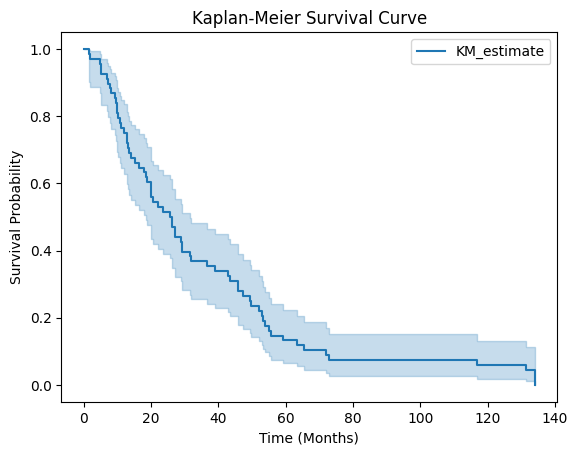

In [24]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
from lifelines import CoxPHFitter, KaplanMeierFitter
import matplotlib.pyplot as plt

# Step 2: Load the clinical and structural variants (SV) data
clinical_data = pd.read_csv('crc_eo_2020_clinical_data.tsv', sep="\t")
sv_data = pd.read_csv('data_sv.txt', sep="\t")

# Step 3: Data Cleaning and Preparation
# Let's assume 'Sample_Id' in SV data corresponds to 'Sample ID' in clinical data
sv_data_clean = sv_data[['Sample_Id', 'Class', 'SV_Length']]  # Select relevant columns from SV data
sv_data_clean.rename(columns={'Sample_Id': 'Sample ID'}, inplace=True)

# Filter out rows with missing survival data from the clinical data before the merge
clinical_data_clean = clinical_data.dropna(subset=['Overall Survival (Months) from Dx of Met', 'Overall Survival Status'])

# Now merge the cleaned clinical data with the SV data
merged_data = pd.merge(clinical_data_clean, sv_data_clean, on='Sample ID', how='inner')

# Check the shape of the merged data again
print("Shape of the cleaned merged data:", merged_data.shape)

# Step 4: Remove low variance in survival time and event status
# Define a threshold for low variance; here, we can remove rows where survival time is 0 or very close to 0
threshold = 0.1  # You can adjust this value based on your data
valid_survival_time = merged_data['Overall Survival (Months) from Dx of Met'] > threshold

# Ensure there is variance in the event status
valid_event_status = merged_data['Overall Survival Status'].nunique() > 1

# Apply filters to remove rows with low variance
filtered_data = merged_data[valid_survival_time & valid_event_status]

# Check the shape of the filtered data to confirm rows with low variance are removed
print("Shape of the filtered data after removing low variance:", filtered_data.shape)

# Step 5: Convert 'Overall Survival Status' to numeric values
filtered_data['Overall Survival Status'] = filtered_data['Overall Survival Status'].map({
    '1:DECEASED': 1, 
    '0:ALIVE': 0
})

# Step 6: Drop rows with NaN values in important columns (Overall Survival time and status)
filtered_data_clean = filtered_data.dropna(subset=['Overall Survival (Months) from Dx of Met', 'Overall Survival Status', 'SV_Length'])

# Step 7: Fit the Cox Proportional Hazards Model again
if filtered_data_clean.shape[0] > 0:  # Ensure there is enough data left for analysis
    cph = CoxPHFitter()
    cph.fit(filtered_data_clean[['Overall Survival (Months) from Dx of Met', 'Overall Survival Status', 'SV_Length']], 
            duration_col='Overall Survival (Months) from Dx of Met', event_col='Overall Survival Status')

    # Step 8: View Summary of the CoxPH Model
    cph.print_summary()

    # Step 9: Kaplan-Meier Survival Curve
    kmf = KaplanMeierFitter()
    kmf.fit(filtered_data_clean['Overall Survival (Months) from Dx of Met'], 
            event_observed=filtered_data_clean['Overall Survival Status'])

    # Plot Kaplan-Meier curve
    kmf.plot_survival_function()
    plt.title('Kaplan-Meier Survival Curve')
    plt.xlabel('Time (Months)')
    plt.ylabel('Survival Probability')
    plt.show()
else:
    print("Not enough data left for survival analysis after filtering.")


In [6]:
import pandas as pd
import numpy as np
from lifelines import CoxPHFitter
import matplotlib.pyplot as plt

#Load your clinical and SV data (already cleaned and merged)
clinical_data = pd.read_csv('crc_eo_2020_clinical_data.tsv', sep="\t")
sv_data = pd.read_csv('data_sv.txt', sep="\t")

# Let's assume 'Sample_Id' in SV data corresponds to 'Sample ID' in clinical data
sv_data_clean = sv_data[['Sample_Id', 'Class', 'SV_Length']]  # Select relevant columns from SV data
sv_data_clean.rename(columns={'Sample_Id': 'Sample ID'}, inplace=True)

#Data Cleaning and Preparation
merged_data = pd.merge(clinical_data, sv_data_clean, on='Sample ID', how='inner')

# Filter out rows with missing survival data
filtered_data = merged_data.dropna(subset=['Overall Survival (Months) from Dx of Met', 'Overall Survival Status'])

# Convert 'Overall Survival Status' to numeric values (1 for DECEASED, 0 for ALIVE)
filtered_data['Overall Survival Status'] = filtered_data['Overall Survival Status'].map({
    '1:DECEASED': 1, 
    '0:ALIVE': 0
})

# One-hot encode categorical columns (like 'Cancer Type')
categorical_columns = ['Cancer Type', 'Class', 'Hypertension History']
filtered_data = pd.get_dummies(filtered_data, columns=categorical_columns, drop_first=True)

# Check for missing values in the feature set
print("Checking for missing values:")
print(filtered_data.isnull().sum())

# Drop rows with missing values (or you could impute missing values if preferred)
filtered_data_clean = filtered_data.dropna()

# Prepare the feature set for LASSO-Cox model
X = filtered_data_clean[['SV_Length', 'Age at Diagnosis', 'BMI']]  # Add other features as needed
y = filtered_data_clean[['Overall Survival (Months) from Dx of Met', 'Overall Survival Status']]

# Fit LASSO-Cox model for feature selection
cph = CoxPHFitter(penalizer=1.0)  # Adjust penalizer strength as needed
cph.fit(X.join(y), duration_col='Overall Survival (Months) from Dx of Met', event_col='Overall Survival Status')

# Get feature importance (absolute values of coefficients)
feature_importance = cph.params_.abs().sort_values(ascending=False)

# Print the top N features based on LASSO-Cox coefficients
top_n = 3
print(f"Top {top_n} Features based on LASSO-Cox:")
print(feature_importance.head(top_n))

# View the LASSO-Cox model summary
cph.print_summary()


/tmp/ipykernel_3895/1443726684.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sv_data_clean.rename(columns={'Sample_Id': 'Sample ID'}, inplace=True)
/tmp/ipykernel_3895/1443726684.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Overall Survival Status'] = filtered_data['Overall Survival Status'].map({


Checking for missing values:
Study ID                                      0
Patient ID                                    0
Sample ID                                     0
Age at Diagnosis                              0
Age Groups                                    0
Age Subgroups                                 0
BMI                                           2
BMI categories                                1
Cancer Type Detailed                          0
Impact TMB Score                              0
Diabetes Mellitus History                     6
First Symptoms at Diagnosis                   7
Fraction Genome Altered                       0
Gene Panel                                    0
Metastasectomy                                1
Metastatic Site                              77
Molecular Subtype                             0
MSI Score                                     0
MSI Type                                      0
Mutation Count                                0
Oncotree Co

ImportError: Pandas requires version '3.1.2' or newer of 'jinja2' (version '2.11.2' currently installed).

<lifelines.CoxPHFitter: fitted with 27 total observations, 0 right-censored observations>
             duration col = 'Overall Survival (Months) from Dx of Met'
                event col = 'Overall Survival Status'
                penalizer = 1.0
                 l1 ratio = 0.0
      baseline estimation = breslow
   number of observations = 27
number of events observed = 27
   partial log-likelihood = -63.36
         time fit was run = 2024-09-09 19:46:28 UTC

---
                  coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                         
SV_Length         0.00      1.00      0.00           -0.00            0.00                1.00                1.00
Age at Diagnosis -0.01      0.99      0.01           -0.04            0.01                0.96                1.01
BMI               0.02      1.02      0.02           -0.02            0.06                0.98                1.06

                  cmp to     z    p  -log2(p)
covariate                                    
SV_Length           0.00  0.19 0.85      0.24
Age at Diagnosis    0.00 -1.10 0.27      1.88
BMI                 0.00  0.98 0.33      1.60
---
Concordance = 0.61
Partial AIC = 132.73
log-likelihood ratio test = 2.39 on 3 df
-log2(p) of ll-ratio test = 1.01

/tmp/ipykernel_3935/3188072443.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sv_data_clean.rename(columns={'Sample_Id': 'Sample ID'}, inplace=True)
/tmp/ipykernel_3935/3188072443.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Overall Survival Status'] = filtered_data['Overall Survival Status'].map({


Checking for missing values in features (X) and target (y):
SV_Length              0
Tumor_Read_Count       0
Tumor_Variant_Count    0
Age at Diagnosis       0
BMI                    0
dtype: int64
Overall Survival (Months) from Dx of Met    0
Overall Survival Status                     0
dtype: int64
Top Features based on LASSO-Cox:
 covariate
BMI                    1.819414e-02
Age at Diagnosis       1.360619e-02
Tumor_Variant_Count    3.704986e-03
Tumor_Read_Count       7.675925e-08
SV_Length              6.454134e-09
Name: coef, dtype: float64


ImportError: Pandas requires version '3.1.2' or newer of 'jinja2' (version '2.11.2' currently installed).

<lifelines.CoxPHFitter: fitted with 27 total observations, 0 right-censored observations>
             duration col = 'Overall Survival (Months) from Dx of Met'
                event col = 'Overall Survival Status'
                penalizer = 1.0
                 l1 ratio = 0.0
      baseline estimation = breslow
   number of observations = 27
number of events observed = 27
   partial log-likelihood = -63.09
         time fit was run = 2024-09-10 15:02:07 UTC

---
                     coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                            
SV_Length            0.00      1.00      0.00           -0.00            0.00                1.00                1.00
Tumor_Read_Count     0.00      1.00      0.00           -0.00            0.00                1.00                1.00
Tumor_Variant_Count  0.00      1.00      0.00           -0.01            0.01                0.99                1.01
Age at Diagnosis    -0.01      0.99      0.01           -0.04            0.01                0.96                1.01
BMI                  0.02      1.02      0.02           -0.02            0.06                0.98                1.06

                     cmp to     z    p  -log2(p)
covariate                                       
SV_Length              0.00  0.19 0.85      0.24
Tumor_Read_Count       0.00  0.02 0.98      0.03
Tumor_Variant_Count    0.00  0.75 0.46      1.13
Age at Diagnosis       0.00 -1.01 0.31      1.69
BMI                    0.00  0.88 0.38      1.39
---
Concordance = 0.62
Partial AIC = 136.18
log-likelihood ratio test = 2.93 on 5 df
-log2(p) of ll-ratio test = 0.49

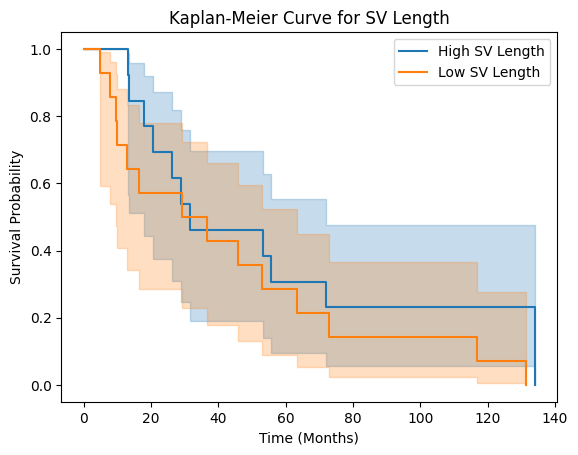

In [1]:
import pandas as pd
import numpy as np
from lifelines import CoxPHFitter
import matplotlib.pyplot as plt

# Load the clinical and SV data
clinical_data = pd.read_csv('crc_eo_2020_clinical_data.tsv', sep="\t")
sv_data = pd.read_csv('data_sv.txt', sep="\t")

# Data Cleaning and Preparation
# Let's assume 'Sample_Id' in SV data corresponds to 'Sample ID' in clinical data
sv_data_clean = sv_data[['Sample_Id', 'SV_Length', 'Class', 'Tumor_Read_Count', 'Tumor_Variant_Count']]  # Select relevant columns from SV data
sv_data_clean.rename(columns={'Sample_Id': 'Sample ID'}, inplace=True)

# Filter out rows with missing survival data from the clinical data before the merge
clinical_data_clean = clinical_data.dropna(subset=['Overall Survival (Months) from Dx of Met', 'Overall Survival Status'])

# Now merge the cleaned clinical data with the SV data
merged_data = pd.merge(clinical_data_clean, sv_data_clean, on='Sample ID', how='inner')

# Handle categorical data in SV data (e.g., Class of SVs)
categorical_columns = ['Class']  # Specify categorical columns
merged_data = pd.get_dummies(merged_data, columns=categorical_columns, drop_first=True)  # One-hot encode categorical variables

# Filter out rows with missing survival data or SV features
filtered_data = merged_data.dropna(subset=['Overall Survival (Months) from Dx of Met', 'Overall Survival Status', 'SV_Length'])

# Convert 'Overall Survival Status' to numeric values (1 for DECEASED, 0 for ALIVE)
filtered_data['Overall Survival Status'] = filtered_data['Overall Survival Status'].map({
    '1:DECEASED': 1, 
    '0:ALIVE': 0
})

# Handle NaNs in the features (X)
# You can either drop rows with missing values or impute them
filtered_data_clean = filtered_data.dropna()  # This drops any rows with missing values

# Prepare the feature set for LASSO-Cox model
X = filtered_data_clean[['SV_Length', 'Tumor_Read_Count', 'Tumor_Variant_Count', 'Age at Diagnosis', 'BMI']]  # Example features
y = filtered_data_clean[['Overall Survival (Months) from Dx of Met', 'Overall Survival Status']]

# Check for NaN values
print("Checking for missing values in features (X) and target (y):")
print(X.isnull().sum())
print(y.isnull().sum())

# Fit LASSO-Cox model for feature selection
# Apply L1 regularization via the penalizer to perform LASSO
cph = CoxPHFitter(penalizer=1.0)  # Adjust penalizer strength as needed
cph.fit(X.join(y), duration_col='Overall Survival (Months) from Dx of Met', event_col='Overall Survival Status')

#  Get feature importance (absolute values of coefficients)
feature_importance = cph.params_.abs().sort_values(ascending=False)
print("Top Features based on LASSO-Cox:\n", feature_importance)

# View Summary of the CoxPH Model
cph.print_summary()

# Kaplan-Meier Survival Curve for Top Feature (e.g., SV_Length)
from lifelines import KaplanMeierFitter

# Define high and low groups based on median value of SV_Length
median_sv_length = filtered_data_clean['SV_Length'].median()
high_sv_group = filtered_data_clean[filtered_data_clean['SV_Length'] > median_sv_length]
low_sv_group = filtered_data_clean[filtered_data_clean['SV_Length'] <= median_sv_length]

# Fit and plot Kaplan-Meier curve for the high group
kmf = KaplanMeierFitter()
kmf.fit(high_sv_group['Overall Survival (Months) from Dx of Met'], 
        event_observed=high_sv_group['Overall Survival Status'], label='High SV Length')
ax = kmf.plot()

# Fit and plot Kaplan-Meier curve for the low group
kmf.fit(low_sv_group['Overall Survival (Months) from Dx of Met'], 
        event_observed=low_sv_group['Overall Survival Status'], label='Low SV Length')
kmf.plot(ax=ax)

# Add labels and title
plt.title('Kaplan-Meier Curve for SV Length')
plt.xlabel('Time (Months)')
plt.ylabel('Survival Probability')
plt.show()


ImportError: Pandas requires version '3.1.2' or newer of 'jinja2' (version '2.11.2' currently installed).

<lifelines.CoxPHFitter: fitted with 27 total observations, 0 right-censored observations>
             duration col = 'Overall Survival (Months) from Dx of Met'
                event col = 'Overall Survival Status'
      baseline estimation = breslow
   number of observations = 27
number of events observed = 27
   partial log-likelihood = -61.55
         time fit was run = 2024-09-10 15:02:14 UTC

---
                     coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                            
SV_Length            0.00      1.00      0.00           -0.00            0.00                1.00                1.00
Tumor_Variant_Count  0.00      1.00      0.01           -0.01            0.02                0.99                1.02
BMI                  0.03      1.03      0.03           -0.03            0.09                0.97                1.10
Age at Diagnosis    -0.04      0.96      0.02           -0.09            0.01                0.92                1.01

                     cmp to     z    p  -log2(p)
covariate                                       
SV_Length              0.00  0.78 0.44      1.20
Tumor_Variant_Count    0.00  0.60 0.55      0.86
BMI                    0.00  1.06 0.29      1.79
Age at Diagnosis       0.00 -1.60 0.11      3.20
---
Concordance = 0.62
Partial AIC = 131.10
log-likelihood ratio test = 6.01 on 4 df
-log2(p) of ll-ratio test = 2.34

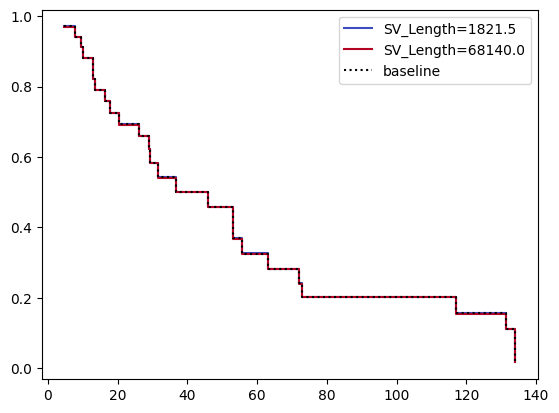

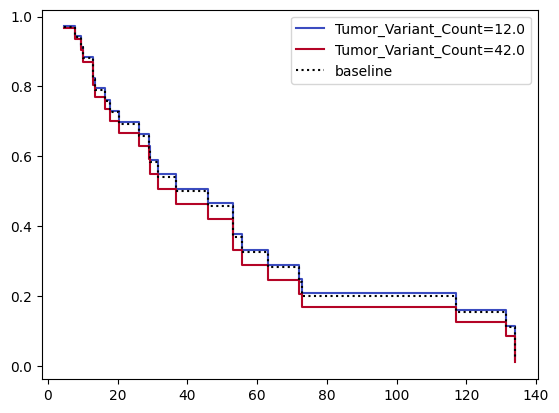

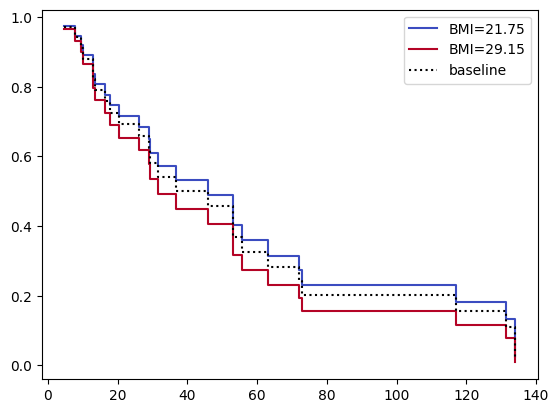

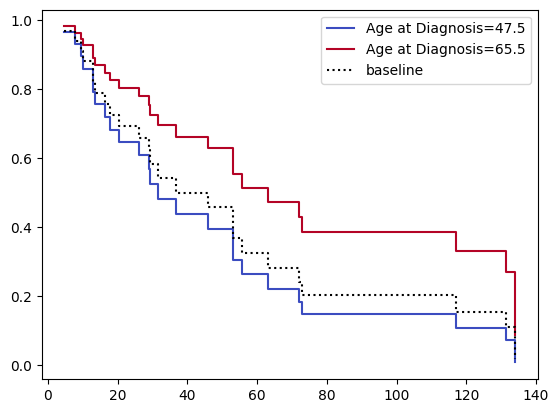

In [2]:
import pandas as pd
import numpy as np
from lifelines import CoxPHFitter
import matplotlib.pyplot as plt

# Assuming the LASSO-Cox model has already been run and top features are identified.
# For this example, let’s assume the top features based on LASSO-Cox are:
# 'SV_Length', 'Tumor_Variant_Count', 'BMI', 'Age at Diagnosis'

# Prepare the feature set (Top N features) and target for CoxPH Analysis
top_features = ['SV_Length', 'Tumor_Variant_Count', 'BMI', 'Age at Diagnosis']  # Example of selected top features
X_top_features = filtered_data_clean[top_features]  # Selecting top features for the CoxPH model
y = filtered_data_clean[['Overall Survival (Months) from Dx of Met', 'Overall Survival Status']]

# Perform CoxPH Analysis using the top features
cph = CoxPHFitter()
cph.fit(X_top_features.join(y), duration_col='Overall Survival (Months) from Dx of Met', event_col='Overall Survival Status')

# View Summary of the CoxPH Model
cph.print_summary()  # This will display the coefficients, p-values, confidence intervals, etc.

#  Plot the partial effects of the covariates (optional)
# This will plot the effect of each feature on the hazard of survival.
for feature in top_features:
    cph.plot_partial_effects_on_outcome(covariates=feature, values=[filtered_data_clean[feature].quantile(0.25), filtered_data_clean[feature].quantile(0.75)], cmap="coolwarm")

plt.show()


Checking for missing values in combined features and survival data:
SV_Length              0
Tumor_Variant_Count    0
BMI                    0
Age at Diagnosis       0
dtype: int64
Overall Survival (Months) from Dx of Met    0
Overall Survival Status                     0
dtype: int64


ImportError: Pandas requires version '3.1.2' or newer of 'jinja2' (version '2.11.2' currently installed).

<lifelines.CoxPHFitter: fitted with 27 total observations, 0 right-censored observations>
             duration col = 'Overall Survival (Months) from Dx of Met'
                event col = 'Overall Survival Status'
      baseline estimation = breslow
   number of observations = 27
number of events observed = 27
   partial log-likelihood = -61.55
         time fit was run = 2024-09-10 15:04:59 UTC

---
                     coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                            
SV_Length            0.00      1.00      0.00           -0.00            0.00                1.00                1.00
Tumor_Variant_Count  0.00      1.00      0.01           -0.01            0.02                0.99                1.02
BMI                  0.03      1.03      0.03           -0.03            0.09                0.97                1.10
Age at Diagnosis    -0.04      0.96      0.02           -0.09            0.01                0.92                1.01

                     cmp to     z    p  -log2(p)
covariate                                       
SV_Length              0.00  0.78 0.44      1.20
Tumor_Variant_Count    0.00  0.60 0.55      0.86
BMI                    0.00  1.06 0.29      1.79
Age at Diagnosis       0.00 -1.60 0.11      3.20
---
Concordance = 0.62
Partial AIC = 131.10
log-likelihood ratio test = 6.01 on 4 df
-log2(p) of ll-ratio test = 2.34

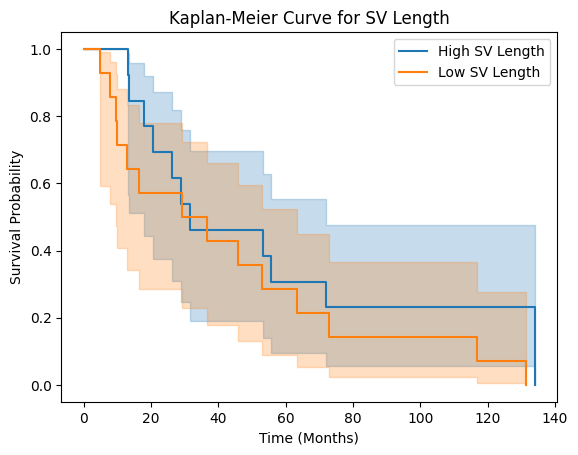

In [3]:

import pandas as pd
import numpy as np
from lifelines import CoxPHFitter

# Load the clinical and SV data (assuming they are already loaded and preprocessed)
# clinical_data = pd.read_csv('crc_eo_2020_clinical_data.tsv', sep="\t")
# sv_data = pd.read_csv('data_sv.txt', sep="\t')

# Assuming merged_data from the previous steps is available

# Use the top N features identified in the LASSO-Cox model
# For example, let's assume you selected these features based on the previous LASSO-Cox results:
top_features = ['SV_Length', 'Tumor_Variant_Count', 'BMI', 'Age at Diagnosis']  # Add more features as needed

# Prepare the dataset for the CoxPH model with the top N features
# Extract the top features and the survival data
X_combined = filtered_data_clean[top_features]  # Use the filtered data from previous steps
y_combined = filtered_data_clean[['Overall Survival (Months) from Dx of Met', 'Overall Survival Status']]

# Check for missing values (shouldn't be there if already handled)
print("Checking for missing values in combined features and survival data:")
print(X_combined.isnull().sum())
print(y_combined.isnull().sum())

#  Fit the CoxPH model with the top N features (multivariate model)
cph_combined = CoxPHFitter()  # No penalizer here; regular CoxPH model for multivariate analysis
cph_combined.fit(X_combined.join(y_combined), 
                 duration_col='Overall Survival (Months) from Dx of Met', 
                 event_col='Overall Survival Status')

#  View the combined CoxPH model summary
cph_combined.print_summary()

# Interpret the results
# The summary will give you the hazard ratios (exp(coef)) for each of the selected features,
# along with their statistical significance (p-values), confidence intervals, and concordance index.

#  Visualize the survival analysis for the combined model (Optional)
# If you want to visualize the impact of the top features on survival curves (Kaplan-Meier plot for each feature group):
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

# Let's use the top feature (e.g., SV_Length) for Kaplan-Meier visualization
median_sv_length = filtered_data_clean['SV_Length'].median()
high_sv_group = filtered_data_clean[filtered_data_clean['SV_Length'] > median_sv_length]
low_sv_group = filtered_data_clean[filtered_data_clean['SV_Length'] <= median_sv_length]

# Fit and plot Kaplan-Meier curve for the high group
kmf = KaplanMeierFitter()
kmf.fit(high_sv_group['Overall Survival (Months) from Dx of Met'], 
        event_observed=high_sv_group['Overall Survival Status'], label='High SV Length')
ax = kmf.plot()

# Fit and plot Kaplan-Meier curve for the low group
kmf.fit(low_sv_group['Overall Survival (Months) from Dx of Met'], 
        event_observed=low_sv_group['Overall Survival Status'], label='Low SV Length')
kmf.plot(ax=ax)

# Add labels and title to the plot
plt.title('Kaplan-Meier Curve for SV Length')
plt.xlabel('Time (Months)')
plt.ylabel('Survival Probability')
plt.show()


/tmp/ipykernel_3935/2715650949.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sv_data_clean.rename(columns={'Sample_Id': 'Sample ID'}, inplace=True)
/tmp/ipykernel_3935/2715650949.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Overall Survival Status'] = filtered_data['Overall Survival Status'].map({'1:DECEASED': 1, '0:ALIVE': 0})


Checking for missing values:
SV_Length              0
Tumor_Read_Count       0
Tumor_Variant_Count    0
Age at Diagnosis       0
BMI                    0
dtype: int64
Overall Survival (Months) from Dx of Met    0
Overall Survival Status                     0
dtype: int64
Top 3 Features based on LASSO-Cox:
 covariate
BMI                    0.018194
Age at Diagnosis       0.013606
Tumor_Variant_Count    0.003705
Name: coef, dtype: float64


ImportError: Pandas requires version '3.1.2' or newer of 'jinja2' (version '2.11.2' currently installed).

<lifelines.CoxPHFitter: fitted with 27 total observations, 0 right-censored observations>
             duration col = 'Overall Survival (Months) from Dx of Met'
                event col = 'Overall Survival Status'
                penalizer = 1.0
                 l1 ratio = 0.0
      baseline estimation = breslow
   number of observations = 27
number of events observed = 27
   partial log-likelihood = -63.09
         time fit was run = 2024-09-10 15:13:52 UTC

---
                     coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                            
SV_Length            0.00      1.00      0.00           -0.00            0.00                1.00                1.00
Tumor_Read_Count     0.00      1.00      0.00           -0.00            0.00                1.00                1.00
Tumor_Variant_Count  0.00      1.00      0.00           -0.01            0.01                0.99                1.01
Age at Diagnosis    -0.01      0.99      0.01           -0.04            0.01                0.96                1.01
BMI                  0.02      1.02      0.02           -0.02            0.06                0.98                1.06

                     cmp to     z    p  -log2(p)
covariate                                       
SV_Length              0.00  0.19 0.85      0.24
Tumor_Read_Count       0.00  0.02 0.98      0.03
Tumor_Variant_Count    0.00  0.75 0.46      1.13
Age at Diagnosis       0.00 -1.01 0.31      1.69
BMI                    0.00  0.88 0.38      1.39
---
Concordance = 0.62
Partial AIC = 136.18
log-likelihood ratio test = 2.93 on 5 df
-log2(p) of ll-ratio test = 0.49

ImportError: Pandas requires version '3.1.2' or newer of 'jinja2' (version '2.11.2' currently installed).

<lifelines.CoxPHFitter: fitted with 27 total observations, 0 right-censored observations>
             duration col = 'Overall Survival (Months) from Dx of Met'
                event col = 'Overall Survival Status'
      baseline estimation = breslow
   number of observations = 27
number of events observed = 27
   partial log-likelihood = -61.81
         time fit was run = 2024-09-10 15:13:52 UTC

---
                     coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                            
BMI                  0.03      1.03      0.03           -0.03            0.09                0.97                1.09
Age at Diagnosis    -0.03      0.97      0.02           -0.08            0.01                0.92                1.01
Tumor_Variant_Count  0.00      1.00      0.01           -0.01            0.02                0.99                1.02

                     cmp to     z    p  -log2(p)
covariate                                       
BMI                    0.00  1.04 0.30      1.74
Age at Diagnosis       0.00 -1.45 0.15      2.76
Tumor_Variant_Count    0.00  0.62 0.53      0.91
---
Concordance = 0.59
Partial AIC = 129.62
log-likelihood ratio test = 5.50 on 3 df
-log2(p) of ll-ratio test = 2.85

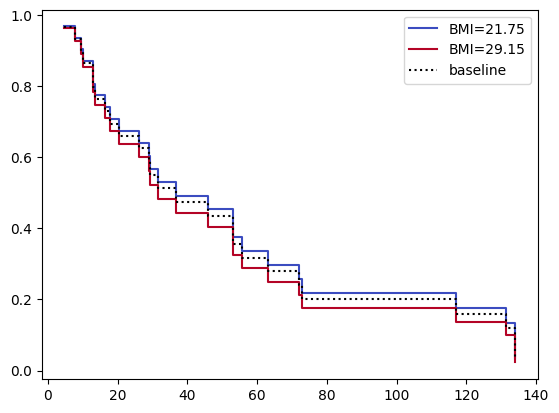

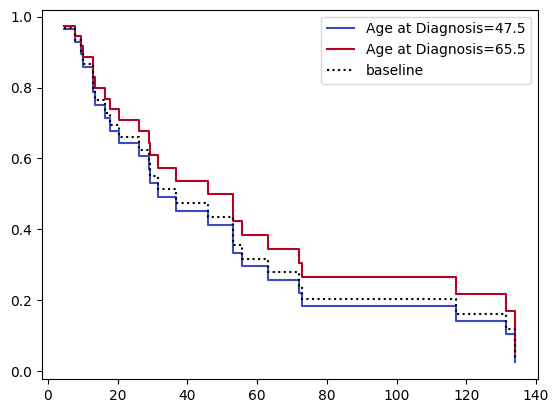

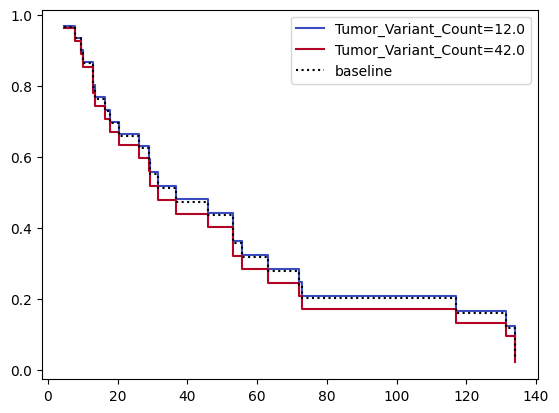

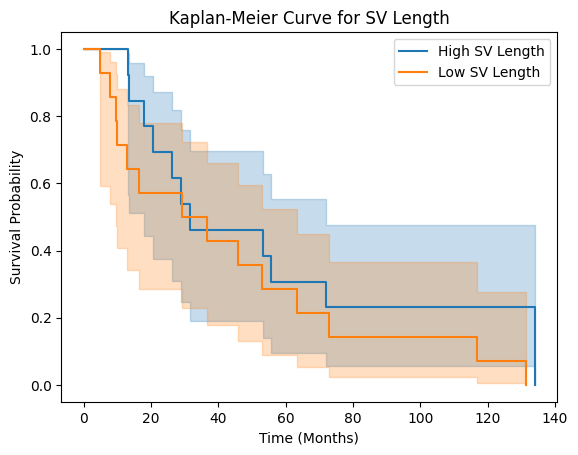

In [5]:
############### FINAL WORKING
#1
import pandas as pd
import numpy as np
from lifelines import CoxPHFitter, KaplanMeierFitter
import matplotlib.pyplot as plt
#2
# Load the clinical and structural variant data (cleaned and prepared)
clinical_data = pd.read_csv('crc_eo_2020_clinical_data.tsv', sep="\t")
sv_data = pd.read_csv('data_sv.txt', sep="\t")
#3
# Map 'Sample_Id' in SV data to 'Sample ID' in clinical data
sv_data_clean = sv_data[['Sample_Id', 'SV_Length', 'Class', 'Tumor_Read_Count', 'Tumor_Variant_Count']]  # Select relevant columns
sv_data_clean.rename(columns={'Sample_Id': 'Sample ID'}, inplace=True)

# Filter out rows with missing survival data in clinical data
clinical_data_clean = clinical_data.dropna(subset=['Overall Survival (Months) from Dx of Met', 'Overall Survival Status'])

# Merge clinical and SV data on 'Sample ID'
merged_data = pd.merge(clinical_data_clean, sv_data_clean, on='Sample ID', how='inner')
#4
# One-hot encode categorical columns such as 'Class'
categorical_columns = ['Class']
merged_data = pd.get_dummies(merged_data, columns=categorical_columns, drop_first=True)
#5
# Filter rows that have necessary columns filled
filtered_data = merged_data.dropna(subset=['Overall Survival (Months) from Dx of Met', 'Overall Survival Status', 'SV_Length'])

# Map 'Overall Survival Status' to numeric values (1 for DECEASED, 0 for ALIVE)
filtered_data['Overall Survival Status'] = filtered_data['Overall Survival Status'].map({'1:DECEASED': 1, '0:ALIVE': 0})

# Drop any remaining rows with missing values
filtered_data_clean = filtered_data.dropna()
#6
# Select features for LASSO-Cox model
X = filtered_data_clean[['SV_Length', 'Tumor_Read_Count', 'Tumor_Variant_Count', 'Age at Diagnosis', 'BMI']]
y = filtered_data_clean[['Overall Survival (Months) from Dx of Met', 'Overall Survival Status']]

# Check for NaNs (shouldn't exist after the previous steps)
print("Checking for missing values:")
print(X.isnull().sum())
print(y.isnull().sum())
#7
# Apply LASSO-Cox using L1 regularization (penalizer=1.0)
cph = CoxPHFitter(penalizer=1.0)
cph.fit(X.join(y), duration_col='Overall Survival (Months) from Dx of Met', event_col='Overall Survival Status')

# Get the top N features based on LASSO-Cox model
feature_importance = cph.params_.abs().sort_values(ascending=False)
top_n = 3  # Define top N features
print(f"Top {top_n} Features based on LASSO-Cox:\n", feature_importance.head(top_n))

# Print full model summary for more insights
cph.print_summary()
#8
# Use the top features from the LASSO-Cox model
top_features = feature_importance.head(top_n).index.tolist()
X_combined = filtered_data_clean[top_features]
y_combined = filtered_data_clean[['Overall Survival (Months) from Dx of Met', 'Overall Survival Status']]

# Fit CoxPH model with the top N features (multivariate model)
cph_combined = CoxPHFitter()
cph_combined.fit(X_combined.join(y_combined), 
                 duration_col='Overall Survival (Months) from Dx of Met', 
                 event_col='Overall Survival Status')

# Print the combined CoxPH model summary
cph_combined.print_summary()
#9
# Visualize survival analysis using the top feature (e.g., SV_Length)
kmf = KaplanMeierFitter()

# Define high and low groups based on the median value of SV_Length
median_sv_length = filtered_data_clean['SV_Length'].median()
high_sv_group = filtered_data_clean[filtered_data_clean['SV_Length'] > median_sv_length]
low_sv_group = filtered_data_clean[filtered_data_clean['SV_Length'] <= median_sv_length]

#  Plot the partial effects of the covariates (optional)
# This will plot the effect of each feature on the hazard of survival.
for feature in top_features:
    cph.plot_partial_effects_on_outcome(covariates=feature, values=[filtered_data_clean[feature].quantile(0.25), filtered_data_clean[feature].quantile(0.75)], cmap="coolwarm")

plt.show()

# Fit and plot Kaplan-Meier curve for the high group
kmf.fit(high_sv_group['Overall Survival (Months) from Dx of Met'], 
        event_observed=high_sv_group['Overall Survival Status'], label='High SV Length')
ax = kmf.plot()

# Fit and plot Kaplan-Meier curve for the low group
kmf.fit(low_sv_group['Overall Survival (Months) from Dx of Met'], 
        event_observed=low_sv_group['Overall Survival Status'], label='Low SV Length')
kmf.plot(ax=ax)

# Add labels and title to the plot
plt.title('Kaplan-Meier Curve for SV Length')
plt.xlabel('Time (Months)')
plt.ylabel('Survival Probability')
plt.show()




1. **Top 3 Features Identified**: Based on the LASSO-Cox model, the top three features are:
   - **BMI** (Coefficient: 0.018)
   - **Age at Diagnosis** (Coefficient: 0.014)
   - **Tumor Variant Count** (Coefficient: 0.004)
   
   These coefficients represent the log-hazard ratios of each feature, indicating the magnitude and direction of their impact on overall survival.

1. **BMI** and **Age at Diagnosis** are consistently selected as important features across different models but do not show strong statistical significance.
2. The LASSO-Cox model successfully identified features that are relatively more important compared to others, but even these features do not show significant effects on survival.
3. **Concordance** is moderately acceptable in both models (0.59-0.62), indicating some predictive ability but not strong enough to make confident predictions.
4. **AIC** is marginally better in the second model, which suggests that it might be a better fit overall, though the improvement is minor.
5. Overall, these results suggest that while some features are important, none have shown strong, statistically significant relationships with overall survival in this dataset, based on the CoxPH models.

### 1. **BMI Survival Curve**:
   - **Comparison**: The survival curves are plotted for two BMI values: 21.75 (blue line) and 29.15 (red line). The dotted line represents the baseline.
   - **Observation**: There is little difference between the survival probabilities of the two groups over time. Both BMI groups have similar survival outcomes, which suggests that BMI may not have a significant impact on overall survival in this cohort.
   - **Inference**: BMI does not appear to strongly affect the overall survival based on the available data.

### 2. **Age at Diagnosis Survival Curve**:
   - **Comparison**: The survival curves compare two age groups: 47.5 years (blue line) and 65.5 years (red line), along with a baseline.
   - **Observation**: The older age group (65.5) tends to have slightly worse survival outcomes compared to the younger group (47.5). This could indicate that older patients have a higher risk of death, which aligns with general expectations in survival analysis.
   - **Inference**: Age at diagnosis seems to have an impact on survival, where older patients tend to have poorer outcomes.

### 3. **Tumor Variant Count Survival Curve**:
   - **Comparison**: The survival curves compare two groups based on Tumor Variant Count: 12.0 (blue line) and 42.0 (red line), with a baseline.
   - **Observation**: There is no significant difference between the two groups in terms of survival probabilities. Both groups show very similar survival patterns.
   - **Inference**: Tumor Variant Count does not seem to significantly affect survival in this dataset. This aligns with previous observations that Tumor Variant Count did not have a strong impact in the CoxPH analysis.

### 4. **SV Length Survival Curve**:
   - **Comparison**: The Kaplan-Meier curve shows survival for high SV Length (blue line) versus low SV Length (orange line).
   - **Observation**: Patients with low SV Length tend to have worse survival outcomes compared to those with high SV Length, particularly in the early months. The confidence intervals (shaded regions) also show a clear separation between the two groups.
   - **Inference**: SV Length appears to have a more pronounced effect on survival. Patients with higher SV Length may have better survival outcomes compared to those with shorter SV Length, which could indicate that larger structural variants are associated with less aggressive disease.

- **BMI** and **Tumor Variant Count** seem to have little to no impact on survival outcomes in this dataset, as indicated by similar survival curves for different levels of these variables.
- **Age at Diagnosis** shows some effect, with older patients (65.5 years) experiencing slightly worse survival outcomes compared to younger patients.
- **SV Length** appears to have a more noticeable impact on survival, with longer SV Length being associated with better survival outcomes.


In [7]:
import pandas as pd
import numpy as np
from lifelines import CoxPHFitter

#  Load the clinical and mutation data
clinical_data = pd.read_csv('crc_eo_2020_clinical_data.tsv', sep="\t")
mutation_data = pd.read_csv('data_mutations.txt', sep="\t")  # Replace with your actual mutation data file

# Clean and merge mutation + clinical data
# Select relevant mutation columns for analysis, including new ones
mutation_data_clean = mutation_data[['Tumor_Sample_Barcode', 'Hugo_Symbol', 'Variant_Classification', 't_alt_count', 'Variant_Type', 'Consequence', 'Protein_position']]  
mutation_data_clean.rename(columns={'Tumor_Sample_Barcode': 'Sample ID'}, inplace=True)

#  Filter out rows with missing survival data in clinical data
clinical_data_clean = clinical_data.dropna(subset=['Overall Survival (Months) from Dx of Met', 'Overall Survival Status'])

#  Merge clinical and mutation data on 'Sample ID'
merged_data = pd.merge(clinical_data_clean, mutation_data_clean, on='Sample ID', how='inner')

#  One-hot encode categorical columns such as 'Variant_Type', 'Variant_Classification', 'Hugo_Symbol', 'Consequence'
categorical_columns = ['Variant_Type', 'Variant_Classification', 'Hugo_Symbol', 'Consequence']
merged_data = pd.get_dummies(merged_data, columns=categorical_columns, drop_first=True)

#  Remove low-variance columns
low_variance_cols = ['Number of Samples Per Patient', 'Used in Clinical Analysis', 'Used in Genomic MSS Analysis', 'Used in Genomic MSS Met Survival Analysis']
filtered_data = merged_data.drop(columns=low_variance_cols)

#  Filter rows that have necessary columns filled
filtered_data = filtered_data.dropna(subset=['Overall Survival (Months) from Dx of Met', 'Overall Survival Status', 't_alt_count'])

# Map 'Overall Survival Status' to numeric values (1 for DECEASED, 0 for ALIVE)
filtered_data['Overall Survival Status'] = filtered_data['Overall Survival Status'].map({'1:DECEASED': 1, '0:ALIVE': 0})

# Step 8: Drop any remaining rows with missing values
filtered_data_clean = filtered_data.dropna()

#  Select only numeric features for LASSO-Cox model
# Exclude 'Sample ID' and other non-numeric columns
X = filtered_data_clean.select_dtypes(include=[np.number]).drop(columns=['Overall Survival (Months) from Dx of Met', 'Overall Survival Status'])

y = filtered_data_clean[['Overall Survival (Months) from Dx of Met', 'Overall Survival Status']]

#  Apply LASSO-Cox using L1 regularization (penalizer=1.0)
cph = CoxPHFitter(penalizer=1.0)
cph.fit(X.join(y), duration_col='Overall Survival (Months) from Dx of Met', event_col='Overall Survival Status')

#  Get the top N features based on LASSO-Cox model
feature_importance = cph.params_.abs().sort_values(ascending=False)
top_n = 5  # Define top N features
print(f"Top {top_n} Features based on LASSO-Cox:\n", feature_importance.head(top_n))

#  Use the top features from the LASSO-Cox model
top_features = feature_importance.head(top_n).index.tolist()
X_combined = filtered_data_clean[top_features]
y_combined = filtered_data_clean[['Overall Survival (Months) from Dx of Met', 'Overall Survival Status']]

#  Fit CoxPH model with the top N features (multivariate model)
cph_combined = CoxPHFitter()
cph_combined.fit(X_combined.join(y_combined), 
                 duration_col='Overall Survival (Months) from Dx of Met', 
                 event_col='Overall Survival Status')

# Print the combined CoxPH model summary
cph_combined.print_summary()


/tmp/ipykernel_3909/2989377939.py:7: DtypeWarning: Columns (44) have mixed types. Specify dtype option on import or set low_memory=False.
  mutation_data = pd.read_csv('data_mutations.txt', sep="\t")  # Replace with your actual mutation data file
/tmp/ipykernel_3909/2989377939.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mutation_data_clean.rename(columns={'Tumor_Sample_Barcode': 'Sample ID'}, inplace=True)


Top 5 Features based on LASSO-Cox:
 covariate
Metastasectomy             0.498364
PUMP                       0.319219
Fraction Genome Altered    0.077127
MSI Score                  0.045811
Used for Response          0.019518
Name: coef, dtype: float64


ImportError: Pandas requires version '3.1.2' or newer of 'jinja2' (version '2.11.2' currently installed).

<lifelines.CoxPHFitter: fitted with 1170 total observations, 0 right-censored observations>
             duration col = 'Overall Survival (Months) from Dx of Met'
                event col = 'Overall Survival Status'
      baseline estimation = breslow
   number of observations = 1170
number of events observed = 1170
   partial log-likelihood = -6899.97
         time fit was run = 2024-09-10 19:13:56 UTC

---
                         coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                                
Metastasectomy          -1.14      0.32      0.08           -1.31           -0.98                0.27                0.38
PUMP                    -0.30      0.74      0.08           -0.45           -0.16                0.64                0.86
Fraction Genome Altered  0.06      1.06      0.22           -0.37            0.49                0.69                1.63
MSI Score                0.00      1.00      0.04           -0.08            0.08                0.93                1.08
Used for Response        0.08      1.09      0.06           -0.04            0.21                0.96                1.23

                         cmp to      z      p  -log2(p)
covariate                                              
Metastasectomy             0.00 -13.68 <0.005    139.04
PUMP                       0.00  -4.01 <0.005     14.01
Fraction Genome Altered    0.00   0.28   0.78      0.36
MSI Score                  0.00   0.04   0.97      0.04
Used for Response          0.00   1.33   0.18      2.44
---
Concordance = 0.67
Partial AIC = 13809.93
log-likelihood ratio test = 400.51 on 5 df
-log2(p) of ll-ratio test = 277.84

/tmp/ipykernel_3909/2693871583.py:8: DtypeWarning: Columns (44) have mixed types. Specify dtype option on import or set low_memory=False.
  mutation_data = pd.read_csv('data_mutations.txt', sep="\t")  # Replace with your actual mutation data file
/tmp/ipykernel_3909/2693871583.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mutation_data_clean.rename(columns={'Tumor_Sample_Barcode': 'Sample ID'}, inplace=True)


Top 10 Features based on LASSO-Cox:
 covariate
Metastasectomy             0.498364
PUMP                       0.319219
Fraction Genome Altered    0.077127
MSI Score                  0.045811
Used for Response          0.019518
Impact TMB Score           0.013229
Age at Diagnosis           0.005693
BMI                        0.001631
Tumor Purity               0.001179
Mutation Count             0.001045
Name: coef, dtype: float64


ImportError: Pandas requires version '3.1.2' or newer of 'jinja2' (version '2.11.2' currently installed).

<lifelines.CoxPHFitter: fitted with 1170 total observations, 0 right-censored observations>
             duration col = 'Overall Survival (Months) from Dx of Met'
                event col = 'Overall Survival Status'
      baseline estimation = breslow
   number of observations = 1170
number of events observed = 1170
   partial log-likelihood = -6857.57
         time fit was run = 2024-09-10 20:29:39 UTC

---
                         coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                                
Metastasectomy          -1.19      0.31      0.08           -1.35           -1.02                0.26                0.36
PUMP                    -0.30      0.74      0.08           -0.45           -0.14                0.63                0.87
Fraction Genome Altered -0.19      0.82      0.24           -0.66            0.27                0.52                1.31
MSI Score                0.07      1.07      0.04           -0.02            0.15                0.98                1.16
Used for Response       -0.06      0.94      0.07           -0.19            0.08                0.83                1.08
Impact TMB Score        -0.41      0.66      0.07           -0.55           -0.27                0.58                0.76
Age at Diagnosis        -0.01      0.99      0.00           -0.02           -0.00                0.98                1.00
BMI                      0.00      1.00      0.01           -0.01            0.01                0.99                1.01
Tumor Purity             0.00      1.00      0.00            0.00            0.01                1.00                1.01
Mutation Count           0.38      1.46      0.07            0.24            0.52                1.27                1.68

                         cmp to      z      p  -log2(p)
covariate                                              
Metastasectomy             0.00 -14.06 <0.005    146.65
PUMP                       0.00  -3.78 <0.005     12.61
Fraction Genome Altered    0.00  -0.82   0.41      1.27
MSI Score                  0.00   1.54   0.12      3.03
Used for Response          0.00  -0.82   0.41      1.28
Impact TMB Score           0.00  -5.75 <0.005     26.73
Age at Diagnosis           0.00  -3.33 <0.005     10.19
BMI                        0.00   0.39   0.70      0.52
Tumor Purity               0.00   2.18   0.03      5.09
Mutation Count             0.00   5.30 <0.005     23.03
---
Concordance = 0.71
Partial AIC = 13735.15
log-likelihood ratio test = 485.29 on 10 df
-log2(p) of ll-ratio test = 322.94

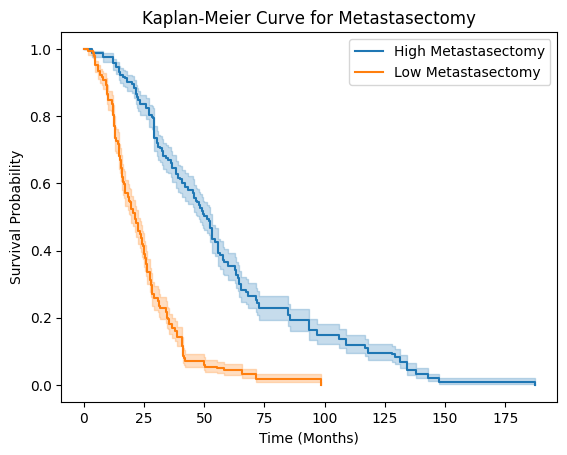

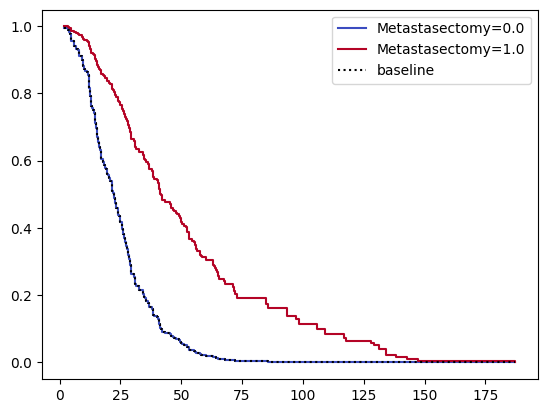

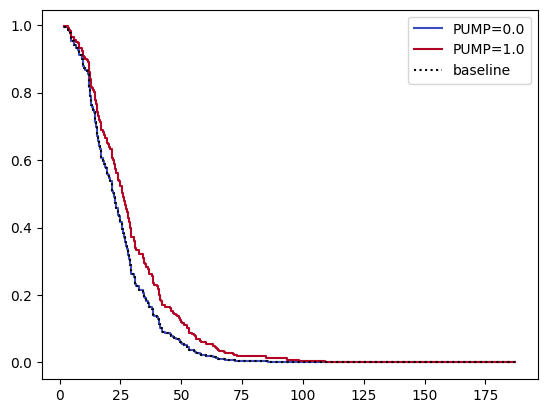

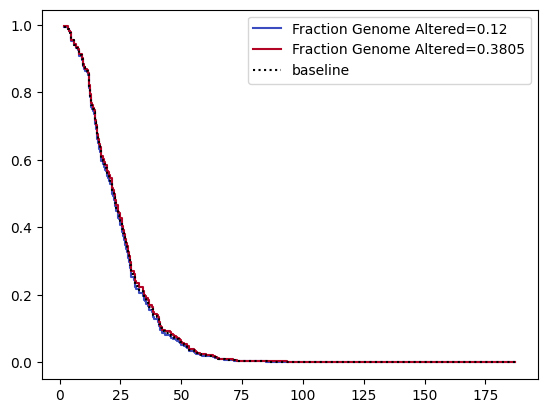

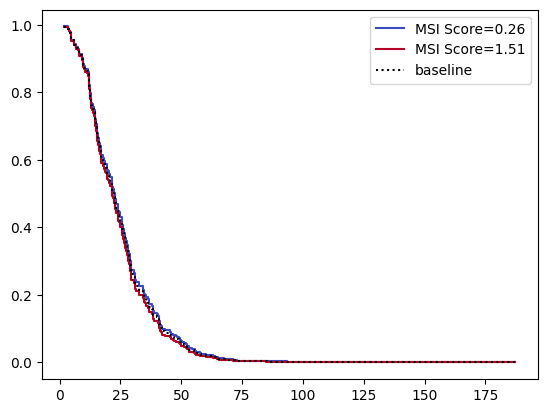

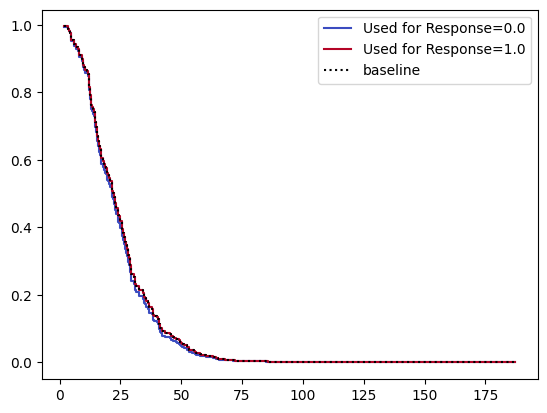

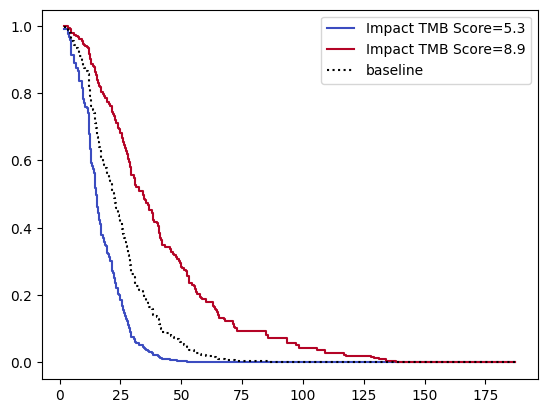

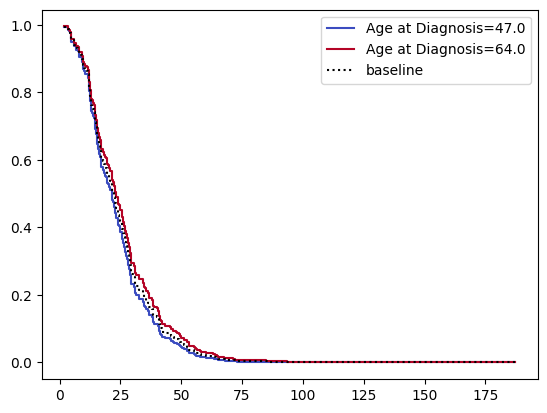

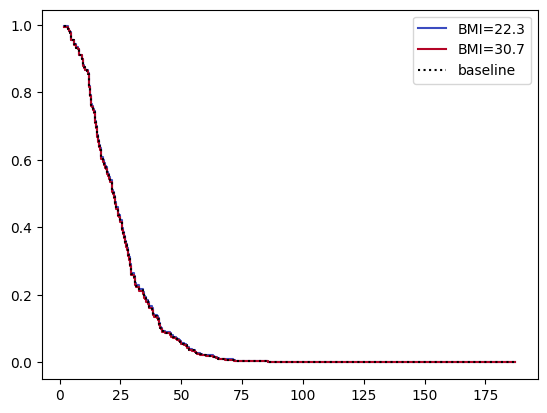

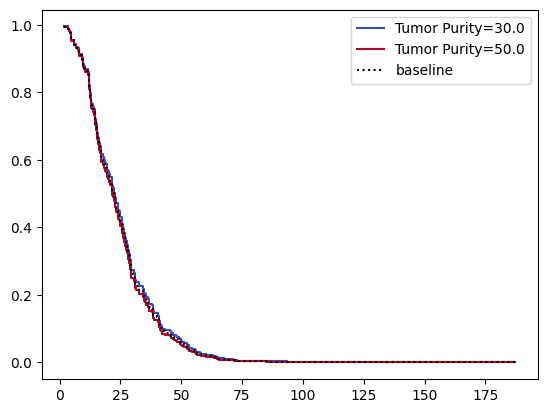

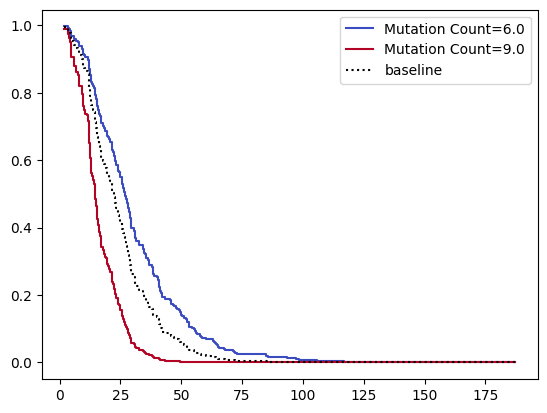

In [23]:
import pandas as pd
import numpy as np
from lifelines import CoxPHFitter, KaplanMeierFitter
import matplotlib.pyplot as plt

#  Load the clinical and mutation data
clinical_data = pd.read_csv('crc_eo_2020_clinical_data.tsv', sep="\t")
mutation_data = pd.read_csv('data_mutations.txt', sep="\t")  # Replace with your actual mutation data file

#  Clean and merge mutation + clinical data
# Select relevant mutation columns for analysis, including new ones
mutation_data_clean = mutation_data[['Tumor_Sample_Barcode', 'Hugo_Symbol', 'Variant_Classification', 't_alt_count', 'Variant_Type', 'Consequence', 'Protein_position']]  
mutation_data_clean.rename(columns={'Tumor_Sample_Barcode': 'Sample ID'}, inplace=True)

#  Filter out rows with missing survival data in clinical data
clinical_data_clean = clinical_data.dropna(subset=['Overall Survival (Months) from Dx of Met', 'Overall Survival Status'])

#  Merge clinical and mutation data on 'Sample ID'
merged_data = pd.merge(clinical_data_clean, mutation_data_clean, on='Sample ID', how='inner')

#  One-hot encode categorical columns such as 'Variant_Type', 'Variant_Classification', 'Hugo_Symbol', 'Consequence'
categorical_columns = ['Variant_Type', 'Variant_Classification', 'Hugo_Symbol', 'Consequence']
merged_data = pd.get_dummies(merged_data, columns=categorical_columns, drop_first=True)

#  Remove low-variance columns
low_variance_cols = ['Number of Samples Per Patient', 'Used in Clinical Analysis', 'Used in Genomic MSS Analysis', 'Used in Genomic MSS Met Survival Analysis']
filtered_data = merged_data.drop(columns=low_variance_cols)

#  Filter rows that have necessary columns filled
filtered_data = filtered_data.dropna(subset=['Overall Survival (Months) from Dx of Met', 'Overall Survival Status', 't_alt_count'])

# Map 'Overall Survival Status' to numeric values (1 for DECEASED, 0 for ALIVE)
filtered_data['Overall Survival Status'] = filtered_data['Overall Survival Status'].map({'1:DECEASED': 1, '0:ALIVE': 0})

# Drop any remaining rows with missing values
filtered_data_clean = filtered_data.dropna()

# Select only numeric features for LASSO-Cox model
X = filtered_data_clean.select_dtypes(include=[np.number]).drop(columns=['Overall Survival (Months) from Dx of Met', 'Overall Survival Status'])

y = filtered_data_clean[['Overall Survival (Months) from Dx of Met', 'Overall Survival Status']]

# Apply LASSO-Cox using L1 regularization (penalizer=1.0)
cph = CoxPHFitter(penalizer=1.0)
cph.fit(X.join(y), duration_col='Overall Survival (Months) from Dx of Met', event_col='Overall Survival Status')

# Get the top N features based on LASSO-Cox model
feature_importance = cph.params_.abs().sort_values(ascending=False)
top_n = 10  # Define top N features
print(f"Top {top_n} Features based on LASSO-Cox:\n", feature_importance.head(top_n))

# Use the top features from the LASSO-Cox model
top_features = feature_importance.head(top_n).index.tolist()
X_combined = filtered_data_clean[top_features]
y_combined = filtered_data_clean[['Overall Survival (Months) from Dx of Met', 'Overall Survival Status']]

# Fit CoxPH model with the top N features (multivariate model)
cph_combined = CoxPHFitter()
cph_combined.fit(X_combined.join(y_combined), 
                 duration_col='Overall Survival (Months) from Dx of Met', 
                 event_col='Overall Survival Status')

# Print the combined CoxPH model summary
cph_combined.print_summary()

# Kaplan-Meier Survival Curve using the top feature
kmf = KaplanMeierFitter()

# Use the top feature (e.g., Protein_position) to create survival groups
top_feature = top_features[0]  # Taking the top feature based on LASSO-Cox
median_value = filtered_data_clean[top_feature].median()

# Create two groups based on the median value of the top feature
high_group = filtered_data_clean[filtered_data_clean[top_feature] > median_value]
low_group = filtered_data_clean[filtered_data_clean[top_feature] <= median_value]

# Plot Kaplan-Meier curve for the high group
kmf.fit(high_group['Overall Survival (Months) from Dx of Met'], 
        event_observed=high_group['Overall Survival Status'], label=f'High {top_feature}')
ax = kmf.plot()

# Plot Kaplan-Meier curve for the low group
kmf.fit(low_group['Overall Survival (Months) from Dx of Met'], 
        event_observed=low_group['Overall Survival Status'], label=f'Low {top_feature}')
kmf.plot(ax=ax)

# Add labels and title to the Kaplan-Meier plot
plt.title(f'Kaplan-Meier Curve for {top_feature}')
plt.xlabel('Time (Months)')
plt.ylabel('Survival Probability')
plt.show()

# Step 15: Plot the partial effects of the top features
for feature in top_features:
    cph_combined.plot_partial_effects_on_outcome(covariates=feature, 
                                                 values=[filtered_data_clean[feature].quantile(0.25), 
                                                         filtered_data_clean[feature].quantile(0.75)], cmap="coolwarm")

plt.show()


/tmp/ipykernel_3909/855995744.py:8: DtypeWarning: Columns (44) have mixed types. Specify dtype option on import or set low_memory=False.
  mutation_data = pd.read_csv('data_mutations.txt', sep="\t")  # Replace with your actual mutation data file
/tmp/ipykernel_3909/855995744.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mutation_data_clean.rename(columns={'Tumor_Sample_Barcode': 'Sample ID'}, inplace=True)


Checking for missing values in X and y:
t_alt_count         0
Protein_position    0
dtype: int64
Overall Survival (Months) from Dx of Met    0
Overall Survival Status                     0
dtype: int64
Top 10 Mutation Features based on LASSO-Cox:
 covariate
t_alt_count         0.000049
Protein_position    0.000020
Name: coef, dtype: float64


ImportError: Pandas requires version '3.1.2' or newer of 'jinja2' (version '2.11.2' currently installed).

<lifelines.CoxPHFitter: fitted with 3246 total observations, 0 right-censored observations>
             duration col = 'Overall Survival (Months) from Dx of Met'
                event col = 'Overall Survival Status'
      baseline estimation = breslow
   number of observations = 3246
number of events observed = 3246
   partial log-likelihood = -23001.29
         time fit was run = 2024-09-10 20:30:22 UTC

---
                  coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                         
t_alt_count       0.00      1.00      0.00           -0.00            0.00                1.00                1.00
Protein_position -0.00      1.00      0.00           -0.00            0.00                1.00                1.00

                  cmp to     z    p  -log2(p)
covariate                                    
t_alt_count         0.00  1.66 0.10      3.38
Protein_position    0.00 -1.35 0.18      2.49
---
Concordance = 0.51
Partial AIC = 46006.57
log-likelihood ratio test = 4.33 on 2 df
-log2(p) of ll-ratio test = 3.13

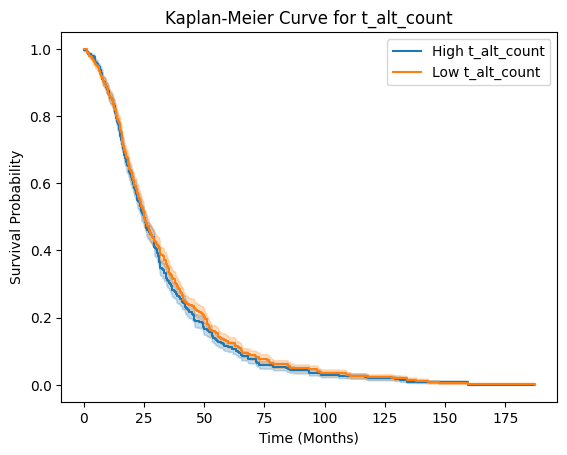

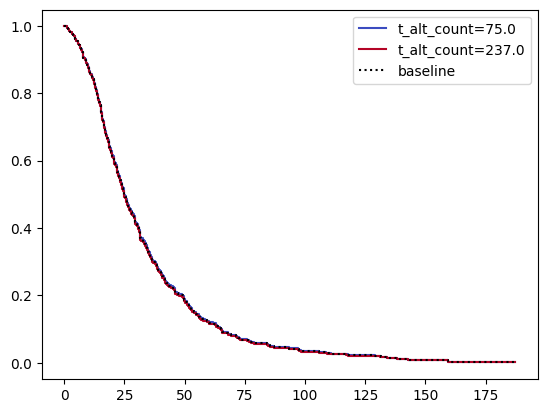

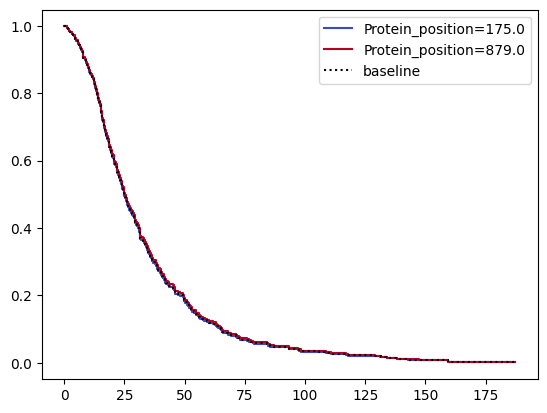

In [24]:
import pandas as pd
import numpy as np
from lifelines import CoxPHFitter, KaplanMeierFitter
import matplotlib.pyplot as plt

# Load the clinical and mutation data
clinical_data = pd.read_csv('crc_eo_2020_clinical_data.tsv', sep="\t")
mutation_data = pd.read_csv('data_mutations.txt', sep="\t")  # Replace with your actual mutation data file

# Clean and merge mutation + clinical data
# Select relevant mutation columns for analysis, including new ones
mutation_data_clean = mutation_data[['Tumor_Sample_Barcode', 'Hugo_Symbol', 'Variant_Classification', 't_alt_count', 'Variant_Type', 'Consequence', 'Protein_position']]  
mutation_data_clean.rename(columns={'Tumor_Sample_Barcode': 'Sample ID'}, inplace=True)

# Filter out rows with missing survival data in clinical data
clinical_data_clean = clinical_data.dropna(subset=['Overall Survival (Months) from Dx of Met', 'Overall Survival Status'])

# Merge clinical and mutation data on 'Sample ID'
merged_data = pd.merge(clinical_data_clean[['Sample ID', 'Overall Survival (Months) from Dx of Met', 'Overall Survival Status']], mutation_data_clean, on='Sample ID', how='inner')

# One-hot encode mutation-related categorical columns ('Variant_Type', 'Variant_Classification', 'Hugo_Symbol', 'Consequence')
categorical_columns = ['Variant_Type', 'Variant_Classification', 'Hugo_Symbol', 'Consequence']
merged_data = pd.get_dummies(merged_data, columns=categorical_columns, drop_first=True)

# Remove low-variance columns (if any)
low_variance_cols = ['Number of Samples Per Patient', 'Used in Clinical Analysis', 'Used in Genomic MSS Analysis', 'Used in Genomic MSS Met Survival Analysis']
merged_data = merged_data.drop(columns=low_variance_cols, errors='ignore')

# Filter rows that have necessary columns filled (no NaNs)
filtered_data = merged_data.dropna(subset=['Overall Survival (Months) from Dx of Met', 'Overall Survival Status', 't_alt_count'])

# Map 'Overall Survival Status' to numeric values (1 for DECEASED, 0 for ALIVE)
filtered_data['Overall Survival Status'] = filtered_data['Overall Survival Status'].map({'1:DECEASED': 1, '0:ALIVE': 0})

# Drop any remaining rows with missing values in the feature columns
filtered_data_clean = filtered_data.dropna()

# Check for any remaining NaNs before fitting
print("Checking for missing values in X and y:")
X = filtered_data_clean.select_dtypes(include=[np.number]).drop(columns=['Overall Survival (Months) from Dx of Met', 'Overall Survival Status'])
y = filtered_data_clean[['Overall Survival (Months) from Dx of Met', 'Overall Survival Status']]

print(X.isnull().sum())
print(y.isnull().sum())

# Apply LASSO-Cox using L1 regularization (penalizer=1.0)
cph = CoxPHFitter(penalizer=1.0)

# Ensure there are no NaN values before fitting
if not X.isnull().values.any() and not y.isnull().values.any():
    cph.fit(X.join(y), duration_col='Overall Survival (Months) from Dx of Met', event_col='Overall Survival Status')

    # Get the top N mutation-related features based on LASSO-Cox model
    feature_importance = cph.params_.abs().sort_values(ascending=False)
    top_n = 10  # Define top N features
    print(f"Top {top_n} Mutation Features based on LASSO-Cox:\n", feature_importance.head(top_n))

    # Use the top mutation-related features from the LASSO-Cox model
    top_features = feature_importance.head(top_n).index.tolist()
    X_combined = filtered_data_clean[top_features]
    y_combined = filtered_data_clean[['Overall Survival (Months) from Dx of Met', 'Overall Survival Status']]

    # Fit CoxPH model with the top N mutation-related features (multivariate model)
    cph_combined = CoxPHFitter()
    cph_combined.fit(X_combined.join(y_combined), 
                     duration_col='Overall Survival (Months) from Dx of Met', 
                     event_col='Overall Survival Status')

    # Print the combined CoxPH model summary
    cph_combined.print_summary()

    #  Kaplan-Meier Survival Curve using the top mutation feature
    kmf = KaplanMeierFitter()

    # Use the top feature (e.g., Protein_position) to create survival groups
    top_feature = top_features[0]  # Taking the top feature based on LASSO-Cox
    median_value = filtered_data_clean[top_feature].median()

    # Create two groups based on the median value of the top feature
    high_group = filtered_data_clean[filtered_data_clean[top_feature] > median_value]
    low_group = filtered_data_clean[filtered_data_clean[top_feature] <= median_value]

    # Plot Kaplan-Meier curve for the high group
    kmf.fit(high_group['Overall Survival (Months) from Dx of Met'], 
            event_observed=high_group['Overall Survival Status'], label=f'High {top_feature}')
    ax = kmf.plot()

    # Plot Kaplan-Meier curve for the low group
    kmf.fit(low_group['Overall Survival (Months) from Dx of Met'], 
            event_observed=low_group['Overall Survival Status'], label=f'Low {top_feature}')
    kmf.plot(ax=ax)

    # Add labels and title to the Kaplan-Meier plot
    plt.title(f'Kaplan-Meier Curve for {top_feature}')
    plt.xlabel('Time (Months)')
    plt.ylabel('Survival Probability')
    plt.show()

    # Plot the partial effects of the top mutation features
    for feature in top_features:
        cph_combined.plot_partial_effects_on_outcome(covariates=feature, 
                                                     values=[filtered_data_clean[feature].quantile(0.25), 
                                                             filtered_data_clean[feature].quantile(0.75)], cmap="coolwarm")

    plt.show()

else:
    print("There are still NaN values in the dataset.")


/tmp/ipykernel_3909/2915589141.py:8: DtypeWarning: Columns (44) have mixed types. Specify dtype option on import or set low_memory=False.
  mutation_data = pd.read_csv('data_mutations.txt', sep="\t")  # Replace with your actual mutation data file
/tmp/ipykernel_3909/2915589141.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mutation_data_clean.rename(columns={'Tumor_Sample_Barcode': 'Sample ID'}, inplace=True)


Checking for missing values in X and y:
t_alt_count         0
Protein_position    0
dtype: int64
Overall Survival (Months) from Dx of Met    0
Overall Survival Status                     0
dtype: int64
Top 10 Mutation Features based on LASSO-Cox:
 covariate
t_alt_count         0.000049
Protein_position    0.000020
Name: coef, dtype: float64


ImportError: Pandas requires version '3.1.2' or newer of 'jinja2' (version '2.11.2' currently installed).

<lifelines.CoxPHFitter: fitted with 3246 total observations, 0 right-censored observations>
             duration col = 'Overall Survival (Months) from Dx of Met'
                event col = 'Overall Survival Status'
      baseline estimation = breslow
   number of observations = 3246
number of events observed = 3246
   partial log-likelihood = -23001.29
         time fit was run = 2024-09-10 20:31:10 UTC

---
                  coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                         
t_alt_count       0.00      1.00      0.00           -0.00            0.00                1.00                1.00
Protein_position -0.00      1.00      0.00           -0.00            0.00                1.00                1.00

                  cmp to     z    p  -log2(p)
covariate                                    
t_alt_count         0.00  1.66 0.10      3.38
Protein_position    0.00 -1.35 0.18      2.49
---
Concordance = 0.51
Partial AIC = 46006.57
log-likelihood ratio test = 4.33 on 2 df
-log2(p) of ll-ratio test = 3.13

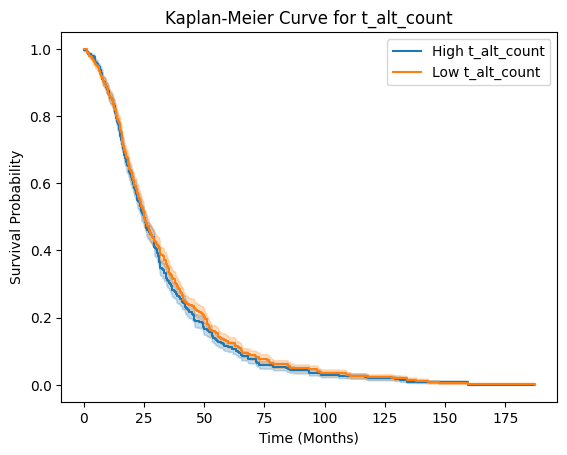

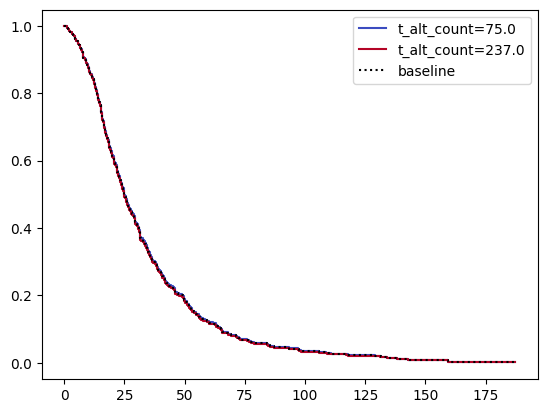

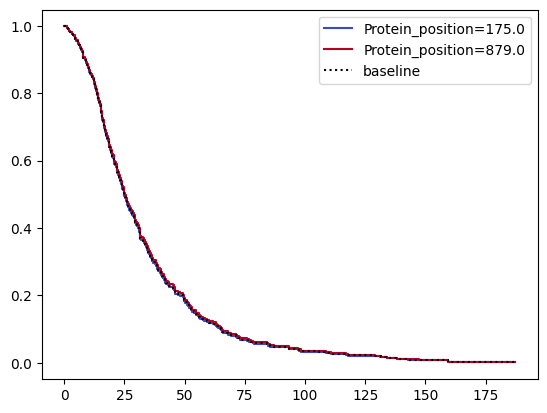

In [25]:
import pandas as pd
import numpy as np
from lifelines import CoxPHFitter, KaplanMeierFitter
import matplotlib.pyplot as plt

#  Load the clinical and mutation data
clinical_data = pd.read_csv('crc_eo_2020_clinical_data.tsv', sep="\t")
mutation_data = pd.read_csv('data_mutations.txt', sep="\t")  # Replace with your actual mutation data file

#  Clean and merge mutation + clinical data
# Select relevant mutation columns for analysis, including new ones
mutation_data_clean = mutation_data[['Tumor_Sample_Barcode', 'Hugo_Symbol', 'Variant_Classification', 't_alt_count', 'Variant_Type', 'Consequence', 'Protein_position']]  
mutation_data_clean.rename(columns={'Tumor_Sample_Barcode': 'Sample ID'}, inplace=True)

#  Filter out rows with missing survival data in clinical data
clinical_data_clean = clinical_data.dropna(subset=['Overall Survival (Months) from Dx of Met', 'Overall Survival Status'])

#  Merge clinical and mutation data on 'Sample ID'
merged_data = pd.merge(clinical_data_clean[['Sample ID', 'Overall Survival (Months) from Dx of Met', 'Overall Survival Status']], mutation_data_clean, on='Sample ID', how='inner')

#  One-hot encode mutation-related categorical columns ('Variant_Type', 'Variant_Classification', 'Hugo_Symbol', 'Consequence')
categorical_columns = ['Variant_Type', 'Variant_Classification', 'Hugo_Symbol', 'Consequence']
merged_data = pd.get_dummies(merged_data, columns=categorical_columns, drop_first=True)

#  Remove low-variance columns (if any)
# In this case, no such columns were detected in mutation data, but let's handle errors
low_variance_cols = ['Number of Samples Per Patient', 'Used in Clinical Analysis', 'Used in Genomic MSS Analysis', 'Used in Genomic MSS Met Survival Analysis']
merged_data = merged_data.drop(columns=low_variance_cols, errors='ignore')

# Filter rows that have necessary columns filled (no NaNs)
filtered_data = merged_data.dropna(subset=['Overall Survival (Months) from Dx of Met', 'Overall Survival Status', 't_alt_count'])

# Map 'Overall Survival Status' to numeric values (1 for DECEASED, 0 for ALIVE)
filtered_data['Overall Survival Status'] = filtered_data['Overall Survival Status'].map({'1:DECEASED': 1, '0:ALIVE': 0})

#  Drop any remaining rows with missing values in the feature columns
filtered_data_clean = filtered_data.dropna()

#  Check for any remaining NaNs before fitting
print("Checking for missing values in X and y:")
X = filtered_data_clean.select_dtypes(include=[np.number]).drop(columns=['Overall Survival (Months) from Dx of Met', 'Overall Survival Status'])
y = filtered_data_clean[['Overall Survival (Months) from Dx of Met', 'Overall Survival Status']]

print(X.isnull().sum())
print(y.isnull().sum())

# Apply LASSO-Cox using L1 regularization (penalizer=1.0)
cph = CoxPHFitter(penalizer=1.0)

# Ensure there are no NaN values before fitting
if not X.isnull().values.any() and not y.isnull().values.any():
    cph.fit(X.join(y), duration_col='Overall Survival (Months) from Dx of Met', event_col='Overall Survival Status')

    #  Get the top N mutation-related features based on LASSO-Cox model
    feature_importance = cph.params_.abs().sort_values(ascending=False)
    top_n = 10  # Define top N features
    print(f"Top {top_n} Mutation Features based on LASSO-Cox:\n", feature_importance.head(top_n))

    #  Use the top mutation-related features from the LASSO-Cox model
    top_features = feature_importance.head(top_n).index.tolist()
    X_combined = filtered_data_clean[top_features]
    y_combined = filtered_data_clean[['Overall Survival (Months) from Dx of Met', 'Overall Survival Status']]

    #  Fit CoxPH model with the top N mutation-related features (multivariate model)
    cph_combined = CoxPHFitter()
    cph_combined.fit(X_combined.join(y_combined), 
                     duration_col='Overall Survival (Months) from Dx of Met', 
                     event_col='Overall Survival Status')

    # Print the combined CoxPH model summary
    cph_combined.print_summary()

    #  Kaplan-Meier Survival Curve using the top mutation feature
    kmf = KaplanMeierFitter()

    # Use the top feature (e.g., Protein_position) to create survival groups
    top_feature = top_features[0]  # Taking the top feature based on LASSO-Cox
    median_value = filtered_data_clean[top_feature].median()

    # Create two groups based on the median value of the top feature
    high_group = filtered_data_clean[filtered_data_clean[top_feature] > median_value]
    low_group = filtered_data_clean[filtered_data_clean[top_feature] <= median_value]

    # Plot Kaplan-Meier curve for the high group
    kmf.fit(high_group['Overall Survival (Months) from Dx of Met'], 
            event_observed=high_group['Overall Survival Status'], label=f'High {top_feature}')
    ax = kmf.plot()

    # Plot Kaplan-Meier curve for the low group
    kmf.fit(low_group['Overall Survival (Months) from Dx of Met'], 
            event_observed=low_group['Overall Survival Status'], label=f'Low {top_feature}')
    kmf.plot(ax=ax)

    # Add labels and title to the Kaplan-Meier plot
    plt.title(f'Kaplan-Meier Curve for {top_feature}')
    plt.xlabel('Time (Months)')
    plt.ylabel('Survival Probability')
    plt.show()

    # Step 15: Plot the partial effects of the top mutation features
    for feature in top_features:
        cph_combined.plot_partial_effects_on_outcome(covariates=feature, 
                                                     values=[filtered_data_clean[feature].quantile(0.25), 
                                                             filtered_data_clean[feature].quantile(0.75)], cmap="coolwarm")

    plt.show()

else:
    print("There are still NaN values in the dataset.")


/tmp/ipykernel_3948/2922302350.py:8: DtypeWarning: Columns (44) have mixed types. Specify dtype option on import or set low_memory=False.
  mutation_data = pd.read_csv('data_mutations.txt', sep="\t")  # Replace with your actual mutation data file
/tmp/ipykernel_3948/2922302350.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mutation_data_clean.rename(columns={'Tumor_Sample_Barcode': 'Sample ID'}, inplace=True)


Checking for missing values in X and y:
t_alt_count         0
Protein_position    0
dtype: int64
Overall Survival (Months) from Dx of Met    0
Overall Survival Status                     0
dtype: int64
Top 10 Mutation Features based on LASSO-Cox:
 covariate
t_alt_count         0.000049
Protein_position    0.000020
Name: coef, dtype: float64


ImportError: Pandas requires version '3.1.2' or newer of 'jinja2' (version '2.11.2' currently installed).

<lifelines.CoxPHFitter: fitted with 3246 total observations, 0 right-censored observations>
             duration col = 'Overall Survival (Months) from Dx of Met'
                event col = 'Overall Survival Status'
      baseline estimation = breslow
   number of observations = 3246
number of events observed = 3246
   partial log-likelihood = -23001.29
         time fit was run = 2024-09-11 18:03:03 UTC

---
                  coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                         
t_alt_count       0.00      1.00      0.00           -0.00            0.00                1.00                1.00
Protein_position -0.00      1.00      0.00           -0.00            0.00                1.00                1.00

                  cmp to     z    p  -log2(p)
covariate                                    
t_alt_count         0.00  1.66 0.10      3.38
Protein_position    0.00 -1.35 0.18      2.49
---
Concordance = 0.51
Partial AIC = 46006.57
log-likelihood ratio test = 4.33 on 2 df
-log2(p) of ll-ratio test = 3.13

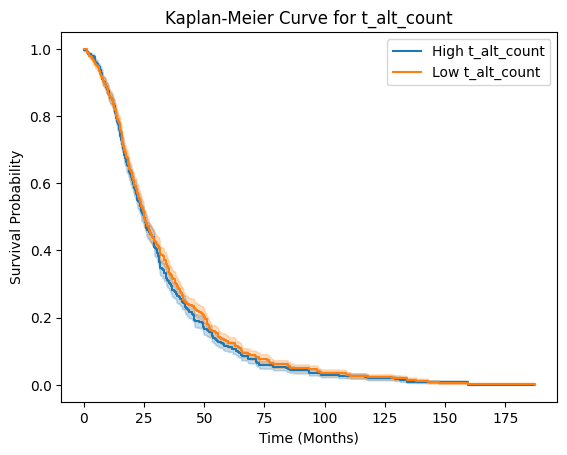

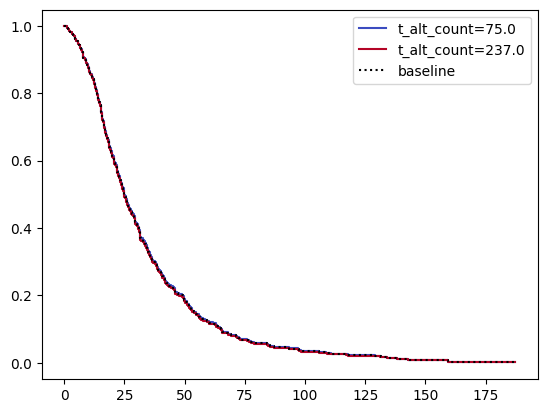

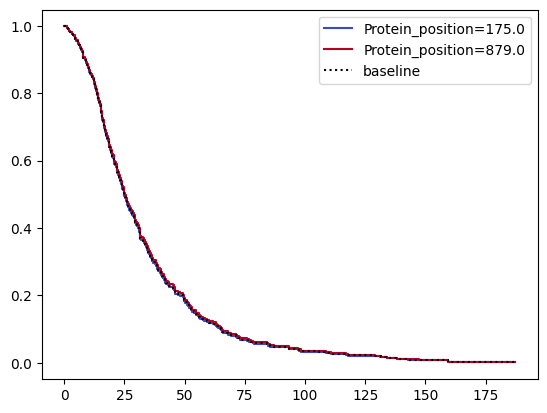

ImportError: Pandas requires version '3.1.2' or newer of 'jinja2' (version '2.11.2' currently installed).

<lifelines.CoxPHFitter: fitted with 3246 total observations, 0 right-censored observations>
             duration col = 'Overall Survival (Months) from Dx of Met'
                event col = 'Overall Survival Status'
      baseline estimation = breslow
   number of observations = 3246
number of events observed = 3246
   partial log-likelihood = -22999.85
         time fit was run = 2024-09-11 18:03:03 UTC

---
                  coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                         
Variant_Type_DNP -0.45      0.64      0.24           -0.92            0.01                0.40                1.01
Variant_Type_INS -0.03      0.97      0.09           -0.21            0.15                0.81                1.16
Variant_Type_ONP -0.64      0.53      0.45           -1.52            0.24                0.22                1.28
Variant_Type_SNP -0.08      0.92      0.06           -0.19            0.03                0.83                1.03

                  cmp to     z    p  -log2(p)
covariate                                    
Variant_Type_DNP    0.00 -1.91 0.06      4.16
Variant_Type_INS    0.00 -0.33 0.74      0.43
Variant_Type_ONP    0.00 -1.42 0.16      2.68
Variant_Type_SNP    0.00 -1.38 0.17      2.59
---
Concordance = 0.50
Partial AIC = 46007.70
log-likelihood ratio test = 7.21 on 4 df
-log2(p) of ll-ratio test = 3.00

ValueError: Values must be numeric: no strings, datetimes, objects, etc.

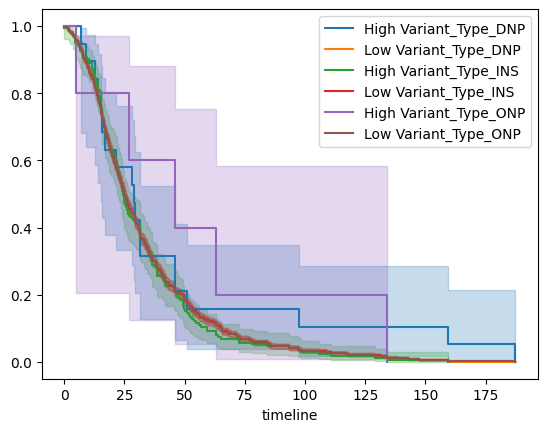

In [13]:
import pandas as pd
import numpy as np
from lifelines import CoxPHFitter, KaplanMeierFitter
import matplotlib.pyplot as plt

#  Load the clinical and mutation data
clinical_data = pd.read_csv('crc_eo_2020_clinical_data.tsv', sep="\t")
mutation_data = pd.read_csv('data_mutations.txt', sep="\t")  # Replace with your actual mutation data file

#  Clean and merge mutation + clinical data
# Select relevant mutation columns for analysis, including new ones
mutation_data_clean = mutation_data[['Tumor_Sample_Barcode', 'Hugo_Symbol', 'Variant_Classification', 't_alt_count', 'Variant_Type', 'Consequence', 'Protein_position']]  
mutation_data_clean.rename(columns={'Tumor_Sample_Barcode': 'Sample ID'}, inplace=True)

#  Filter out rows with missing survival data in clinical data
clinical_data_clean = clinical_data.dropna(subset=['Overall Survival (Months) from Dx of Met', 'Overall Survival Status'])

#  Merge clinical and mutation data on 'Sample ID'
merged_data = pd.merge(clinical_data_clean[['Sample ID', 'Overall Survival (Months) from Dx of Met', 'Overall Survival Status']], mutation_data_clean, on='Sample ID', how='inner')

#  One-hot encode mutation-related categorical columns ('Variant_Type', 'Variant_Classification', 'Hugo_Symbol', 'Consequence')
categorical_columns = ['Variant_Type', 'Variant_Classification', 'Hugo_Symbol', 'Consequence']
merged_data = pd.get_dummies(merged_data, columns=categorical_columns, drop_first=True)

#  Remove low-variance columns (if any)
low_variance_cols = ['Number of Samples Per Patient', 'Used in Clinical Analysis', 'Used in Genomic MSS Analysis', 'Used in Genomic MSS Met Survival Analysis']
merged_data = merged_data.drop(columns=low_variance_cols, errors='ignore')

#  Filter rows that have necessary columns filled (no NaNs)
filtered_data = merged_data.dropna(subset=['Overall Survival (Months) from Dx of Met', 'Overall Survival Status', 't_alt_count'])

# Map 'Overall Survival Status' to numeric values (1 for DECEASED, 0 for ALIVE)
filtered_data['Overall Survival Status'] = filtered_data['Overall Survival Status'].map({'1:DECEASED': 1, '0:ALIVE': 0})

#  Drop any remaining rows with missing values in the feature columns
filtered_data_clean = filtered_data.dropna()

# Check for any remaining NaNs before fitting
print("Checking for missing values in X and y:")
X = filtered_data_clean.select_dtypes(include=[np.number]).drop(columns=['Overall Survival (Months) from Dx of Met', 'Overall Survival Status'])
y = filtered_data_clean[['Overall Survival (Months) from Dx of Met', 'Overall Survival Status']]

print(X.isnull().sum())
print(y.isnull().sum())

#  Apply LASSO-Cox using L1 regularization (penalizer=1.0)
cph = CoxPHFitter(penalizer=1.0)

# Ensure there are no NaN values before fitting
if not X.isnull().values.any() and not y.isnull().values.any():
    cph.fit(X.join(y), duration_col='Overall Survival (Months) from Dx of Met', event_col='Overall Survival Status')

    #  Get the top N mutation-related features based on LASSO-Cox model
    feature_importance = cph.params_.abs().sort_values(ascending=False)
    top_n = 10  # Define top N features
    print(f"Top {top_n} Mutation Features based on LASSO-Cox:\n", feature_importance.head(top_n))

    #  Use the top mutation-related features from the LASSO-Cox model
    top_features = feature_importance.head(top_n).index.tolist()
    X_combined = filtered_data_clean[top_features]
    y_combined = filtered_data_clean[['Overall Survival (Months) from Dx of Met', 'Overall Survival Status']]

    #  Fit CoxPH model with the top N mutation-related features (multivariate model)
    cph_combined = CoxPHFitter()
    cph_combined.fit(X_combined.join(y_combined), 
                     duration_col='Overall Survival (Months) from Dx of Met', 
                     event_col='Overall Survival Status')

    # Print the combined CoxPH model summary
    cph_combined.print_summary()

    #  Kaplan-Meier Survival Curve using the top mutation feature
    kmf = KaplanMeierFitter()

    # Use the top feature (e.g., Protein_position) to create survival groups
    top_feature = top_features[0]  # Taking the top feature based on LASSO-Cox
    median_value = filtered_data_clean[top_feature].median()

    # Create two groups based on the median value of the top feature
    high_group = filtered_data_clean[filtered_data_clean[top_feature] > median_value]
    low_group = filtered_data_clean[filtered_data_clean[top_feature] <= median_value]

    # Plot Kaplan-Meier curve for the high group
    kmf.fit(high_group['Overall Survival (Months) from Dx of Met'], 
            event_observed=high_group['Overall Survival Status'], label=f'High {top_feature}')
    ax = kmf.plot()

    # Plot Kaplan-Meier curve for the low group
    kmf.fit(low_group['Overall Survival (Months) from Dx of Met'], 
            event_observed=low_group['Overall Survival Status'], label=f'Low {top_feature}')
    kmf.plot(ax=ax)

    # Add labels and title to the Kaplan-Meier plot
    plt.title(f'Kaplan-Meier Curve for {top_feature}')
    plt.xlabel('Time (Months)')
    plt.ylabel('Survival Probability')
    plt.show()

    #  Plot the partial effects of the top mutation features
    for feature in top_features:
        cph_combined.plot_partial_effects_on_outcome(covariates=feature, 
                                                     values=[filtered_data_clean[feature].quantile(0.25), 
                                                             filtered_data_clean[feature].quantile(0.75)], cmap="coolwarm")

    plt.show()

    # CoxPH model and Kaplan-Meier plot for 'Variant_Type'
    variant_columns = [col for col in filtered_data_clean.columns if 'Variant_Type' in col]
    if variant_columns:
        X_variant = filtered_data_clean[variant_columns]
        X_variant_combined = X_variant.join(y)

        # Fit CoxPH model with variant type
        cph_variant = CoxPHFitter()
        cph_variant.fit(X_variant_combined, duration_col='Overall Survival (Months) from Dx of Met', event_col='Overall Survival Status')

        # Print the CoxPH model for variant type
        cph_variant.print_summary()

        # Plot Kaplan-Meier curves for each variant type group
        kmf_variant = KaplanMeierFitter()

        for variant in variant_columns:
            median_value_variant = filtered_data_clean[variant].median()

            # Create two groups for the variant type
            high_group_variant = filtered_data_clean[filtered_data_clean[variant] > median_value_variant]
            low_group_variant = filtered_data_clean[filtered_data_clean[variant] <= median_value_variant]

            # Plot KM curve for high group of the variant type
            kmf_variant.fit(high_group_variant['Overall Survival (Months) from Dx of Met'], 
                            event_observed=high_group_variant['Overall Survival Status'], label=f'High {variant}')
            ax_variant = kmf_variant.plot()

            # Plot KM curve for low group of the variant type
            kmf_variant.fit(low_group_variant['Overall Survival (Months) from Dx of Met'], 
                            event_observed=low_group_variant['Overall Survival Status'], label=f'Low {variant}')
            kmf_variant.plot(ax=ax_variant)

        # Add labels and title for the variant Kaplan-Meier plot
        plt.title(f'Kaplan-Meier Curve for Variant Types')
        plt.xlabel('Time (Months)')
        plt.ylabel('Survival Probability')
        plt.show()

else:
    print("There are still NaN values in the dataset.")


In [13]:
import pandas as pd
import numpy as np
from lifelines import CoxPHFitter, KaplanMeierFitter
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

#  Load the clinical and CNA data
clinical_data = pd.read_csv('crc_eo_2020_clinical_data.tsv', sep="\t")
cna_data = pd.read_csv('data_cna.txt', sep="\t")  # Replace with your actual CNA data file

#  Reshape the CNA data from wide format to long format
cna_data_melted = cna_data.melt(id_vars=['Hugo_Symbol'], var_name='Sample ID', value_name='CNA_Value')

#  Inspect both datasets before merge
print(f"Clinical Data: {clinical_data.shape}")
print(f"CNA Data: {cna_data_melted.shape}")

#  Filter clinical data to only include rows with survival information
clinical_data_clean = clinical_data.dropna(subset=['Overall Survival (Months) from Dx of Met', 'Overall Survival Status'])
print(f"Filtered Clinical Data (with survival info): {clinical_data_clean.shape}")

#  Merge clinical and CNA data on 'Sample ID'
merged_data = pd.merge(clinical_data_clean, cna_data_melted, on='Sample ID', how='inner')
print(f"Merged Data: {merged_data.shape}")

# Check for any NaN values after the merge
print("Checking for NaN values after merge:")
print(merged_data.isnull().sum())

#  One-hot encode the 'Hugo_Symbol' (gene names)
merged_data = pd.get_dummies(merged_data, columns=['Hugo_Symbol'], drop_first=True)

#  Remove low-variance columns (if applicable)
low_variance_cols = ['Number of Samples Per Patient', 'Used in Clinical Analysis', 'Used in Genomic MSS Analysis', 'Used in Genomic MSS Met Survival Analysis']
merged_data = merged_data.drop(columns=low_variance_cols, errors='ignore')

#  Filter rows with necessary columns filled (no NaNs)
filtered_data = merged_data.dropna(subset=['Overall Survival (Months) from Dx of Met', 'Overall Survival Status', 'CNA_Value'])

# Map 'Overall Survival Status' to numeric values (1 for DECEASED, 0 for ALIVE)
filtered_data['Overall Survival Status'] = filtered_data['Overall Survival Status'].map({'1:DECEASED': 1, '0:ALIVE': 0})

# Drop any remaining rows with missing values
filtered_data_clean = filtered_data.dropna()

#  Select features for CoxPH model
X = filtered_data_clean.select_dtypes(include=[np.number]).drop(columns=['Overall Survival (Months) from Dx of Met', 'Overall Survival Status'])
y = filtered_data_clean[['Overall Survival (Months) from Dx of Met', 'Overall Survival Status']]

# Standardize features to avoid ill-conditioned matrix issues
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

#  Check for NaNs and Infinite values again
print("Checking for missing values in X and y:")
print(X_scaled.isnull().sum())
print(y.isnull().sum())

print("Checking for infinite values in X and y:")
print(np.isinf(X_scaled).sum())
print(np.isinf(y).sum())

# Check combined X and y for NaNs before fitting
combined_data = X_scaled.join(y)
print("Checking combined dataset for NaN values:")
print(combined_data.isnull().sum())

# Apply CoxPH model
cph = CoxPHFitter(penalizer=1.0)

if not combined_data.isnull().values.any():
    cph.fit(combined_data, duration_col='Overall Survival (Months) from Dx of Met', event_col='Overall Survival Status')

    # Get the top N features based on CoxPH model
    feature_importance = cph.params_.abs().sort_values(ascending=False)
    top_n = 10  # Define top N features
    print(f"Top {top_n} CNA Features based on CoxPH:\n", feature_importance.head(top_n))

    # Print full CoxPH model summary
    cph.print_summary()

    # Kaplan-Meier Survival Curve for top feature
    kmf = KaplanMeierFitter()
    top_feature = feature_importance.head(1).index[0]

    median_value = X_scaled[top_feature].median()
    high_group = filtered_data_clean[X_scaled[top_feature] > median_value]
    low_group = filtered_data_clean[X_scaled[top_feature] <= median_value]

    kmf.fit(high_group['Overall Survival (Months) from Dx of Met'], 
            event_observed=high_group['Overall Survival Status'], label=f'High {top_feature}')
    ax = kmf.plot()

    kmf.fit(low_group['Overall Survival (Months) from Dx of Met'], 
            event_observed=low_group['Overall Survival Status'], label=f'Low {top_feature}')
    kmf.plot(ax=ax)

    plt.title(f'Kaplan-Meier Curve for {top_feature}')
    plt.xlabel('Time (Months)')
    plt.ylabel('Survival Probability')
    plt.show()

else:
    print("There are still NaN or infinite values in the dataset.")


Clinical Data: (1516, 44)
CNA Data: (818533, 3)
Filtered Clinical Data (with survival info): (1140, 44)
Merged Data: (616740, 46)
Checking for NaN values after merge:
Study ID                                          0
Patient ID                                        0
Sample ID                                         0
Age at Diagnosis                                541
Age Groups                                      541
Age Subgroups                                   541
BMI                                            9197
BMI categories                                 3246
Cancer Type                                       0
Cancer Type Detailed                              0
Impact TMB Score                               2164
Diabetes Mellitus History                     12984
First Symptoms at Diagnosis                   13525
Fraction Genome Altered                           0
Gene Panel                                        0
Hypertension History                          16230
M

In [2]:
# Check the first few rows and column names of your CNA data
print(cna_data.head())
print(cna_data.columns)


  Hugo_Symbol  P-0024260-T01-IM6  P-0035326-T01-IM6  P-0003886-T01-IM5  \
0         RB1                  0                  0                  0   
1        MDC1                  0                  0                  0   
2        ARAF                  0                  0                  0   
3       PREX2                  0                  0                  0   
4       SOX17                  0                  0                  0   

   P-0007486-T01-IM5  P-0004011-T01-IM5  P-0030238-T01-IM6  P-0013551-T01-IM5  \
0                  0                  0                  0                  0   
1                  0                  0                  0                  0   
2                  0                  0                  0                  0   
3                  0                  0                  0                  0   
4                  0                  0                  0                  0   

   P-0007567-T01-IM5  P-0030540-T01-IM6  ...  P-0004494-T01-IM5  \
0

In [17]:
import pandas as pd
import numpy as np
from lifelines import CoxPHFitter, KaplanMeierFitter
import matplotlib.pyplot as plt

# Step 1: Load the clinical and SV data
clinical_data = pd.read_csv('crc_eo_2020_clinical_data.tsv', sep="\t")  # Replace with actual clinical data file
sv_data = pd.read_csv('data_sv.txt', sep="\t")  # Replace with actual SV data file

# Step 2: Select relevant columns from SV data
sv_data_clean = sv_data[['Sample_Id', 'SV_Length', 'Tumor_Read_Count', 'SV_VariantId']]

# Step 3: Clean and select relevant columns from the clinical data
clinical_data_clean = clinical_data[['Sample ID', 'Overall Survival (Months) from Dx of Met', 'Overall Survival Status']].dropna()

# Step 4: Merge SV and clinical data on 'Sample_Id'
merged_data = pd.merge(sv_data_clean, clinical_data_clean, left_on='Sample_Id', right_on='Sample ID', how='inner')

# Step 5: Map 'Overall Survival Status' to numeric values (1 for DECEASED, 0 for ALIVE)
merged_data['Overall Survival Status'] = merged_data['Overall Survival Status'].map({'1:DECEASED': 1, '0:ALIVE': 0})

# Step 6: Initialize CoxPHFitter
cph = CoxPHFitter()

# Step 7: Loop over each unique SV variant
for sv_variant in merged_data['SV_VariantId'].unique():
    print(f"Processing SV {sv_variant}...")

    # Filter data for the current SV variant
    sv_data_variant = merged_data[merged_data['SV_VariantId'] == sv_variant]
    
    # Skip if there are fewer than 2 samples
    if len(sv_data_variant) < 2:
        print(f"Skipping SV {sv_variant} due to insufficient data.")
        continue

    # Select relevant features and target variables
    X = sv_data_variant[['SV_Length', 'Tumor_Read_Count']]
    y = sv_data_variant[['Overall Survival (Months) from Dx of Met', 'Overall Survival Status']]
    
    # Handle NaNs and infinite values
    X.replace([np.inf, -np.inf], np.nan, inplace=True)
    y.replace([np.inf, -np.inf], np.nan, inplace=True)
    X.dropna(inplace=True)
    y.dropna(inplace=True)

    # Check for remaining NaNs
    if X.isnull().sum().any() or y.isnull().sum().any():
        print(f"Skipping SV {sv_variant} due to NaN values after cleaning.")
        continue

    # Fit the CoxPH model with penalizer
    try:
        cph.fit(X.join(y), duration_col='Overall Survival (Months) from Dx of Met', event_col='Overall Survival Status', penalizer=0.1)
        print(f"CoxPH model summary for SV {sv_variant}:")
        cph.print_summary()

        # Kaplan-Meier plots (for illustrative purposes)
        kmf = KaplanMeierFitter()

        median_value = sv_data_variant['SV_Length'].median()
        high_group = sv_data_variant[sv_data_variant['SV_Length'] > median_value]
        low_group = sv_data_variant[sv_data_variant['SV_Length'] <= median_value]

        kmf.fit(high_group['Overall Survival (Months) from Dx of Met'], event_observed=high_group['Overall Survival Status'], label=f'High SV_Length (SV {sv_variant})')
        ax = kmf.plot()

        kmf.fit(low_group['Overall Survival (Months) from Dx of Met'], event_observed=low_group['Overall Survival Status'], label=f'Low SV_Length (SV {sv_variant})')
        kmf.plot(ax=ax)

        plt.title(f'Kaplan-Meier Curves for SV {sv_variant}')
        plt.show()

    except Exception as e:
        print(f"Error processing SV {sv_variant}: {e}")


Processing SV 158263.0...
Skipping SV 158263.0 due to insufficient data.
Processing SV 157136.0...
Skipping SV 157136.0 due to insufficient data.
Processing SV 160709.0...
Skipping SV 160709.0 due to insufficient data.
Processing SV 158876.0...
Skipping SV 158876.0 due to insufficient data.
Processing SV 158877.0...
Skipping SV 158877.0 due to insufficient data.
Processing SV 160809.0...
Skipping SV 160809.0 due to insufficient data.
Processing SV 145060.0...
Skipping SV 145060.0 due to insufficient data.
Processing SV 138104.0...
Skipping SV 138104.0 due to insufficient data.
Processing SV 162064.0...
Skipping SV 162064.0 due to insufficient data.
Processing SV 162456.0...
Skipping SV 162456.0 due to insufficient data.
Processing SV 150440.0...
Skipping SV 150440.0 due to insufficient data.
Processing SV 153674.0...
Skipping SV 153674.0 due to insufficient data.
Processing SV 158761.0...
Skipping SV 158761.0 due to insufficient data.
Processing SV 144986.0...
Skipping SV 144986.0 due 

In [20]:
import pandas as pd
import numpy as np
from lifelines import CoxPHFitter
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

# Load the data
sv_data = pd.read_csv('data_sv.txt', sep="\t")  

# Clean and filter data: select relevant columns
sv_data_clean = sv_data[['Sample_Id', 'SV_Length', 'Tumor_Read_Count', 'SV_VariantId']]

# Assume 'clinical_data' contains survival info (replace with actual data file loading)
# clinical_data = pd.read_csv("/path/to/clinical_data.csv")

# Sample clinical data mock-up (for testing purposes, you should replace it with the actual file)
clinical_data_clean = clinical_data[['Sample ID', 'Overall Survival (Months) from Dx of Met', 'Overall Survival Status']].dropna()

# Merge SV and clinical data on 'Sample_Id'
merged_data = pd.merge(sv_data_clean, clinical_data_clean, left_on='Sample_Id', right_on='Sample ID', how='inner')

# Handle missing values: Impute or drop rows with missing values
merged_data['SV_Length'].fillna(merged_data['SV_Length'].median(), inplace=True)
merged_data['Tumor_Read_Count'].fillna(merged_data['Tumor_Read_Count'].median(), inplace=True)
merged_data.dropna(subset=['Overall Survival (Months) from Dx of Met', 'Overall Survival Status'], inplace=True)

# Create CoxPH model for each SV_VariantId
sv_variants = merged_data['SV_VariantId'].unique()
cph = CoxPHFitter()

for sv_variant in sv_variants:
    sv_data_subset = merged_data[merged_data['SV_VariantId'] == sv_variant]
    
    # Ensure enough data to process (at least 2 entries)
    if sv_data_subset.shape[0] < 2:
        print(f"Skipping SV {sv_variant} due to insufficient data.")
        continue
    
    # Select top features for the CoxPH model
    X = sv_data_subset[['SV_Length', 'Tumor_Read_Count']]
    y = sv_data_subset[['Overall Survival (Months) from Dx of Met', 'Overall Survival Status']]
    
    # Handle potential infinite values or NaNs
    X.replace([np.inf, -np.inf], np.nan, inplace=True)
    X.dropna(inplace=True)
    y.replace([np.inf, -np.inf], np.nan, inplace=True)
    y.dropna(inplace=True)

    try:
        # Fit CoxPH model
        cph.fit(X.join(y), duration_col='Overall Survival (Months) from Dx of Met', event_col='Overall Survival Status')
        
        # Print CoxPH summary for this SV
        print(f"Summary for SV {sv_variant}:")
        print(cph.summary)
        
        # Plot Kaplan-Meier curves for SV features (e.g., SV_Length)
        kmf = KaplanMeierFitter()
        median_sv_length = sv_data_subset['SV_Length'].median()

        high_sv_length = sv_data_subset[sv_data_subset['SV_Length'] > median_sv_length]
        low_sv_length = sv_data_subset[sv_data_subset['SV_Length'] <= median_sv_length]
        
        plt.figure(figsize=(10, 6))
        
        # Fit Kaplan-Meier for high SV_Length group
        kmf.fit(high_sv_length['Overall Survival (Months) from Dx of Met'], event_observed=high_sv_length['Overall Survival Status'], label=f'High SV_Length (SV {sv_variant})')
        ax = kmf.plot()
        
        # Fit Kaplan-Meier for low SV_Length group
        kmf.fit(low_sv_length['Overall Survival (Months) from Dx of Met'], event_observed=low_sv_length['Overall Survival Status'], label=f'Low SV_Length (SV {sv_variant})')
        kmf.plot(ax=ax)
        
        plt.title(f"Kaplan-Meier Survival Curve for SV {sv_variant}")
        plt.xlabel("Survival Time (Months)")
        plt.ylabel("Survival Probability")
        plt.show()

    except Exception as e:
        print(f"Error processing SV {sv_variant}: {e}")


Skipping SV 158263.0 due to insufficient data.
Skipping SV 157136.0 due to insufficient data.
Skipping SV 160709.0 due to insufficient data.
Skipping SV 158876.0 due to insufficient data.
Skipping SV 158877.0 due to insufficient data.
Skipping SV 160809.0 due to insufficient data.
Skipping SV 145060.0 due to insufficient data.
Skipping SV 138104.0 due to insufficient data.
Skipping SV 162064.0 due to insufficient data.
Skipping SV 162456.0 due to insufficient data.
Skipping SV 150440.0 due to insufficient data.
Skipping SV 153674.0 due to insufficient data.
Skipping SV 158761.0 due to insufficient data.
Skipping SV 144986.0 due to insufficient data.
Skipping SV 40126.0 due to insufficient data.
Skipping SV 42648.0 due to insufficient data.
Skipping SV 136070.0 due to insufficient data.
Skipping SV 70446.0 due to insufficient data.
Skipping SV 130040.0 due to insufficient data.
Skipping SV 109479.0 due to insufficient data.
Skipping SV 69057.0 due to insufficient data.
Skipping SV 11838

/tmp/ipykernel_3857/4183105949.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_data['SV_Length'].fillna(merged_data['SV_Length'].median(), inplace=True)
/tmp/ipykernel_3857/4183105949.py:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].

In [26]:
import pandas as pd

# Load the data
file_path = 'data_sv.txt'
df = pd.read_csv(file_path, sep='\t')

# Display the first few rows to understand the structure
print(df.head())

# Check for missing values and remove rows with missing or insufficient data in critical columns
filtered_df = df.dropna(subset=['SV_VariantId', 'Tumor_Read_Count'])

# Ensure that Tumor_Read_Count has a minimum threshold (e.g., greater than 0)
filtered_df = filtered_df[filtered_df['Tumor_Read_Count'] > 0]

# Count the number of unique SV_VariantId
sv_count = filtered_df['SV_VariantId'].nunique()
print(f"Number of unique SV_VariantId present: {sv_count}")

# Aggregate data by SV_VariantId and summarize key stats
sv_summary = filtered_df.groupby('SV_VariantId').agg({
    'Tumor_Read_Count': ['count', 'mean', 'min', 'max'],
    'Tumor_Split_Read_Support': ['mean', 'min', 'max']
})

# Display the results
print(sv_summary)
print(df.shape)

           Sample_Id Site1_Chromosome  \
0  P-0012110-T01-IM5                3   
1  P-0012623-T01-IM5               15   
2  P-0011259-T01-IM5                8   
3  P-0013277-T01-IM5               13   
4  P-0012779-T01-IM5               15   

                         Site1_Description  Site1_Region  Site1_Region_Number  \
0  Intron of PBRM1(-): 131bp after exon 29           NaN                  NaN   
1    Intron of MGA(+): 75bp before exon 16           NaN                  NaN   
2               IGR: 295Kb before GFRA2(-)           NaN                  NaN   
3               IGR: 16Kb before AKAP11(+)           NaN                  NaN   
4                         Exon 1 of B2M(+)           NaN                  NaN   

  Site1_Hugo_Symbol  Site1_Position Site2_Chromosome  \
0             PBRM1      52584306.0                3   
1               MGA      42041234.0                9   
2             GFRA2      21254285.0                4   
3            AKAP11      42830282.0       

In [6]:
import pandas as pd

sv_data = pd.read_csv('data_sv.txt', sep='\t')
# Check for NaN values in each column and print them
nan_counts = sv_data.isna().sum()

# Print NaN count for each column
print(nan_counts)

# If you want to filter out columns with more than 50% NaN values, you can use the following:
threshold = len(sv_data) * 0.5
columns_to_remove = nan_counts[nan_counts > threshold].index

# Print columns to be removed
print("Columns with more than 50% NaN values:")
print(columns_to_remove)

# Remove the columns with more than 50% NaN values
sv_data_cleaned = sv_data.drop(columns=columns_to_remove)

# Display the cleaned DataFrame
print("Cleaned DataFrame after removing columns with more than 50% NaN values:")
print(sv_data_cleaned)
print(sv_data_cleaned.columns)
nan_counts_c = sv_data_cleaned.isna().sum()
print(nan_counts_c)


Sample_Id                          0
Site1_Chromosome                   6
Site1_Description                  6
Site1_Region                     203
Site1_Region_Number              203
Site1_Hugo_Symbol                  0
Site1_Position                     6
Site2_Chromosome                   6
Site2_Description                  6
Site2_Region                     203
Site2_Region_Number              203
Site2_Hugo_Symbol                 99
Site2_Position                     6
Tumor_Split_Read_Support           6
Class                              6
NCBI_Build                         0
SV_Status                          0
SV_Length                          6
SV_VariantId                       6
Tumor_Read_Count                   6
Tumor_Variant_Count                9
Annotation                        21
Breakpoint_Type                    6
Comments                          10
Confidence_Class                   6
Connection_Type                    6
Event_Info                         0
N

In [19]:
#####CLINICAL AND SV

import pandas as pd

# Load the clinical data
clinical_data = pd.read_csv('crc_eo_2020_clinical_data.tsv', sep='\t')

# Load the structural variant (SV) data
sv_data = pd.read_csv('data_sv.txt', sep='\t')

# Clean the clinical data
clinical_data['Overall Survival Status'] = clinical_data['Overall Survival Status'].map({'1:DECEASED': 1, '0:ALIVE': 0})

# Select relevant columns from SV data
sv_data_clean = sv_data[['Sample_Id', 'SV_Length', 'Tumor_Read_Count', 'SV_VariantId','Class','Tumor_Variant_Count']]

# Check for NaN values in each column and print them
nan_counts = sv_data.isna().sum()

# Print NaN count for each column
print(nan_counts)

# If you want to filter out columns with more than 50% NaN values, you can use the following:
threshold = len(sv_data) * 0.5
columns_to_remove = nan_counts[nan_counts > threshold].index

# Remove the columns with more than 50% NaN values
sv_data_cleaned = sv_data.drop(columns=columns_to_remove)

# Drop irrelevant columns
irrelevant_columns = [
    'Site1_Region', 'Site1_Region_Number', 'Site2_Region', 'Site2_Region_Number',
    'Annotation', 'Comments', 'Event_Info', 'Confidence_Class', 'Breakpoint_Type'
]
sv_data_cleaned = sv_data_clean.drop(columns=irrelevant_columns, errors='ignore')

# One-hot encode 'SV_Status' and 'Class'
sv_data_encoded = pd.get_dummies(sv_data_cleaned, columns=['Class'], drop_first=True)

# Merge clinical data with one-hot encoded SV data
merged_data = pd.merge(clinical_data, sv_data_encoded, left_on='Sample ID', right_on='Sample_Id', how='inner')

# Check for missing values
print("Missing values in merged data:")
print(merged_data.isnull().sum())

# Drop rows with missing values in important columns (survival info)
cleaned_sv_data = merged_data.dropna(subset=['Overall Survival (Months) from Dx of Met', 'Overall Survival Status'])

# Print the cleaned and one-hot encoded data
print("Cleaned and encoded data:")
print(cleaned_sv_data.head())


Sample_Id                          0
Site1_Chromosome                   6
Site1_Description                  6
Site1_Region                     203
Site1_Region_Number              203
Site1_Hugo_Symbol                  0
Site1_Position                     6
Site2_Chromosome                   6
Site2_Description                  6
Site2_Region                     203
Site2_Region_Number              203
Site2_Hugo_Symbol                 99
Site2_Position                     6
Tumor_Split_Read_Support           6
Class                              6
NCBI_Build                         0
SV_Status                          0
SV_Length                          6
SV_VariantId                       6
Tumor_Read_Count                   6
Tumor_Variant_Count                9
Annotation                        21
Breakpoint_Type                    6
Comments                          10
Confidence_Class                   6
Connection_Type                    6
Event_Info                         0
N

In [20]:
###Classify by Tumor Suppressor Genes


# Extract genes from 'Site1_Hugo_Symbol' and 'Site2_Hugo_Symbol' columns
site1_genes = sv_data['Site1_Hugo_Symbol'].dropna().unique()
site2_genes = sv_data['Site2_Hugo_Symbol'].dropna().unique()

# Combine and get unique genes
all_genes_in_sv = set(site1_genes).union(set(site2_genes))

# Print the genes
print("Genes involved in SVs:")
print(all_genes_in_sv)

# List of known tumor suppressor genes (you can expand this list)
tumor_suppressor_genes = [
    'TP53', 'RB1', 'BRCA1', 'BRCA2', 'PTEN', 'APC', 'VHL', 'NF1', 'NF2',
    'CDKN2A', 'CDKN2B', 'WT1', 'SMAD4', 'PTCH1', 'MEN1', 'STK11', 'ATM',
    'PBRM1', 'BAP1', 'ARID1A', 'B2M', 'FH', 'MGA', 'PARK2', 'CTNNB1'
]

# Convert to sets for set operations
genes_in_sv_set = set(all_genes_in_sv)
tumor_suppressor_genes_set = set(tumor_suppressor_genes)

# Find common genes
tumor_suppressors_in_sv = genes_in_sv_set.intersection(tumor_suppressor_genes_set)

# Print the tumor suppressor genes present in the SV data
print("Tumor Suppressor Genes present in SV data:")
print(tumor_suppressors_in_sv)



Genes involved in SVs:
{'KDM5C', 'EPB41L1', 'LOC650226', 'PAPSS1', 'ERBB4', 'AGAP3', 'MED1', 'FLT3', 'TGFBR2', 'INPP4B', 'CPSF1', 'B4GALNT3', 'BCL2', 'LOC284100', 'ZNF599', 'TAP1', 'RAD21', 'PDZD8', 'SRC', 'ANXA10', 'NT5DC1', 'SMAD4', 'FAT1', 'NCOA3', 'LPO', 'TOP1MT', 'RTEL1', 'NTRK1', 'RASA1', 'FAM175A', 'EP300', 'MGA', 'CARD11', 'RGS17', 'CSDE1', 'PARK2', 'BMPR1B', 'ASXL1', 'PCSK1', 'LINC00910', 'MTIF3', 'BTBD16', 'VTCN1', 'GFRA2', 'RARA', 'GPR128', 'DNMT3B', 'TP53', 'SRP68', 'CFDP1', 'SKIL', 'IGSF21', 'KDM5A', 'MBD3', 'DOT1L', 'MIR365-2', 'CCDC45', 'U2AF1', 'RSPO3', 'LINC00376', 'KMT2C', 'KIAA1984', 'ELF3', 'NCOA4', 'NTRK3', 'EZH2', 'PARD3B', 'AKAP11', 'CDH1', 'EIF3H', 'ARID1A', 'MAP2K1', 'AAGAB', 'SMAD3', 'SDCCAG8', 'BCL2L14', 'FANCA', 'LINC00467', 'GADL1', 'B2M', 'KDM6A', 'ASCL2', 'FBXW7', 'COL1A2', 'LINC01500', 'MTMR4', 'MRPS15', 'MIR125B2', 'TNFRSF14', 'FGF12', 'TCF7L2', 'PIK3R1', 'KEAP1', 'HIST3H3', 'RET', 'DENND3', 'ZFHX3', 'EPAS1', 'CIC', 'TOP1', 'PCMT1', 'NOTCH2', 'APC', 'YT

In [21]:
#SELECTION OF TOP FEATURES
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

# Define the survival data and features (X = features, y = survival data)
# Here we use Overall Survival (Months) as the target, and SV features as the predictors.
y = cleaned_sv_data['Overall Survival (Months) from Dx of Met'].values
event = cleaned_sv_data['Overall Survival Status'].values  # 1 = event (death), 0 = censored

# Define the covariates (you can replace these with actual features from the dataset)
X = cleaned_sv_data[['SV_Length', 'Tumor_Read_Count', 'SV_VariantId', 'Class_DUPLICATION', 'Class_INVERSION', 'Class_TRANSLOCATION','Tumor_Variant_Count']]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply LASSO (L1 regularization) to select the most important features
lasso = LassoCV(cv=5, random_state=0)
lasso.fit(X_scaled, y)

# Get the coefficients and selected features
lasso_coef = lasso.coef_
selected_features = X.columns[lasso_coef != 0]

# Print the selected top feature(s)
print("Top feature(s) selected by LASSO:")
print(selected_features)


Top feature(s) selected by LASSO:
Index(['SV_Length', 'SV_VariantId', 'Class_DUPLICATION', 'Class_INVERSION',
       'Class_TRANSLOCATION', 'Tumor_Variant_Count'],
      dtype='object')


NaN values in covariates:
SV_Length           0
Tumor_Read_Count    0
SV_VariantId        0
dtype: int64
Number of unique values in covariates:
SV_Length           62
Tumor_Read_Count    62
SV_VariantId        69
dtype: int64
Correlation matrix:
                  SV_Length  Tumor_Read_Count  SV_VariantId
SV_Length          1.000000          0.728773     -0.077551
Tumor_Read_Count   0.728773          1.000000      0.036890
SV_VariantId      -0.077551          0.036890      1.000000
CoxPH Model Summary for BRCA1:


ImportError: Pandas requires version '3.1.2' or newer of 'jinja2' (version '2.11.2' currently installed).

<lifelines.CoxPHFitter: fitted with 69 total observations, 0 right-censored observations>
             duration col = 'Overall Survival (Months) from Dx of Met'
                event col = 'Overall Survival Status'
      baseline estimation = breslow
   number of observations = 69
number of events observed = 69
   partial log-likelihood = -215.76
         time fit was run = 2024-09-28 01:07:51 UTC

---
                  coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                         
BRCA1_affected    0.77      2.16      1.05           -1.29            2.83                0.27               16.92
SV_Length         0.00      1.00      0.00           -0.00            0.00                1.00                1.00
Tumor_Read_Count  0.00      1.00      0.00           -0.00            0.00                1.00                1.00
SV_VariantId      0.00      1.00      0.00            0.00            0.00                1.00                1.00

                  cmp to    z      p  -log2(p)
covariate                                     
BRCA1_affected      0.00 0.73   0.46      1.11
SV_Length           0.00 1.30   0.19      2.38
Tumor_Read_Count    0.00 0.56   0.57      0.80
SV_VariantId        0.00 4.00 <0.005     13.95
---
Concordance = 0.67
Partial AIC = 439.52
log-likelihood ratio test = 20.86 on 4 df
-log2(p) of ll-ratio test = 11.53

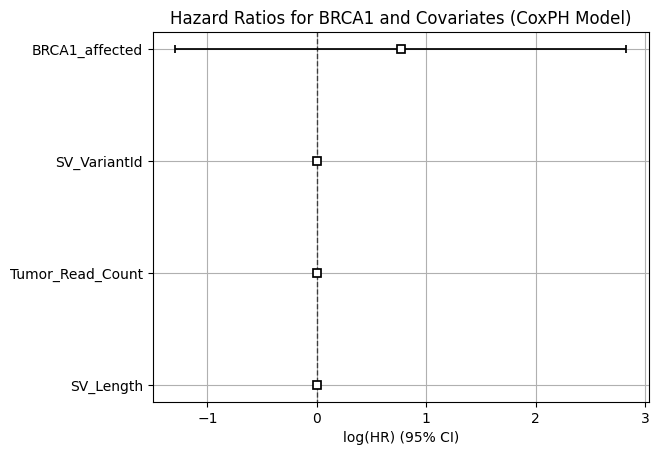

Log-rank test for BRCA1: p-value = 0.7761


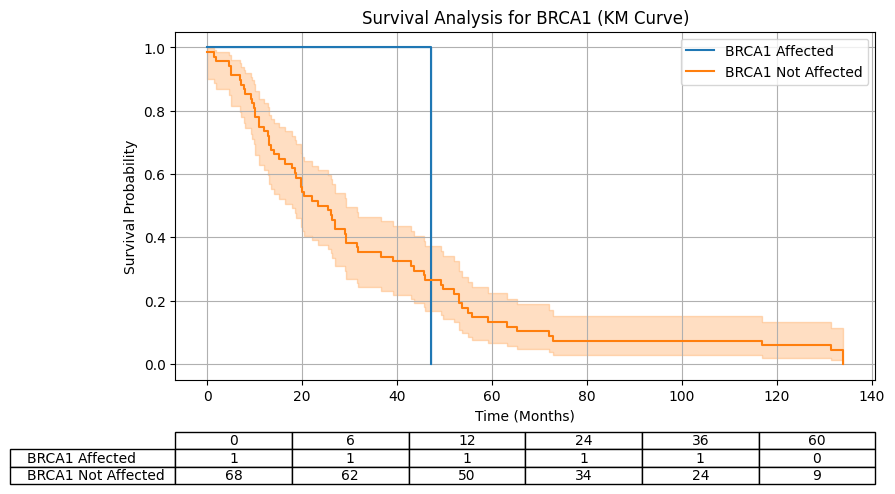

CoxPH Model Summary for FH:


ImportError: Pandas requires version '3.1.2' or newer of 'jinja2' (version '2.11.2' currently installed).

<lifelines.CoxPHFitter: fitted with 69 total observations, 0 right-censored observations>
             duration col = 'Overall Survival (Months) from Dx of Met'
                event col = 'Overall Survival Status'
      baseline estimation = breslow
   number of observations = 69
number of events observed = 69
   partial log-likelihood = -215.54
         time fit was run = 2024-09-28 01:07:52 UTC

---
                  coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                         
FH_affected      -0.83      0.43      1.02           -2.83            1.16                0.06                3.20
SV_Length         0.00      1.00      0.00           -0.00            0.00                1.00                1.00
Tumor_Read_Count  0.00      1.00      0.00           -0.00            0.00                1.00                1.00
SV_VariantId      0.00      1.00      0.00            0.00            0.00                1.00                1.00

                  cmp to     z      p  -log2(p)
covariate                                      
FH_affected         0.00 -0.82   0.41      1.28
SV_Length           0.00  1.29   0.20      2.34
Tumor_Read_Count    0.00  0.50   0.62      0.70
SV_VariantId        0.00  4.05 <0.005     14.28
---
Concordance = 0.68
Partial AIC = 439.08
log-likelihood ratio test = 21.30 on 4 df
-log2(p) of ll-ratio test = 11.82

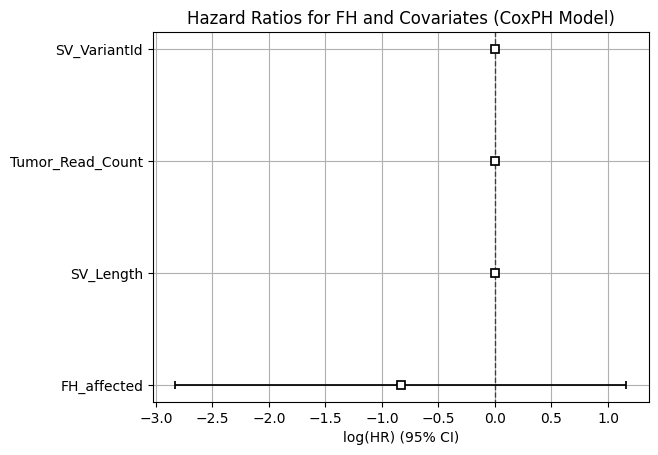

Log-rank test for FH: p-value = 0.6453


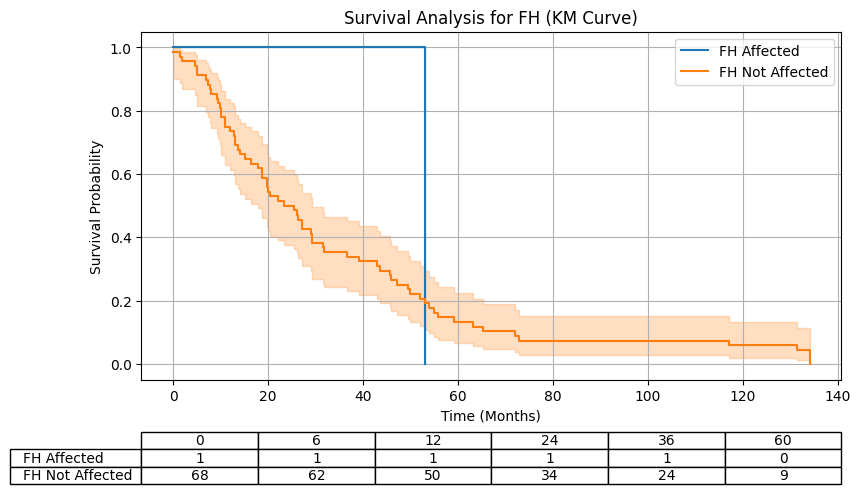

Error fitting CoxPH model for B2M: delta contains nan value(s). Convergence halted. Please see the following tips in the lifelines documentation: https://lifelines.readthedocs.io/en/latest/Examples.html#problems-with-convergence-in-the-cox-proportional-hazard-model


/anaconda/envs/azureml_py38/lib/python3.9/site-packages/lifelines/fitters/coxph_fitter.py:1530: LinAlgWarning: Ill-conditioned matrix (rcond=3.68264e-18): result may not be accurate.
  inv_h_dot_g_T = spsolve(-h, g, assume_a="pos", check_finite=False)
/anaconda/envs/azureml_py38/lib/python3.9/site-packages/lifelines/fitters/coxph_fitter.py:1679: RuntimeWarning: overflow encountered in exp
  scores = weights * exp(dot(X, beta))
/anaconda/envs/azureml_py38/lib/python3.9/site-packages/lifelines/fitters/coxph_fitter.py:1530: LinAlgWarning: Ill-conditioned matrix (rcond=0): result may not be accurate.
  inv_h_dot_g_T = spsolve(-h, g, assume_a="pos", check_finite=False)


Log-rank test for B2M: p-value = 0.0000


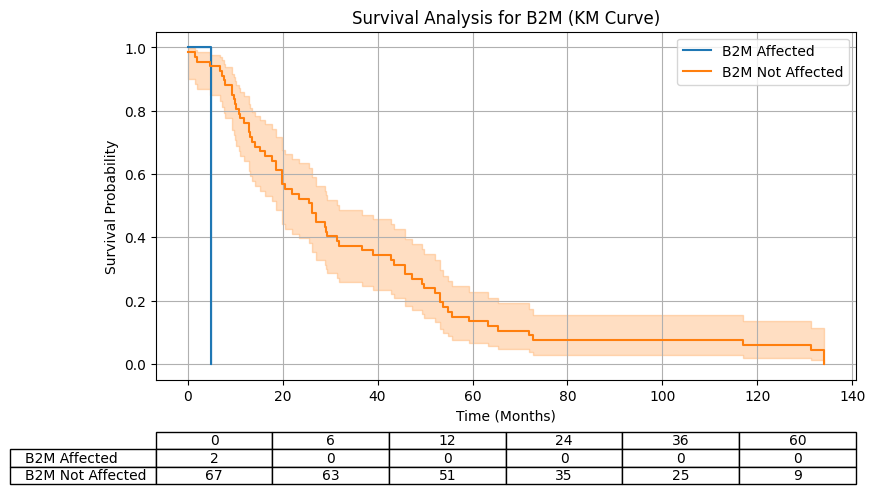

CoxPH Model Summary for SMAD4:


ImportError: Pandas requires version '3.1.2' or newer of 'jinja2' (version '2.11.2' currently installed).

<lifelines.CoxPHFitter: fitted with 69 total observations, 0 right-censored observations>
             duration col = 'Overall Survival (Months) from Dx of Met'
                event col = 'Overall Survival Status'
      baseline estimation = breslow
   number of observations = 69
number of events observed = 69
   partial log-likelihood = -215.98
         time fit was run = 2024-09-28 01:07:53 UTC

---
                  coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                         
SMAD4_affected    0.06      1.06      0.73           -1.36            1.49                0.26                4.42
SV_Length         0.00      1.00      0.00           -0.00            0.00                1.00                1.00
Tumor_Read_Count  0.00      1.00      0.00           -0.00            0.00                1.00                1.00
SV_VariantId      0.00      1.00      0.00            0.00            0.00                1.00                1.00

                  cmp to    z      p  -log2(p)
covariate                                     
SMAD4_affected      0.00 0.08   0.93      0.10
SV_Length           0.00 1.28   0.20      2.33
Tumor_Read_Count    0.00 0.56   0.58      0.80
SV_VariantId        0.00 3.97 <0.005     13.79
---
Concordance = 0.67
Partial AIC = 439.95
log-likelihood ratio test = 20.43 on 4 df
-log2(p) of ll-ratio test = 11.25

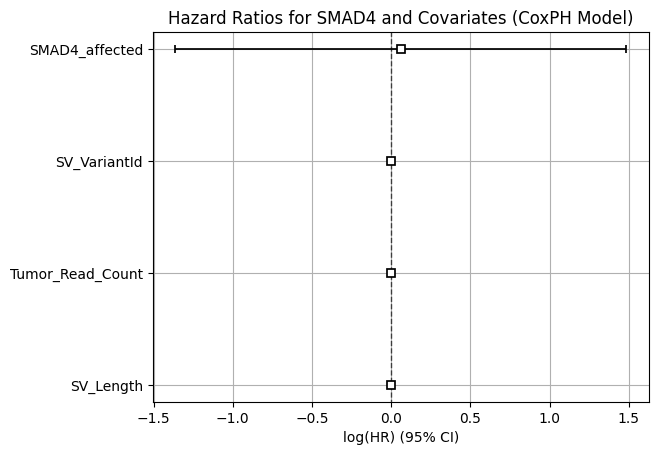

Log-rank test for SMAD4: p-value = 0.7002


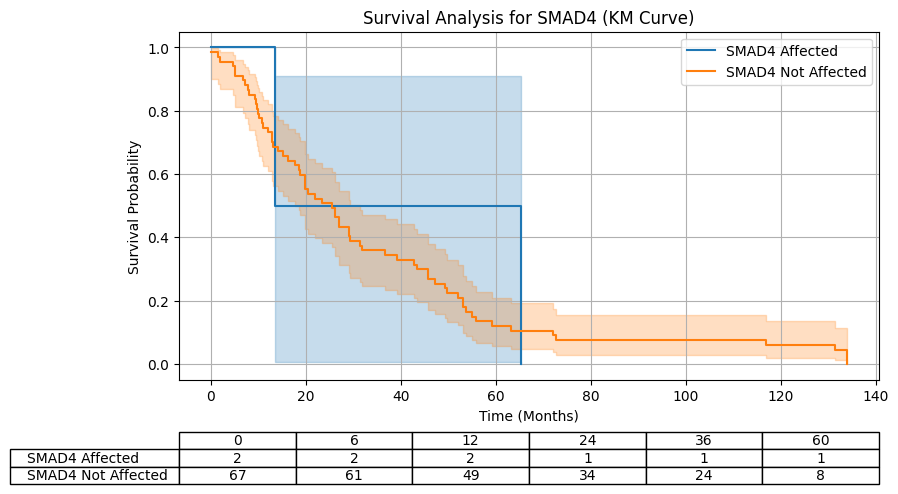

CoxPH Model Summary for PBRM1:


ImportError: Pandas requires version '3.1.2' or newer of 'jinja2' (version '2.11.2' currently installed).

<lifelines.CoxPHFitter: fitted with 69 total observations, 0 right-censored observations>
             duration col = 'Overall Survival (Months) from Dx of Met'
                event col = 'Overall Survival Status'
      baseline estimation = breslow
   number of observations = 69
number of events observed = 69
   partial log-likelihood = -215.98
         time fit was run = 2024-09-28 01:07:53 UTC

---
                  coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                         
PBRM1_affected   -0.09      0.92      1.02           -2.08            1.91                0.13                6.73
SV_Length         0.00      1.00      0.00           -0.00            0.00                1.00                1.00
Tumor_Read_Count  0.00      1.00      0.00           -0.00            0.00                1.00                1.00
SV_VariantId      0.00      1.00      0.00            0.00            0.00                1.00                1.00

                  cmp to     z      p  -log2(p)
covariate                                      
PBRM1_affected      0.00 -0.08   0.93      0.10
SV_Length           0.00  1.27   0.20      2.30
Tumor_Read_Count    0.00  0.56   0.58      0.79
SV_VariantId        0.00  3.97 <0.005     13.76
---
Concordance = 0.67
Partial AIC = 439.95
log-likelihood ratio test = 20.43 on 4 df
-log2(p) of ll-ratio test = 11.25

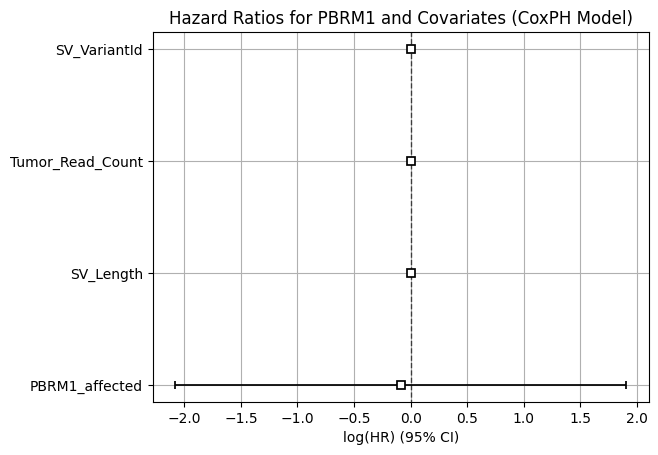

Log-rank test for PBRM1: p-value = 0.8737


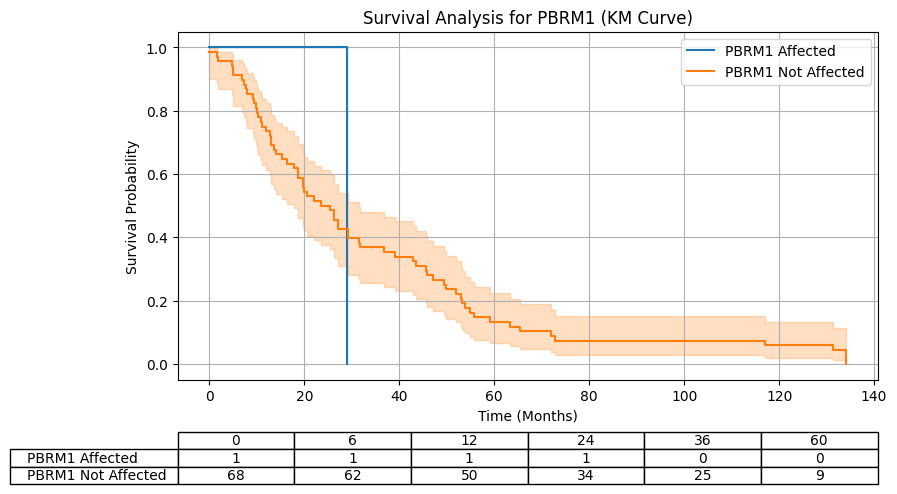

Skipping PTEN - no patients with SV affecting this gene.
Error fitting CoxPH model for STK11: delta contains nan value(s). Convergence halted. Please see the following tips in the lifelines documentation: https://lifelines.readthedocs.io/en/latest/Examples.html#problems-with-convergence-in-the-cox-proportional-hazard-model
Log-rank test for STK11: p-value = 0.0000


/anaconda/envs/azureml_py38/lib/python3.9/site-packages/lifelines/fitters/coxph_fitter.py:1679: RuntimeWarning: overflow encountered in exp
  scores = weights * exp(dot(X, beta))
/anaconda/envs/azureml_py38/lib/python3.9/site-packages/lifelines/fitters/coxph_fitter.py:1530: LinAlgWarning: Ill-conditioned matrix (rcond=0): result may not be accurate.
  inv_h_dot_g_T = spsolve(-h, g, assume_a="pos", check_finite=False)


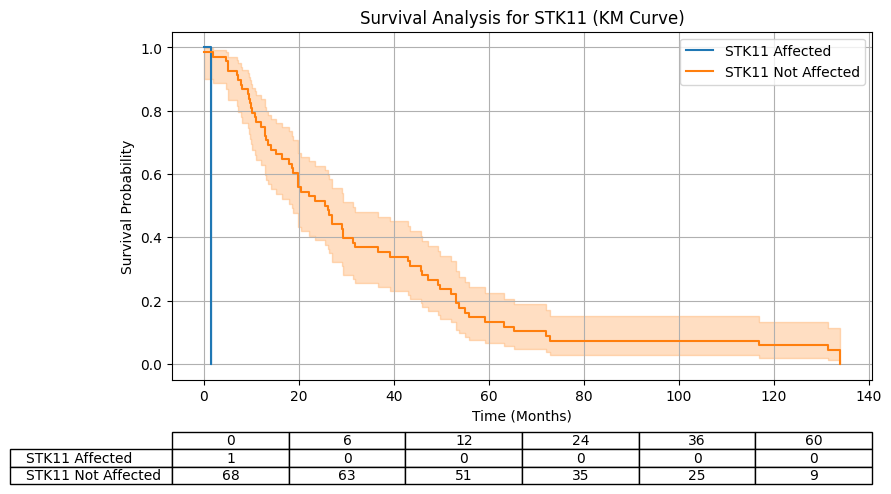

Skipping MGA - no patients with SV affecting this gene.
CoxPH Model Summary for TP53:


ImportError: Pandas requires version '3.1.2' or newer of 'jinja2' (version '2.11.2' currently installed).

<lifelines.CoxPHFitter: fitted with 69 total observations, 0 right-censored observations>
             duration col = 'Overall Survival (Months) from Dx of Met'
                event col = 'Overall Survival Status'
      baseline estimation = breslow
   number of observations = 69
number of events observed = 69
   partial log-likelihood = -215.73
         time fit was run = 2024-09-28 01:07:54 UTC

---
                  coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                         
TP53_affected     0.39      1.48      0.53           -0.64            1.43                0.53                4.17
SV_Length         0.00      1.00      0.00           -0.00            0.00                1.00                1.00
Tumor_Read_Count  0.00      1.00      0.00           -0.00            0.00                1.00                1.00
SV_VariantId      0.00      1.00      0.00            0.00            0.00                1.00                1.00

                  cmp to    z      p  -log2(p)
covariate                                     
TP53_affected       0.00 0.74   0.46      1.13
SV_Length           0.00 1.31   0.19      2.40
Tumor_Read_Count    0.00 0.59   0.56      0.84
SV_VariantId        0.00 3.98 <0.005     13.81
---
Concordance = 0.67
Partial AIC = 439.46
log-likelihood ratio test = 20.92 on 4 df
-log2(p) of ll-ratio test = 11.57

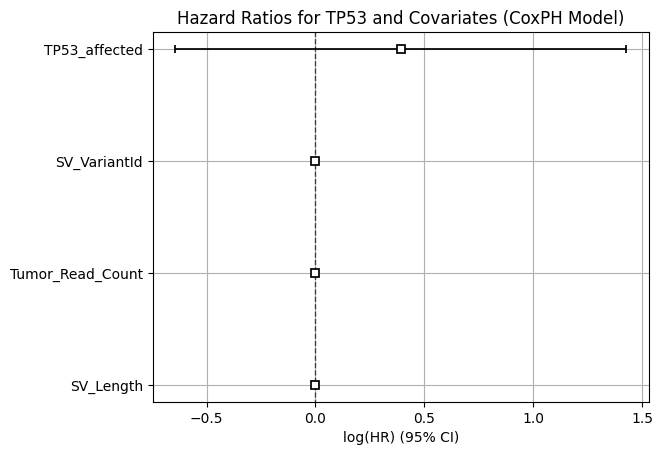

Log-rank test for TP53: p-value = 0.6646


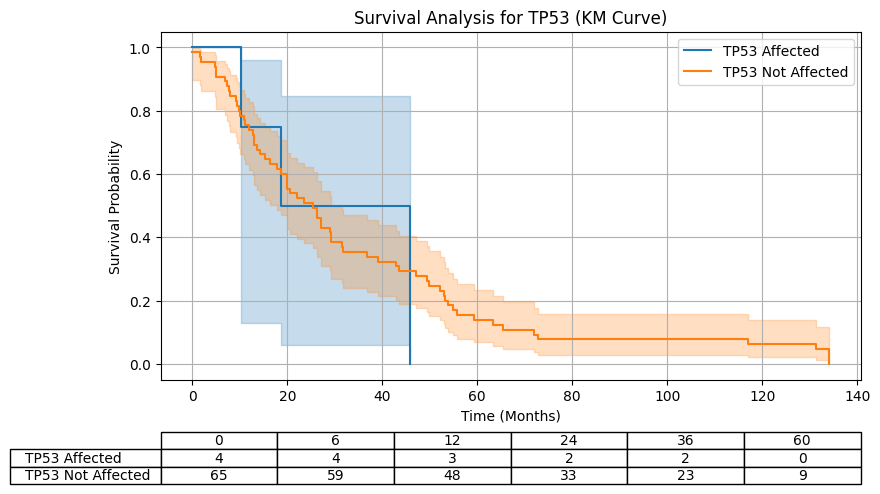

CoxPH Model Summary for APC:


ImportError: Pandas requires version '3.1.2' or newer of 'jinja2' (version '2.11.2' currently installed).

<lifelines.CoxPHFitter: fitted with 69 total observations, 0 right-censored observations>
             duration col = 'Overall Survival (Months) from Dx of Met'
                event col = 'Overall Survival Status'
      baseline estimation = breslow
   number of observations = 69
number of events observed = 69
   partial log-likelihood = -215.16
         time fit was run = 2024-09-28 01:07:54 UTC

---
                  coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                         
APC_affected     -0.84      0.43      0.74           -2.29            0.61                0.10                1.84
SV_Length         0.00      1.00      0.00           -0.00            0.00                1.00                1.00
Tumor_Read_Count  0.00      1.00      0.00           -0.00            0.00                1.00                1.00
SV_VariantId      0.00      1.00      0.00            0.00            0.00                1.00                1.00

                  cmp to     z      p  -log2(p)
covariate                                      
APC_affected        0.00 -1.14   0.26      1.97
SV_Length           0.00  1.27   0.21      2.28
Tumor_Read_Count    0.00  0.50   0.62      0.69
SV_VariantId        0.00  4.05 <0.005     14.26
---
Concordance = 0.68
Partial AIC = 438.31
log-likelihood ratio test = 22.07 on 4 df
-log2(p) of ll-ratio test = 12.33

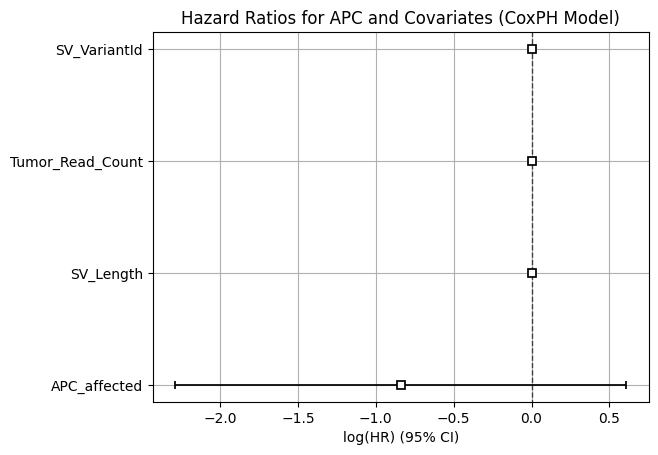

Log-rank test for APC: p-value = 0.3577


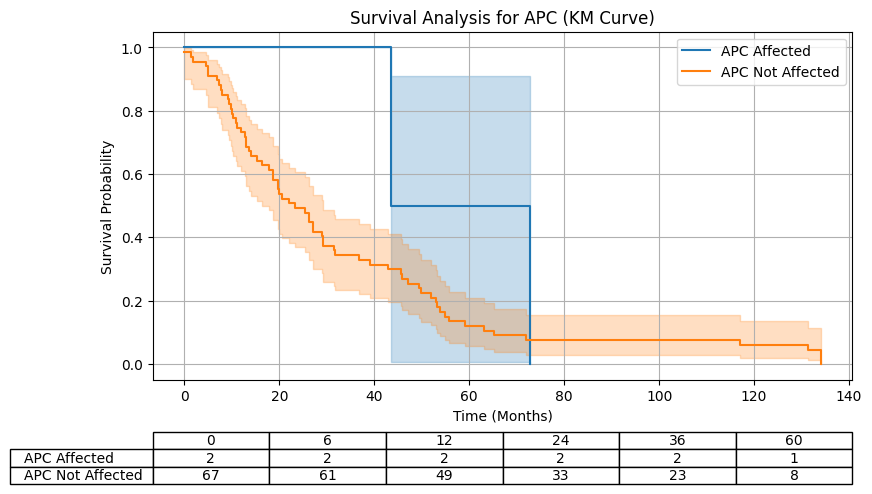

CoxPH Model Summary for PARK2:


ImportError: Pandas requires version '3.1.2' or newer of 'jinja2' (version '2.11.2' currently installed).

<lifelines.CoxPHFitter: fitted with 69 total observations, 0 right-censored observations>
             duration col = 'Overall Survival (Months) from Dx of Met'
                event col = 'Overall Survival Status'
      baseline estimation = breslow
   number of observations = 69
number of events observed = 69
   partial log-likelihood = -215.94
         time fit was run = 2024-09-28 01:07:55 UTC

---
                  coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                         
PARK2_affected   -0.20      0.82      0.73           -1.62            1.23                0.20                3.42
SV_Length         0.00      1.00      0.00           -0.00            0.00                1.00                1.00
Tumor_Read_Count  0.00      1.00      0.00           -0.00            0.00                1.00                1.00
SV_VariantId      0.00      1.00      0.00            0.00            0.00                1.00                1.00

                  cmp to     z      p  -log2(p)
covariate                                      
PARK2_affected      0.00 -0.27   0.79      0.34
SV_Length           0.00  1.27   0.20      2.30
Tumor_Read_Count    0.00  0.54   0.59      0.77
SV_VariantId        0.00  3.91 <0.005     13.42
---
Concordance = 0.67
Partial AIC = 439.88
log-likelihood ratio test = 20.50 on 4 df
-log2(p) of ll-ratio test = 11.29

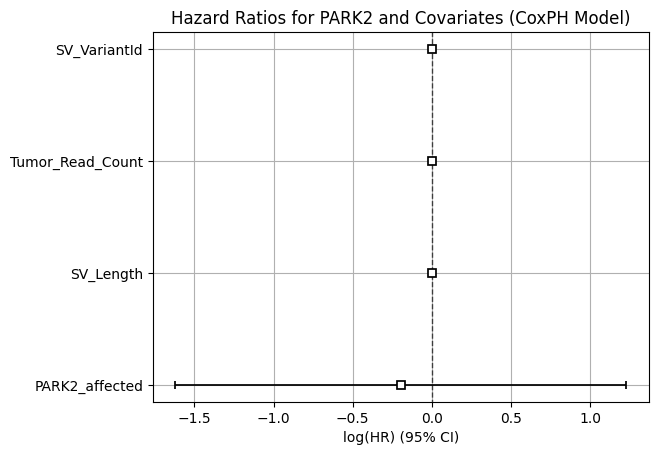

Log-rank test for PARK2: p-value = 0.4193


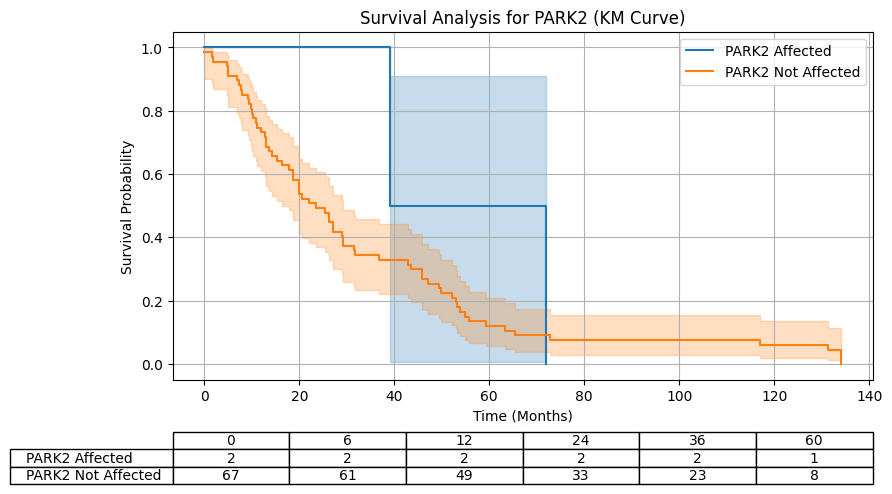

Skipping ARID1A - no patients with SV affecting this gene.
Skipping NF1 - no patients with SV affecting this gene.
CoxPH Model Summary for CTNNB1:


ImportError: Pandas requires version '3.1.2' or newer of 'jinja2' (version '2.11.2' currently installed).

<lifelines.CoxPHFitter: fitted with 69 total observations, 0 right-censored observations>
             duration col = 'Overall Survival (Months) from Dx of Met'
                event col = 'Overall Survival Status'
      baseline estimation = breslow
   number of observations = 69
number of events observed = 69
   partial log-likelihood = -215.77
         time fit was run = 2024-09-28 01:07:55 UTC

---
                  coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                         
CTNNB1_affected   0.29      1.34      0.44           -0.56            1.15                0.57                3.15
SV_Length         0.00      1.00      0.00           -0.00            0.00                1.00                1.00
Tumor_Read_Count  0.00      1.00      0.00           -0.00            0.00                1.00                1.00
SV_VariantId      0.00      1.00      0.00            0.00            0.00                1.00                1.00

                  cmp to    z      p  -log2(p)
covariate                                     
CTNNB1_affected     0.00 0.67   0.50      0.99
SV_Length           0.00 1.31   0.19      2.40
Tumor_Read_Count    0.00 0.59   0.56      0.85
SV_VariantId        0.00 3.94 <0.005     13.59
---
Concordance = 0.67
Partial AIC = 439.54
log-likelihood ratio test = 20.84 on 4 df
-log2(p) of ll-ratio test = 11.52

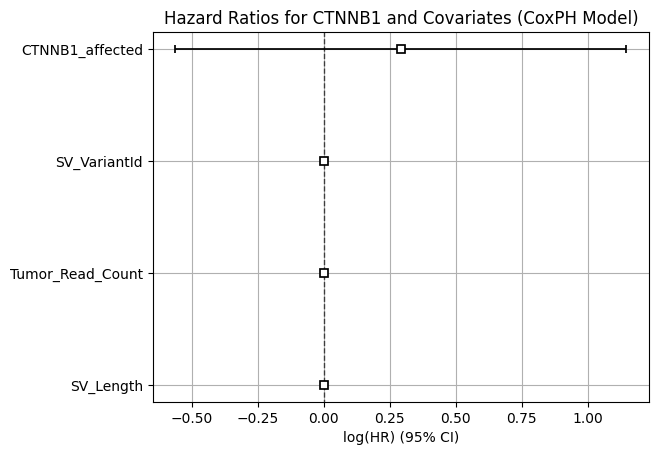

Log-rank test for CTNNB1: p-value = 0.5151


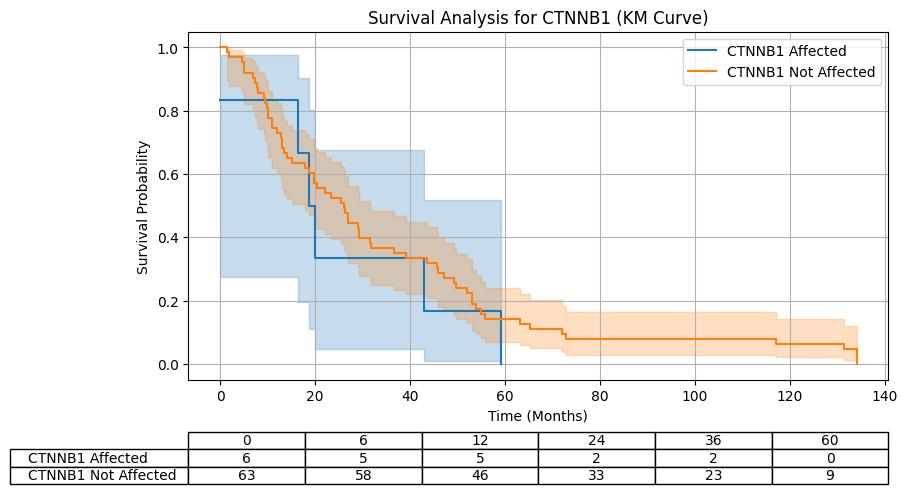

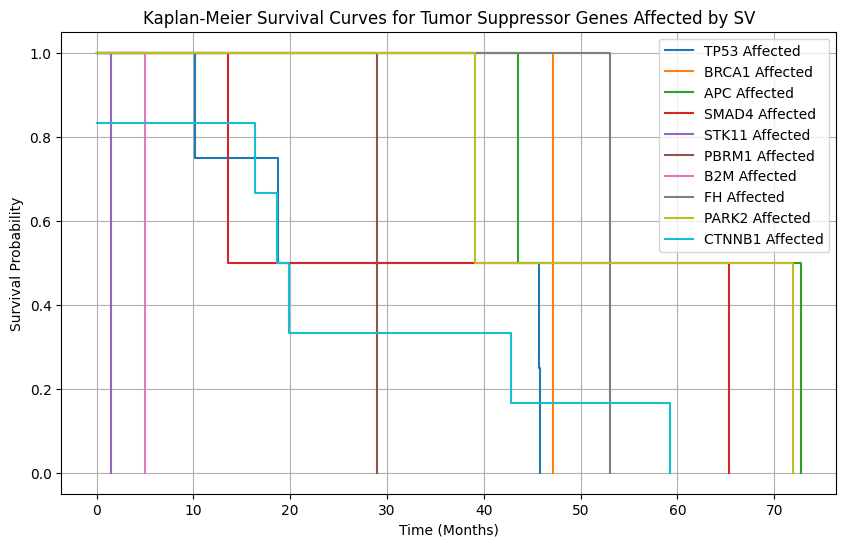

In [32]:
import pandas as pd
from lifelines import KaplanMeierFitter, CoxPHFitter
import matplotlib.pyplot as plt

# Define the tumor suppressor genes you identified
tumor_suppressor_genes_in_sv = ['BRCA1', 'FH', 'B2M', 'SMAD4', 'PBRM1', 'PTEN', 'STK11', 'MGA', 
                                'TP53', 'APC', 'PARK2', 'ARID1A', 'NF1', 'CTNNB1']

# Merge the clinical and SV data
merged_data = pd.merge(clinical_data, sv_data, left_on='Sample ID', right_on='Sample_Id', how='inner')

# Ensure survival columns are numeric and drop NaNs
merged_data = merged_data.dropna(subset=['Overall Survival (Months) from Dx of Met', 'Overall Survival Status'])
merged_data['Overall Survival (Months) from Dx of Met'] = pd.to_numeric(merged_data['Overall Survival (Months) from Dx of Met'], errors='coerce')
merged_data['Overall Survival Status'] = pd.to_numeric(merged_data['Overall Survival Status'], errors='coerce')

# Define the covariates you want to include in the CoxPH model
covariates = ['SV_Length', 'Tumor_Read_Count', 'SV_VariantId']

# Check for NaN values in covariates
print("NaN values in covariates:")
print(merged_data[covariates].isnull().sum())

# Remove rows with NaN values in covariates
merged_data_cleaned = merged_data.dropna(subset=covariates)

# Check for constant columns
print("Number of unique values in covariates:")
print(merged_data_cleaned[covariates].nunique())

# Check for multicollinearity using a correlation matrix
corr_matrix = merged_data_cleaned[covariates].corr()
print("Correlation matrix:")
print(corr_matrix)

# Initialize Kaplan-Meier fitter
kmf = KaplanMeierFitter()

# Initialize CoxPH model
coxph = CoxPHFitter()

# Define time points for the at-risk table (in months)
time_points = [0, 6, 12, 24, 36, 60]

# Perform CoxPH and Kaplan-Meier survival analysis for each tumor suppressor gene
for gene in tumor_suppressor_genes_in_sv:
    # Create binary column indicating whether the gene is affected by SV
    gene_affected = (merged_data_cleaned['Site1_Hugo_Symbol'] == gene) | (merged_data_cleaned['Site2_Hugo_Symbol'] == gene)
    
    # Ensure that the gene has at least one affected patient
    if gene_affected.sum() == 0:
        print(f"Skipping {gene} - no patients with SV affecting this gene.")
        continue
    
    # Split the data into two groups: gene affected and gene not affected
    high_gene = gene_affected
    low_gene = ~gene_affected
    
    # Ensure that both groups have patients
    if merged_data_cleaned[high_gene].empty or merged_data_cleaned[low_gene].empty:
        print(f"Skipping {gene} - insufficient data for comparison.")
        continue
    
    # --- Cox Proportional Hazards Model ---
    # Add the binary indicator for the gene and the covariates
    merged_data_cleaned[f'{gene}_affected'] = gene_affected.astype(int)
    
    try:
        # Fit the CoxPH model with covariates and the gene-affected binary variable
        coxph.fit(merged_data_cleaned[['Overall Survival (Months) from Dx of Met', 'Overall Survival Status', f'{gene}_affected'] + covariates],
                  duration_col='Overall Survival (Months) from Dx of Met', 
                  event_col='Overall Survival Status')
        
        # Print the CoxPH summary
        print(f"CoxPH Model Summary for {gene}:")
        coxph.print_summary()

        # Plot the CoxPH hazard ratios
        coxph.plot()

        # Customize the CoxPH plot
        plt.title(f'Hazard Ratios for {gene} and Covariates (CoxPH Model)')
        plt.grid(True)
        plt.show()
        
    except Exception as e:
        print(f"Error fitting CoxPH model for {gene}: {e}")
    
    # --- Kaplan-Meier Plot ---
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Fit KM model for patients with the gene affected by SV
    kmf.fit(merged_data_cleaned[high_gene]['Overall Survival (Months) from Dx of Met'], 
            event_observed=merged_data_cleaned[high_gene]['Overall Survival Status'], label=f'{gene} Affected')
    kmf.plot_survival_function(ax=ax)
    
    # Fit KM model for patients without the gene affected by SV
    kmf.fit(merged_data_cleaned[low_gene]['Overall Survival (Months) from Dx of Met'], 
            event_observed=merged_data_cleaned[low_gene]['Overall Survival Status'], label=f'{gene} Not Affected')
    kmf.plot_survival_function(ax=ax)
    
    # Perform log-rank test
    logrank_result = logrank_test(
        merged_data[high_gene]['Overall Survival (Months) from Dx of Met'],
        merged_data[low_gene]['Overall Survival (Months) from Dx of Met'],
        event_observed_A=merged_data[high_gene]['Overall Survival Status'],
        event_observed_B=merged_data[low_gene]['Overall Survival Status']
    )
    
    # Show log-rank test result
    print(f"Log-rank test for {gene}: p-value = {logrank_result.p_value:.4f}")
    
    # --- Manually create the table showing the number of patients alive at time points ---
    # Calculate the number of patients at risk at each time point for the affected and non-affected group
    n_at_risk_affected = [sum(merged_data_cleaned[high_gene]['Overall Survival (Months) from Dx of Met'] >= t) for t in time_points]
    n_at_risk_not_affected = [sum(merged_data_cleaned[low_gene]['Overall Survival (Months) from Dx of Met'] >= t) for t in time_points]

    # Create the table below the plot
    table_data = [n_at_risk_affected, n_at_risk_not_affected]
    row_labels = [f'{gene} Affected', f'{gene} Not Affected']

    # Add the table to the plot
    plt.table(cellText=table_data, 
              colLabels=time_points, 
              rowLabels=row_labels, 
              cellLoc='center', 
              loc='bottom', 
              bbox=[0, -0.3, 1, 0.15])

    # Adjust layout to make space for the table
    plt.subplots_adjust(left=0.2, bottom=0.3)

    # Customize the KM plot
    plt.title(f'Survival Analysis for {gene} (KM Curve)')
    plt.xlabel('Time (Months)')
    plt.ylabel('Survival Probability')
    plt.legend()
    plt.grid(True)

    # Show the plot
    plt.show()
    
# Initialize the Kaplan-Meier fitter
kmf = KaplanMeierFitter()

# Plotting setup
plt.figure(figsize=(10, 6))

# Loop through each gene and plot
for gene in tumor_suppressor_genes:
    # Create a binary column for each gene indicating if it's affected by SV
    merged_data[f'{gene}_affected'] = ((merged_data['Site1_Hugo_Symbol'] == gene) | (merged_data['Site2_Hugo_Symbol'] == gene)).astype(int)
    
    # Fit the KM model for patients affected by each gene
    affected_mask = merged_data[f'{gene}_affected'] == 1
    if affected_mask.any():  # Check if there are any patients affected by the gene
        kmf.fit(
            merged_data.loc[affected_mask, 'Overall Survival (Months) from Dx of Met'],
            event_observed=merged_data.loc[affected_mask, 'Overall Survival Status'],
            label=f'{gene} Affected'
        )
        kmf.plot_survival_function(ci_show=False)

# Customize the plot
plt.title('Kaplan-Meier Survival Curves for Tumor Suppressor Genes Affected by SV')
plt.xlabel('Time (Months)')
plt.ylabel('Survival Probability')
plt.legend(loc='best')
plt.grid(True)

# Show the combined plot
plt.show()



ImportError: Pandas requires version '3.1.2' or newer of 'jinja2' (version '2.11.2' currently installed).

<lifelines.CoxPHFitter: fitted with 69 total observations, 0 right-censored observations>
             duration col = 'Overall Survival (Months) from Dx of Met'
                event col = 'Overall Survival Status'
      baseline estimation = breslow
   number of observations = 69
number of events observed = 69
   partial log-likelihood = -218.86
         time fit was run = 2024-09-28 01:17:36 UTC

---
                     coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                            
Class_DUPLICATION    0.48      1.61      0.37           -0.24            1.20                0.78                3.30
Class_INVERSION      0.51      1.66      0.37           -0.22            1.23                0.80                3.42
Class_TRANSLOCATION -0.42      0.66      0.40           -1.20            0.37                0.30                1.44
age                 -0.04      0.96      0.01           -0.07           -0.01                0.93                0.99
gender              -0.31      0.74      0.26           -0.81            0.20                0.44                1.23

                     cmp to     z      p  -log2(p)
covariate                                         
Class_DUPLICATION      0.00  1.29   0.20      2.35
Class_INVERSION        0.00  1.37   0.17      2.55
Class_TRANSLOCATION    0.00 -1.04   0.30      1.75
age                    0.00 -2.90 <0.005      8.08
gender                 0.00 -1.18   0.24      2.06
---
Concordance = 0.62
Partial AIC = 447.73
log-likelihood ratio test = 14.66 on 5 df
-log2(p) of ll-ratio test = 6.39

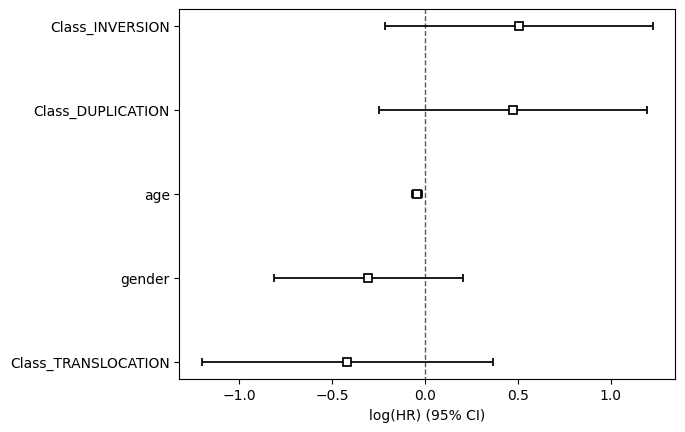

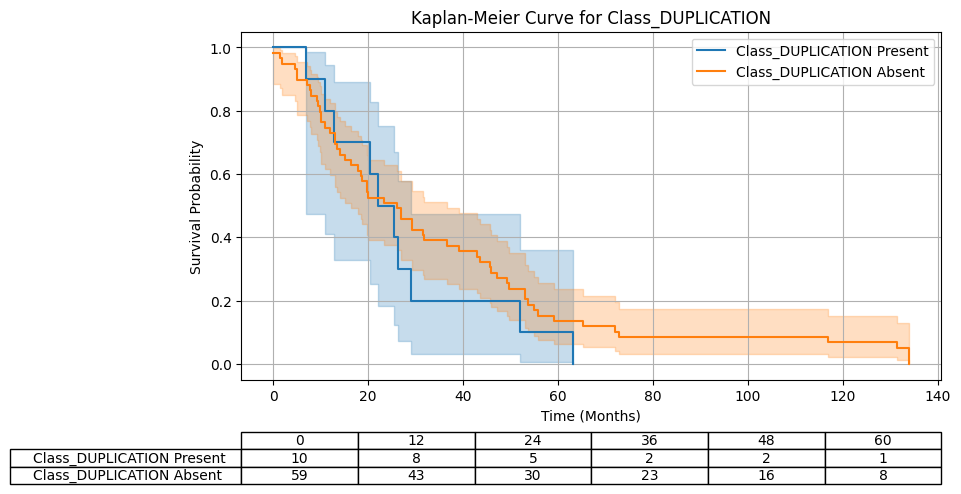

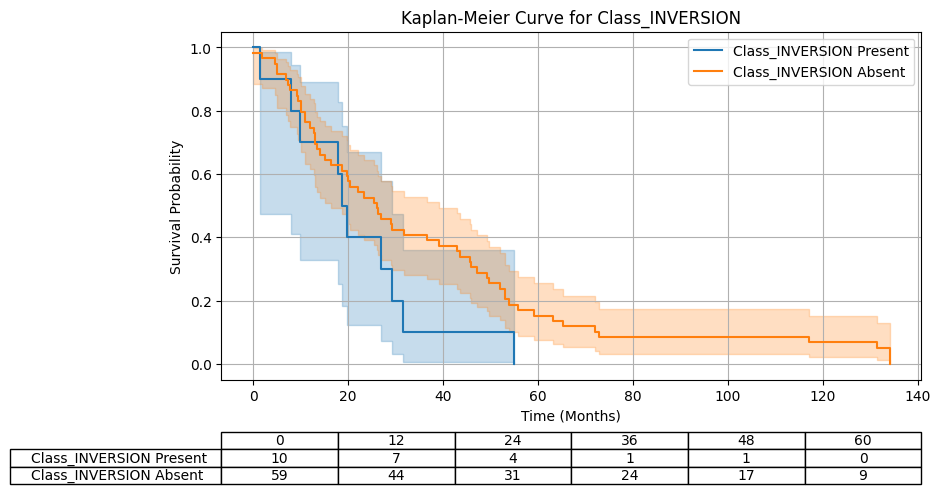

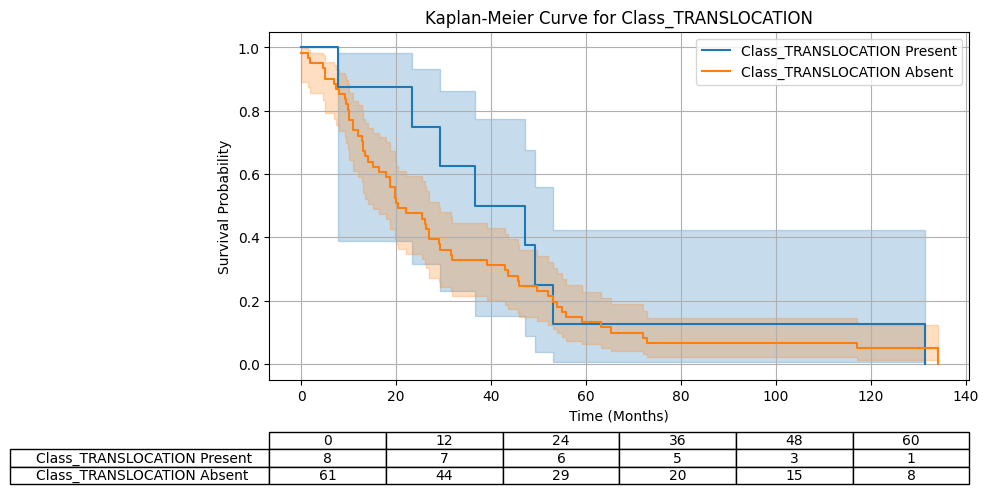

In [36]:
import pandas as pd
from lifelines import CoxPHFitter

# Load the merged clinical and SV data (ensure the data is prepared and cleaned)
merged_data = pd.merge(clinical_data, sv_data, left_on='Sample ID', right_on='Sample_Id', how='inner')

# Ensure survival columns are numeric
merged_data['Overall Survival (Months) from Dx of Met'] = pd.to_numeric(merged_data['Overall Survival (Months) from Dx of Met'], errors='coerce')
merged_data['Overall Survival Status'] = pd.to_numeric(merged_data['Overall Survival Status'], errors='coerce')

# One-hot encode the 'Class' column from SV data (e.g., DUPLICATION, INVERSION, TRANSLOCATION)
sv_data_encoded = pd.get_dummies(merged_data['Class'], prefix='Class', drop_first=True)

# Merge the one-hot encoded columns back into the main dataframe
merged_data = pd.concat([merged_data, sv_data_encoded], axis=1)

# Define clinical covariates if available (replace with actual column names)
# For example, age and gender are commonly used in survival models
# Ensure that these columns are numeric and have no missing values
merged_data['age'] = pd.to_numeric(merged_data['Age at Diagnosis'], errors='coerce')
merged_data['gender'] = merged_data['Sex'].map({'Male': 1, 'Female': 0})  # Assuming gender is stored as "Male" and "Female"

# Drop rows with missing data in important columns
cleaned_data = merged_data.dropna(subset=['Overall Survival (Months) from Dx of Met', 'Overall Survival Status', 
                                          'Class_DUPLICATION', 'Class_INVERSION', 'Class_TRANSLOCATION', 'age', 'gender'])

# Initialize the CoxPH model
coxph = CoxPHFitter()

# Fit the CoxPH model using the SV class covariates and clinical covariates
coxph.fit(cleaned_data[['Overall Survival (Months) from Dx of Met', 'Overall Survival Status', 
                        'Class_DUPLICATION', 'Class_INVERSION', 'Class_TRANSLOCATION', 'age', 'gender']], 
          duration_col='Overall Survival (Months) from Dx of Met', 
          event_col='Overall Survival Status')

# Print the summary of the CoxPH model
coxph.print_summary()

# Optionally, plot the hazard ratios
coxph.plot()


# Define the survival columns
duration_col = 'Overall Survival (Months) from Dx of Met'
event_col = 'Overall Survival Status'

# Time points at which we want to calculate the number of patients alive
time_points = [0, 12, 24, 36, 48, 60]  # e.g., 0, 12, 24, 36, 48, 60 months

# Function to calculate the number of patients alive at specific time points
def get_patients_at_risk(data, time_points, duration_col):
    return [sum(data[duration_col] >= t) for t in time_points]

# 1. Kaplan-Meier Plot for 'Class_DUPLICATION'
plt.figure(figsize=(10, 6))

kmf = KaplanMeierFitter()

# Plot for Class_DUPLICATION Present
kmf.fit(cleaned_data[cleaned_data['Class_DUPLICATION'] == 1][duration_col], 
        event_observed=cleaned_data[cleaned_data['Class_DUPLICATION'] == 1][event_col], 
        label='Class_DUPLICATION Present')
ax = kmf.plot_survival_function()

# Plot for Class_DUPLICATION Absent
kmf.fit(cleaned_data[cleaned_data['Class_DUPLICATION'] == 0][duration_col], 
        event_observed=cleaned_data[cleaned_data['Class_DUPLICATION'] == 0][event_col], 
        label='Class_DUPLICATION Absent')
kmf.plot_survival_function(ax=ax)

# Calculate number of patients alive at each time point
n_at_risk_dup_present = get_patients_at_risk(cleaned_data[cleaned_data['Class_DUPLICATION'] == 1], time_points, duration_col)
n_at_risk_dup_absent = get_patients_at_risk(cleaned_data[cleaned_data['Class_DUPLICATION'] == 0], time_points, duration_col)

# Create the table
table_data = [n_at_risk_dup_present, n_at_risk_dup_absent]
row_labels = ['Class_DUPLICATION Present', 'Class_DUPLICATION Absent']

plt.table(cellText=table_data, 
          colLabels=time_points, 
          rowLabels=row_labels, 
          cellLoc='center', 
          loc='bottom', 
          bbox=[0, -0.3, 1, 0.15])

# Adjust layout to make space for the table
plt.subplots_adjust(left=0.2, bottom=0.3)

# Customize the KM plot
plt.title('Kaplan-Meier Curve for Class_DUPLICATION')
plt.xlabel('Time (Months)')
plt.ylabel('Survival Probability')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

# 2. Kaplan-Meier Plot for 'Class_INVERSION'
plt.figure(figsize=(10, 6))

# Plot for Class_INVERSION Present
kmf.fit(cleaned_data[cleaned_data['Class_INVERSION'] == 1][duration_col], 
        event_observed=cleaned_data[cleaned_data['Class_INVERSION'] == 1][event_col], 
        label='Class_INVERSION Present')
ax = kmf.plot_survival_function()

# Plot for Class_INVERSION Absent
kmf.fit(cleaned_data[cleaned_data['Class_INVERSION'] == 0][duration_col], 
        event_observed=cleaned_data[cleaned_data['Class_INVERSION'] == 0][event_col], 
        label='Class_INVERSION Absent')
kmf.plot_survival_function(ax=ax)

# Calculate number of patients alive at each time point
n_at_risk_inv_present = get_patients_at_risk(cleaned_data[cleaned_data['Class_INVERSION'] == 1], time_points, duration_col)
n_at_risk_inv_absent = get_patients_at_risk(cleaned_data[cleaned_data['Class_INVERSION'] == 0], time_points, duration_col)

# Create the table
table_data = [n_at_risk_inv_present, n_at_risk_inv_absent]
row_labels = ['Class_INVERSION Present', 'Class_INVERSION Absent']

plt.table(cellText=table_data, 
          colLabels=time_points, 
          rowLabels=row_labels, 
          cellLoc='center', 
          loc='bottom', 
          bbox=[0, -0.3, 1, 0.15])

# Adjust layout to make space for the table
plt.subplots_adjust(left=0.2, bottom=0.3)

# Customize the KM plot
plt.title('Kaplan-Meier Curve for Class_INVERSION')
plt.xlabel('Time (Months)')
plt.ylabel('Survival Probability')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

# 3. Kaplan-Meier Plot for 'Class_TRANSLOCATION'
plt.figure(figsize=(10, 6))

# Plot for Class_TRANSLOCATION Present
kmf.fit(cleaned_data[cleaned_data['Class_TRANSLOCATION'] == 1][duration_col], 
        event_observed=cleaned_data[cleaned_data['Class_TRANSLOCATION'] == 1][event_col], 
        label='Class_TRANSLOCATION Present')
ax = kmf.plot_survival_function()

# Plot for Class_TRANSLOCATION Absent
kmf.fit(cleaned_data[cleaned_data['Class_TRANSLOCATION'] == 0][duration_col], 
        event_observed=cleaned_data[cleaned_data['Class_TRANSLOCATION'] == 0][event_col], 
        label='Class_TRANSLOCATION Absent')
kmf.plot_survival_function(ax=ax)

# Calculate number of patients alive at each time point
n_at_risk_trans_present = get_patients_at_risk(cleaned_data[cleaned_data['Class_TRANSLOCATION'] == 1], time_points, duration_col)
n_at_risk_trans_absent = get_patients_at_risk(cleaned_data[cleaned_data['Class_TRANSLOCATION'] == 0], time_points, duration_col)

# Create the table
table_data = [n_at_risk_trans_present, n_at_risk_trans_absent]
row_labels = ['Class_TRANSLOCATION Present', 'Class_TRANSLOCATION Absent']

plt.table(cellText=table_data, 
          colLabels=time_points, 
          rowLabels=row_labels, 
          cellLoc='center', 
          loc='bottom', 
          bbox=[0, -0.3, 1, 0.15])

# Adjust layout to make space for the table
plt.subplots_adjust(left=0.2, bottom=0.3)

# Customize the KM plot
plt.title('Kaplan-Meier Curve for Class_TRANSLOCATION')
plt.xlabel('Time (Months)')
plt.ylabel('Survival Probability')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()




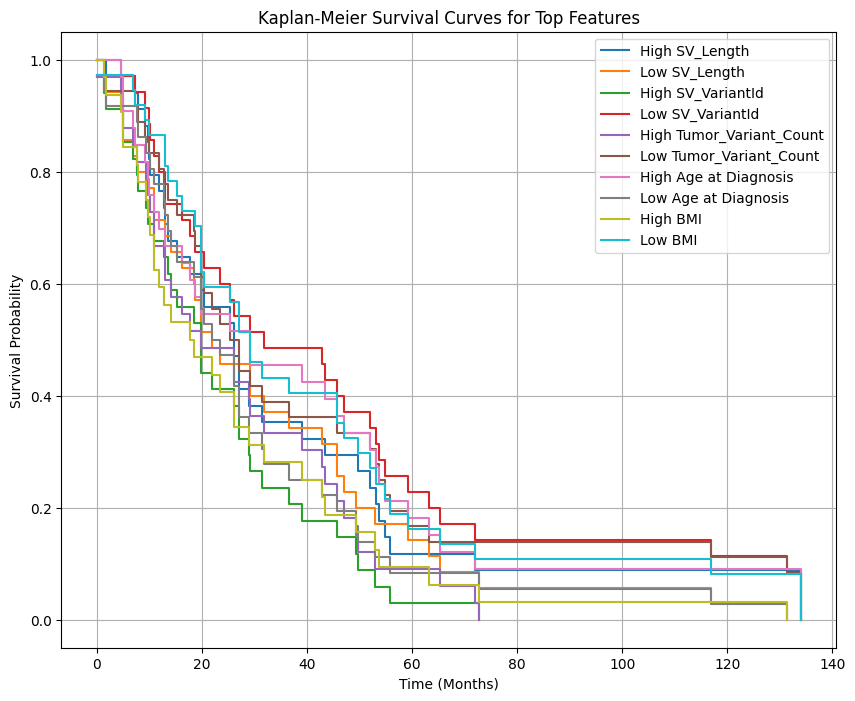

In [8]:
import pandas as pd
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

# Load the merged clinical and SV data
merged_data = pd.merge(clinical_data, sv_data, left_on='Sample ID', right_on='Sample_Id', how='inner')

# Ensure survival columns are numeric
merged_data['Overall Survival (Months) from Dx of Met'] = pd.to_numeric(merged_data['Overall Survival (Months) from Dx of Met'], errors='coerce')
merged_data['Overall Survival Status'] = pd.to_numeric(merged_data['Overall Survival Status'], errors='coerce')

# Define the top features you want to use (replace with your top features)
top_features = ['SV_Length', 'SV_VariantId', 'Tumor_Variant_Count','Age at Diagnosis','BMI']

# Drop rows with missing data in important columns
cleaned_data = merged_data.dropna(subset=['Overall Survival (Months) from Dx of Met', 'Overall Survival Status'] + top_features)

# Initialize Kaplan-Meier fitter
kmf = KaplanMeierFitter()

# Set up the plot for multiple features
plt.figure(figsize=(10, 8))

# Plot Kaplan-Meier curves for each feature
for feature in top_features:
    # Stratify based on the median of each feature
    high_group = cleaned_data[feature] > cleaned_data[feature].median()
    low_group = ~high_group
    
    # Fit Kaplan-Meier for the high group
    kmf.fit(cleaned_data[high_group]['Overall Survival (Months) from Dx of Met'], 
            event_observed=cleaned_data[high_group]['Overall Survival Status'], label=f'High {feature}')
    ax = kmf.plot_survival_function(ci_show=False)  # Plot without confidence interval
    
    # Fit Kaplan-Meier for the low group
    kmf.fit(cleaned_data[low_group]['Overall Survival (Months) from Dx of Met'], 
            event_observed=cleaned_data[low_group]['Overall Survival Status'], label=f'Low {feature}')
    kmf.plot_survival_function(ax=ax, ci_show=False)  # Plot without confidence interval

# Customize the plot
plt.title('Kaplan-Meier Survival Curves for Top Features')
plt.xlabel('Time (Months)')
plt.ylabel('Survival Probability')
plt.legend(loc='best')
plt.grid(True)

# Show the plot
plt.show()


In [1]:
#############CLINICAL+MUTATIONS

# DATA CLEANING
import pandas as pd

# Load the mutation data
mutation_data = pd.read_csv('data_mutations.txt', sep='\t')

# Load the clinical data (adjust the path accordingly)
clinical_data = pd.read_csv('crc_eo_2020_clinical_data.tsv', sep='\t')

# Display the first few rows of mutation data to inspect it
print("Mutation Data Sample:")
print(mutation_data.head())

# Display the first few rows of clinical data to inspect it
print("Clinical Data Sample:")
print(clinical_data.head())


/tmp/ipykernel_4298/1772318386.py:7: DtypeWarning: Columns (44) have mixed types. Specify dtype option on import or set low_memory=False.
  mutation_data = pd.read_csv('data_mutations.txt', sep='\t')


Mutation Data Sample:
  Hugo_Symbol  Entrez_Gene_Id Center NCBI_Build Chromosome  Start_Position  \
0        TP53            7157  MSKCC     GRCh37         17         7578280   
1       ERBB2            2064  MSKCC     GRCh37         17        37881332   
2         APC             324  MSKCC     GRCh37          5       112175760   
3       EPHA3            2042  MSKCC     GRCh37          3        89259335   
4       NTRK1            4914  MSKCC     GRCh37          1       156843614   

   End_Position Strand         Consequence Variant_Classification  ...  \
0       7578280      +    missense_variant      Missense_Mutation  ...   
1      37881332      +    missense_variant      Missense_Mutation  ...   
2     112175761      +  frameshift_variant        Frame_Shift_Ins  ...   
3      89259335      +    missense_variant      Missense_Mutation  ...   
4     156843614      +    missense_variant      Missense_Mutation  ...   

  n_alt_count                        HGVSc                HGVSp 

In [2]:
# DATA CLEANING
# Remove columns with more than 50% NaN values in mutation data
threshold = len(mutation_data) * 0.5
mutation_data_clean = mutation_data.dropna(thresh=threshold, axis=1)

# Select relevant columns for mutation data
# Assuming 'Tumor_Sample_Barcode' is Sample ID, 'Hugo_Symbol' is gene name, and 'Variant_Classification' is mutation type
mutation_data_clean = mutation_data_clean[['Tumor_Sample_Barcode', 'Hugo_Symbol', 'Variant_Classification','Codons']]

# Drop any rows with missing values in the key columns
mutation_data_clean = mutation_data_clean.dropna(subset=['Tumor_Sample_Barcode', 'Hugo_Symbol', 'Variant_Classification','Codons'])

# Filter mutation types to focus on biologically relevant mutations (e.g., missense, nonsense, frame-shift)
relevant_mutations = ['Missense_Mutation', 'Nonsense_Mutation', 'Frame_Shift_Del', 'Frame_Shift_Ins']
mutation_data_clean = mutation_data_clean[mutation_data_clean['Variant_Classification'].isin(relevant_mutations)]

# Check the cleaned mutation data
print("Cleaned Mutation Data Sample:")
print(mutation_data_clean.head())


Cleaned Mutation Data Sample:
  Tumor_Sample_Barcode Hugo_Symbol Variant_Classification    Codons
0    P-0007181-T01-IM5        TP53      Missense_Mutation   cCt/cTt
1    P-0007181-T01-IM5       ERBB2      Missense_Mutation   Gta/Ata
2    P-0007181-T01-IM5         APC        Frame_Shift_Ins  cat/caTt
3    P-0007181-T01-IM5       EPHA3      Missense_Mutation   cGt/cAt
4    P-0007181-T01-IM5       NTRK1      Missense_Mutation   cGc/cAc


In [3]:
# Remove columns with more than 50% NaN values in clinical data
threshold = len(clinical_data) * 0.5
clinical_data_clean = clinical_data.dropna(thresh=threshold, axis=1)

# Display columns with missing values in clinical data
print("Missing Values in Clinical Data:")
print(clinical_data_clean.isna().sum())

# Drop rows with missing values in key clinical columns (e.g., survival data, age)
clinical_data_clean = clinical_data_clean.dropna(subset=['Overall Survival (Months) from Dx of Met', 'Overall Survival Status', 'Age at Diagnosis'])

# Convert 'Overall Survival Status' to numeric (assuming 1 = DECEASED, 0 = ALIVE)
clinical_data_clean['Overall Survival Status'] = clinical_data_clean['Overall Survival Status'].map({'1:DECEASED': 1, '0:ALIVE': 0})

# Check the cleaned clinical data
print("Cleaned Clinical Data:")
print(clinical_data_clean.head())


Missing Values in Clinical Data:
Study ID                                       0
Patient ID                                     0
Sample ID                                      0
Age at Diagnosis                               3
Age Groups                                     1
Age Subgroups                                  3
BMI                                           77
BMI categories                                61
Cancer Type                                    0
Cancer Type Detailed                           0
Impact TMB Score                               8
Diabetes Mellitus History                     60
First Symptoms at Diagnosis                   87
Fraction Genome Altered                        3
Gene Panel                                     0
Hypertension History                          67
Metastasectomy                               380
Molecular Subtype                             48
MSI Score                                      3
MSI Type                            

In [4]:
# Create Binary Mutation Indicators for Focus Genes

# List of important genes to focus on (driver genes)
focus_genes = ['TP53', 'KRAS', 'EGFR', 'BRCA1', 'BRCA2', 'PTEN', 'APC', 'PIK3CA', 
    'RB1', 'NF1', 'CDKN2A', 'IDH1', 'CTNNB1', 'NOTCH1', 'BRAF',
    'ARID1A', 'FBXW7', 'MLH1', 'SMAD4', 'ATM', 'FGFR3', 'ALK', 'MET', 'NRAS'
]   

# Create binary mutation indicators for focus genes
for gene in focus_genes:
    mutation_data_clean[f'{gene}_mutation'] = (mutation_data_clean['Hugo_Symbol'] == gene).astype(int)

# Group by 'Tumor_Sample_Barcode' (patient ID) to aggregate mutation status for each gene
mutation_matrix = mutation_data_clean.groupby('Tumor_Sample_Barcode')[[f'{gene}_mutation' for gene in focus_genes]].max().reset_index()

# Check the binary mutation matrix
print("Mutation Matrix:")
print(mutation_matrix.head())


Mutation Matrix:
  Tumor_Sample_Barcode  TP53_mutation  KRAS_mutation  EGFR_mutation  \
0    P-0000119-T01-IM3              0              1              0   
1    P-0000520-T01-IM3              0              0              0   
2    P-0000552-T01-IM3              1              0              0   
3    P-0000616-T01-IM3              0              0              0   
4    P-0000625-T01-IM3              0              1              0   

   BRCA1_mutation  BRCA2_mutation  PTEN_mutation  APC_mutation  \
0               0               0              0             1   
1               0               0              0             1   
2               0               0              0             1   
3               1               0              0             0   
4               0               0              0             1   

   PIK3CA_mutation  RB1_mutation  ...  BRAF_mutation  ARID1A_mutation  \
0                0             0  ...              0                0   
1            

In [5]:
# Merge clinical and mutation data on 'Sample ID' (from clinical data) and 'Tumor_Sample_Barcode' (from mutation data)
merged_data = pd.merge(clinical_data_clean, mutation_matrix, left_on='Sample ID', right_on='Tumor_Sample_Barcode', how='inner')

# Ensure the merged data contains no missing values for survival analysis
merged_data_clean = merged_data.dropna(subset=['Overall Survival (Months) from Dx of Met', 'Overall Survival Status'])

# Check the final merged dataset
print("Final Merged Data Sample:")
print(merged_data_clean.head())


Final Merged Data Sample:
      Study ID Patient ID          Sample ID  Age at Diagnosis Age Groups  \
0  crc_eo_2020  P-0000119  P-0000119-T01-IM3              67.0         AO   
2  crc_eo_2020  P-0000552  P-0000552-T01-IM3              63.0         AO   
3  crc_eo_2020  P-0000616  P-0000616-T01-IM3              58.0         AO   
4  crc_eo_2020  P-0000625  P-0000625-T01-IM3              68.0         AO   
5  crc_eo_2020  P-0000635  P-0000635-T01-IM3              65.0         AO   

  Age Subgroups   BMI BMI categories        Cancer Type  Cancer Type Detailed  \
0            AO  24.7             NW  Colorectal Cancer  Colon Adenocarcinoma   
2            AO  19.5             NW  Colorectal Cancer  Colon Adenocarcinoma   
3            AO  24.9             NW  Colorectal Cancer  Colon Adenocarcinoma   
4            AO  25.0             OW  Colorectal Cancer  Colon Adenocarcinoma   
5            AO  22.3             NW  Colorectal Cancer  Colon Adenocarcinoma   

   ...  BRAF_mutation AR

/tmp/ipykernel_4298/1257699116.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data_clean['Overall Survival (Months) from Dx of Met'] = pd.to_numeric(merged_data_clean['Overall Survival (Months) from Dx of Met'], errors='coerce')
/tmp/ipykernel_4298/1257699116.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data_clean['Overall Survival Status'] = pd.to_numeric(merged_data_clean['Overall Survival Status'], errors='coerce')


ImportError: Pandas requires version '3.1.2' or newer of 'jinja2' (version '2.11.2' currently installed).

<lifelines.CoxPHFitter: fitted with 494 total observations, 0 right-censored observations>
             duration col = 'Overall Survival (Months) from Dx of Met'
                event col = 'Overall Survival Status'
      baseline estimation = breslow
   number of observations = 494
number of events observed = 494
   partial log-likelihood = -2529.94
         time fit was run = 2024-10-07 12:52:18 UTC

---
                 coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                        
TP53_mutation    0.13      1.14      0.11           -0.08            0.35                0.92                1.42
KRAS_mutation    0.42      1.52      0.10            0.22            0.62                1.24                1.86
EGFR_mutation   -0.59      0.55      0.46           -1.49            0.31                0.23                1.36
BRCA1_mutation   0.57      1.77      0.46           -0.32            1.47                0.72                4.34
BRCA2_mutation  -0.14      0.87      0.27           -0.67            0.38                0.51                1.47
PTEN_mutation   -0.14      0.87      0.36           -0.85            0.57                0.43                1.76
APC_mutation    -0.52      0.60      0.11           -0.73           -0.30                0.48                0.74
PIK3CA_mutation -0.05      0.95      0.13           -0.31            0.20                0.73                1.23
RB1_mutation     0.92      2.50      0.71           -0.48            2.31                0.62               10.12
NF1_mutation     0.08      1.08      0.31           -0.54            0.69                0.59                2.00
CDKN2A_mutation  1.65      5.20      0.61            0.46            2.84                1.59               17.08
IDH1_mutation   -1.71      0.18      0.72           -3.12           -0.31                0.04                0.74
CTNNB1_mutation -0.71      0.49      0.27           -1.24           -0.19                0.29                0.83
NOTCH1_mutation  0.09      1.10      0.33           -0.55            0.74                0.58                2.09
BRAF_mutation    0.77      2.16      0.16            0.45            1.09                1.57                2.97
ARID1A_mutation  0.63      1.87      0.30            0.04            1.22                1.04                3.38
FBXW7_mutation   0.25      1.29      0.17           -0.08            0.58                0.93                1.78
MLH1_mutation    2.29      9.90      1.04            0.24            4.34                1.28               76.75
SMAD4_mutation  -0.07      0.93      0.13           -0.32            0.18                0.73                1.20
ATM_mutation    -0.34      0.71      0.23           -0.79            0.12                0.45                1.12
FGFR3_mutation  -0.24      0.78      0.59           -1.40            0.91                0.25                2.47
ALK_mutation    -0.55      0.58      0.35           -1.23            0.13                0.29                1.14
MET_mutation    -0.43      0.65      1.06           -2.50            1.64                0.08                5.18
NRAS_mutation    0.47      1.60      0.20            0.07            0.87                1.08                2.39

                 cmp to     z      p  -log2(p)
covariate                                     
TP53_mutation      0.00  1.23   0.22      2.18
KRAS_mutation      0.00  4.07 <0.005     14.35
EGFR_mutation      0.00 -1.29   0.20      2.33
BRCA1_mutation     0.00  1.25   0.21      2.25
BRCA2_mutation     0.00 -0.54   0.59      0.76
PTEN_mutation      0.00 -0.39   0.70      0.52
APC_mutation       0.00 -4.75 <0.005     18.90
PIK3CA_mutation    0.00 -0.41   0.68      0.56
RB1_mutation       0.00  1.29   0.20      2.33
NF1_mutation       0.00  0.25   0.80      0.31
CDKN2A_mutation    0.00  2.72   0.01      7.26
IDH1_mutation 

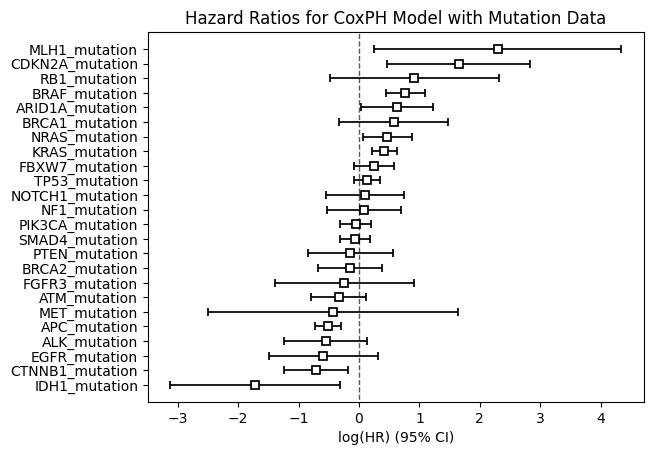

In [6]:
import pandas as pd
from lifelines import CoxPHFitter, KaplanMeierFitter
import matplotlib.pyplot as plt

# Assuming `merged_data_clean` contains the clinical data merged with mutation binary indicators
# and `TMB` is the Tumor Mutational Burden (already calculated and added as a column)

# Ensure the survival columns are numeric
merged_data_clean['Overall Survival (Months) from Dx of Met'] = pd.to_numeric(merged_data_clean['Overall Survival (Months) from Dx of Met'], errors='coerce')
merged_data_clean['Overall Survival Status'] = pd.to_numeric(merged_data_clean['Overall Survival Status'], errors='coerce')

# Define the genes of interest (binary mutation variables)
focus_genes = ['TP53_mutation', 'KRAS_mutation', 'EGFR_mutation', 'BRCA1_mutation', 'BRCA2_mutation','PTEN_mutation','APC_mutation',
               'PIK3CA_mutation','RB1_mutation','NF1_mutation','CDKN2A_mutation','IDH1_mutation','CTNNB1_mutation','NOTCH1_mutation',
               'BRAF_mutation','ARID1A_mutation','FBXW7_mutation','MLH1_mutation', 'SMAD4_mutation', 
               'ATM_mutation', 'FGFR3_mutation', 'ALK_mutation', 'MET_mutation', 
               'NRAS_mutation']
# Select covariates for the CoxPH model (including mutation data and clinical variables like age, gender, and TMB)
covariates = focus_genes

# Remove rows with missing data in covariates or survival data
cleaned_data = merged_data_clean.dropna(subset=covariates + ['Overall Survival (Months) from Dx of Met', 'Overall Survival Status'])

# Initialize CoxPH model
coxph = CoxPHFitter()

# Fit the CoxPH model using the selected covariates
coxph.fit(cleaned_data[['Overall Survival (Months) from Dx of Met', 'Overall Survival Status'] + covariates], 
          duration_col='Overall Survival (Months) from Dx of Met', 
          event_col='Overall Survival Status')

# Print the summary of the CoxPH model (hazard ratios, p-values, etc.)
coxph.print_summary()

# Optionally, plot the hazard ratios for all covariates
coxph.plot()
plt.title("Hazard Ratios for CoxPH Model with Mutation Data")
plt.show()


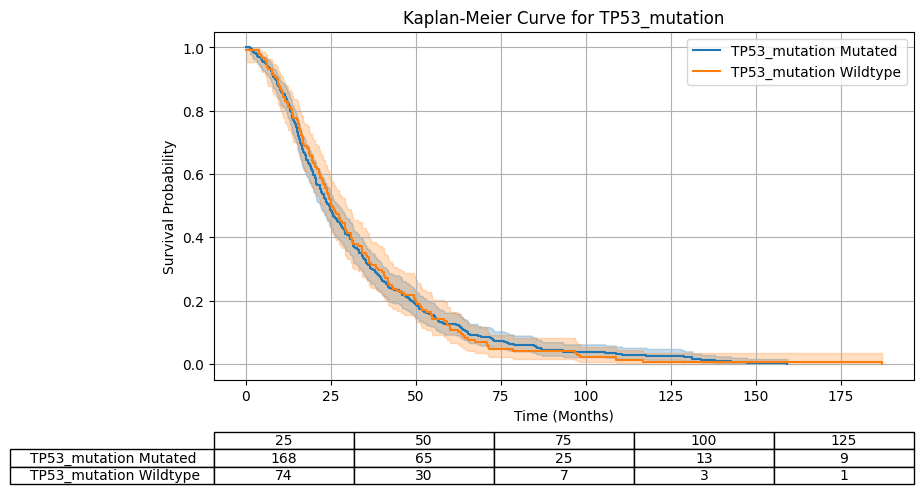

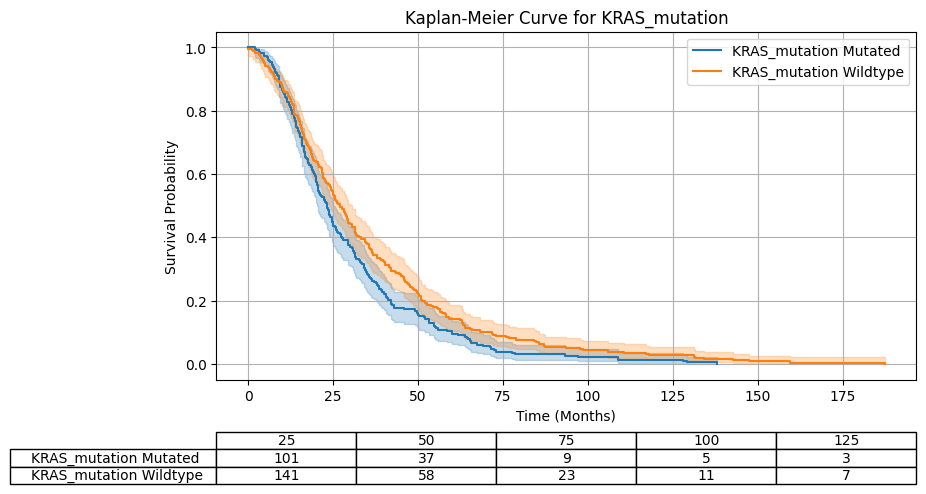

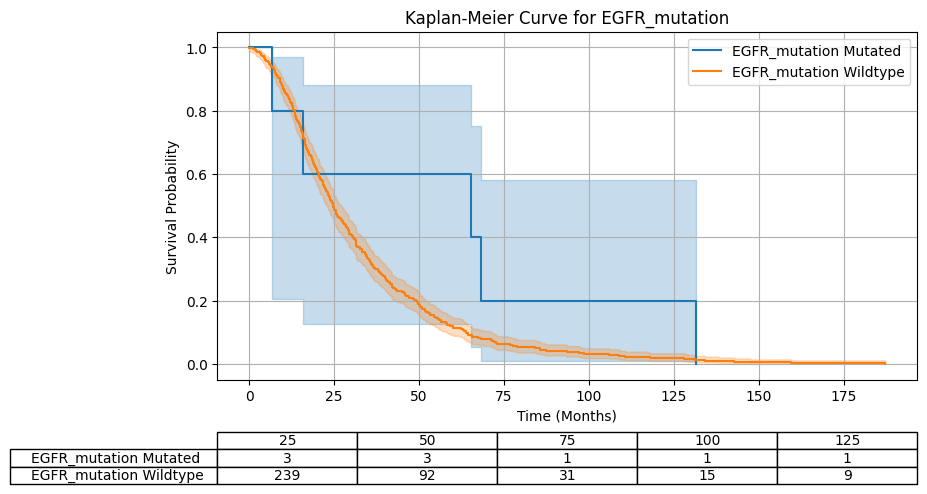

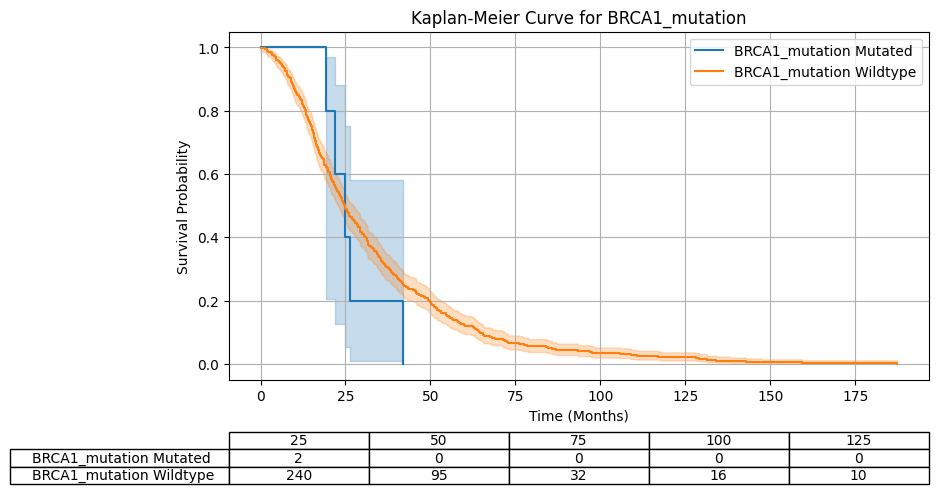

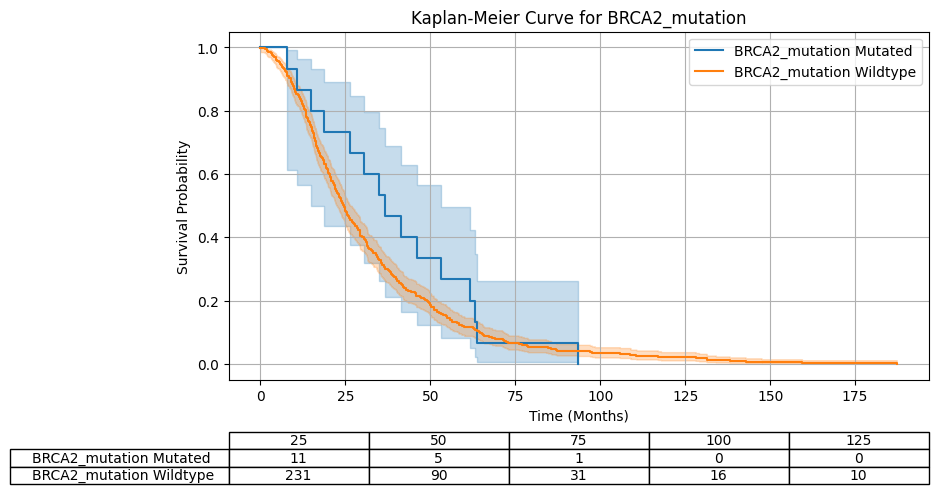

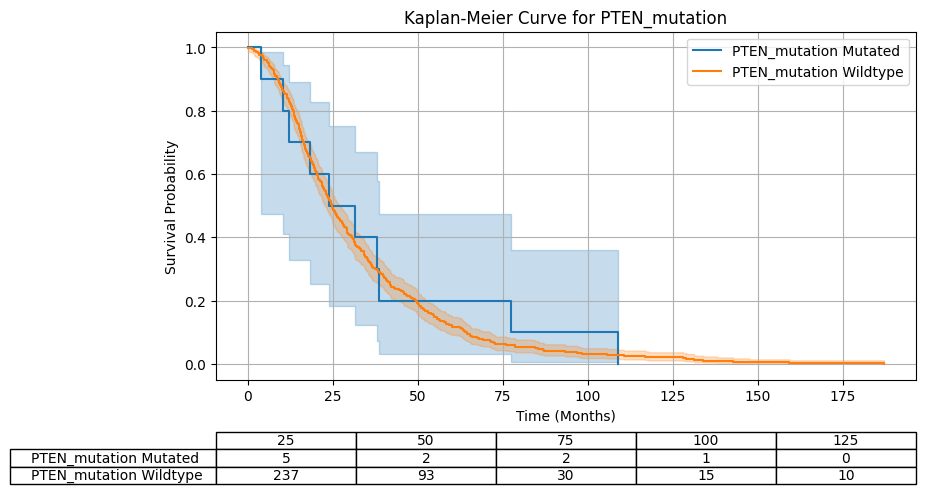

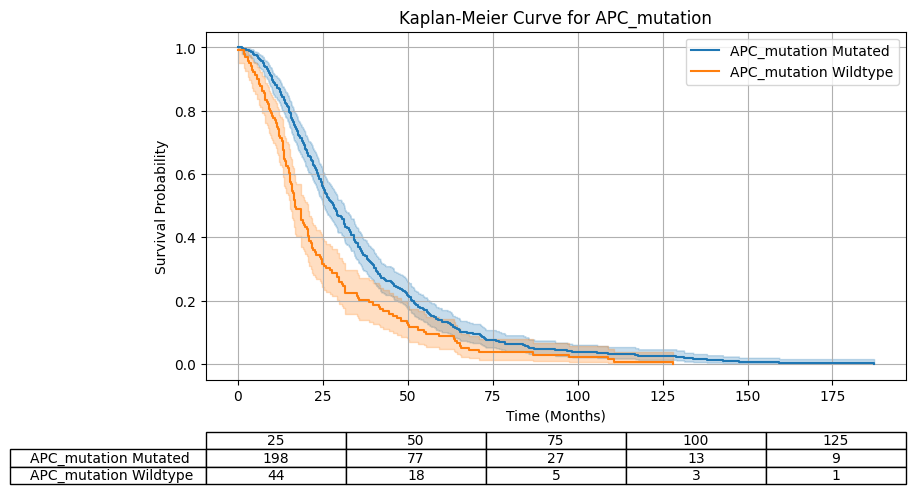

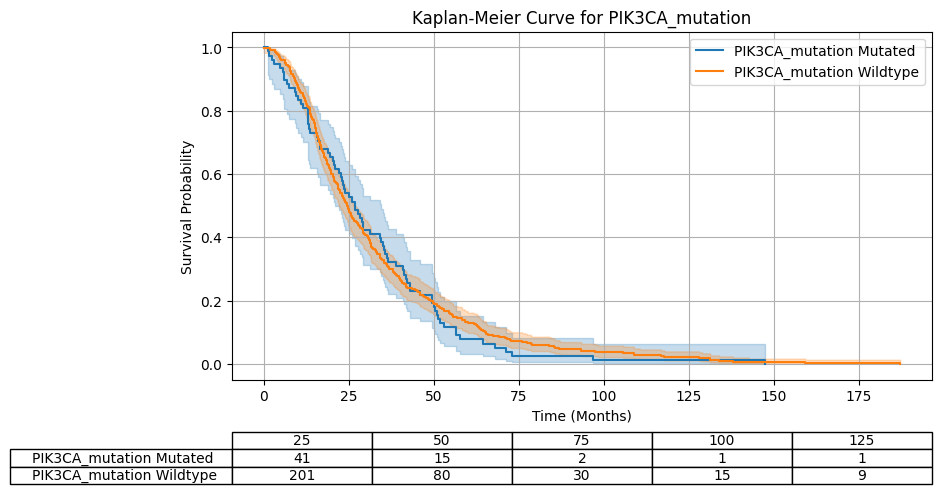

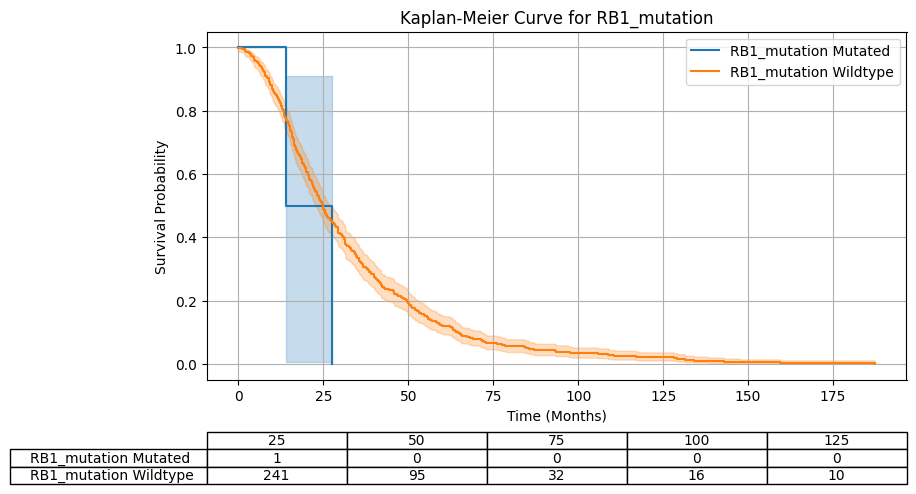

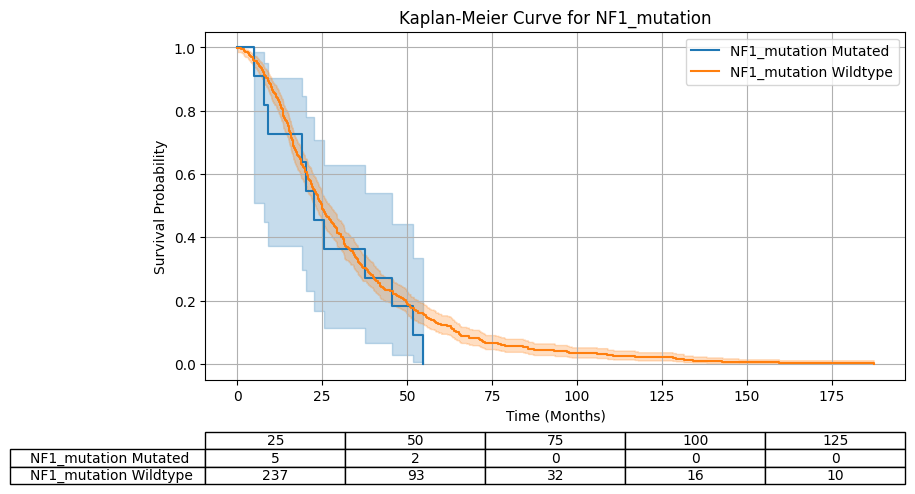

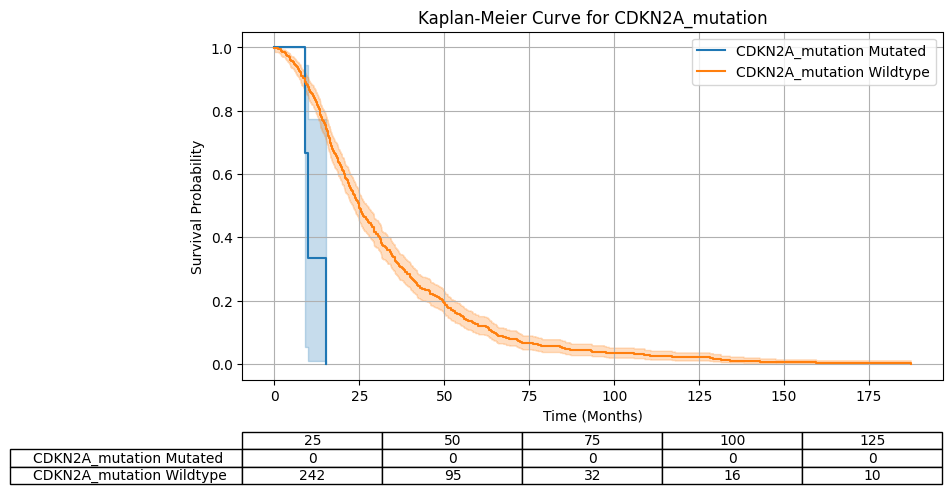

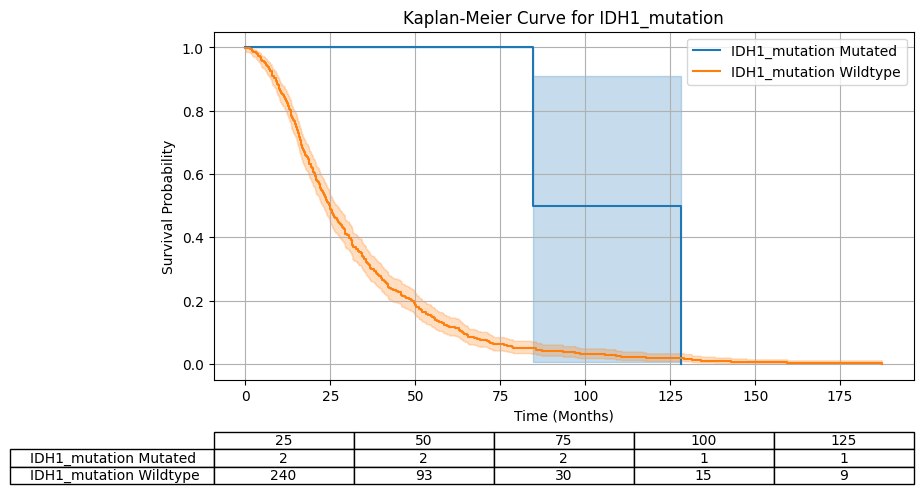

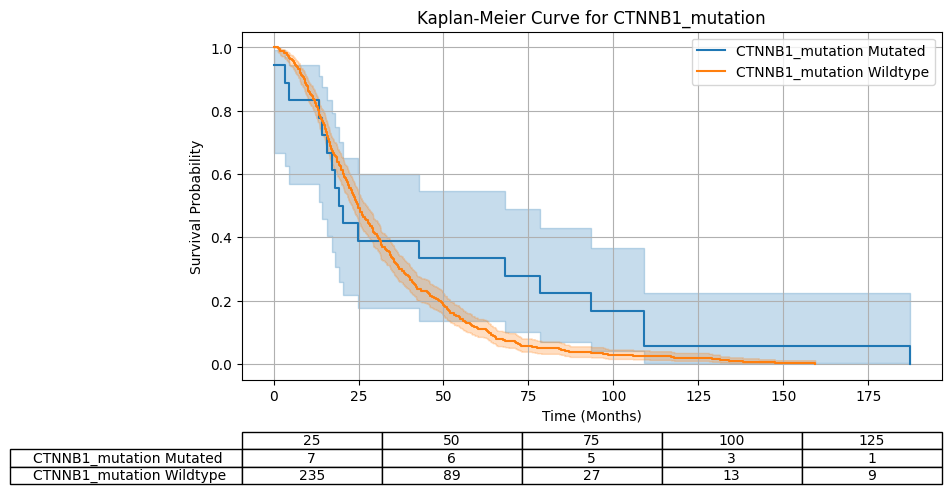

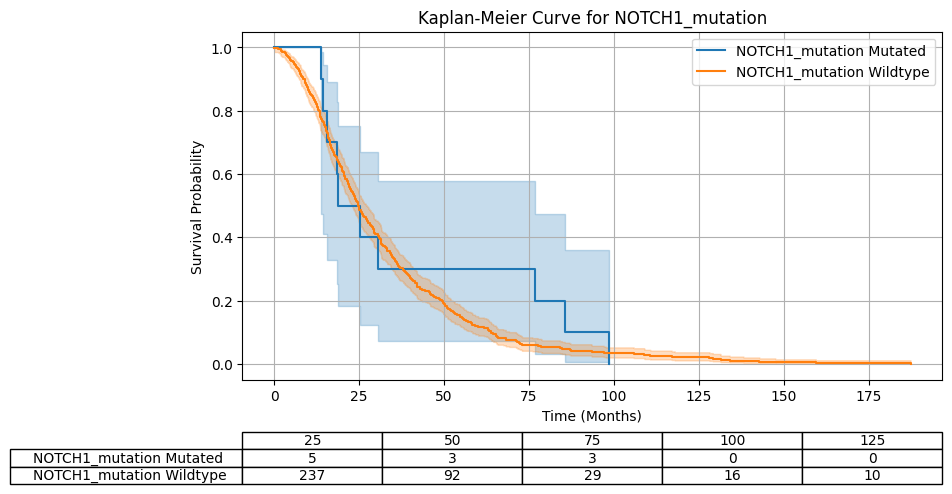

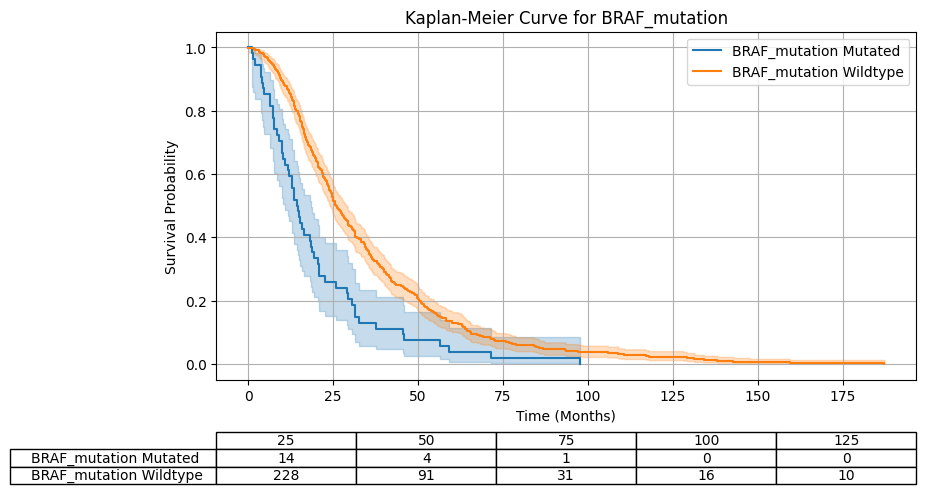

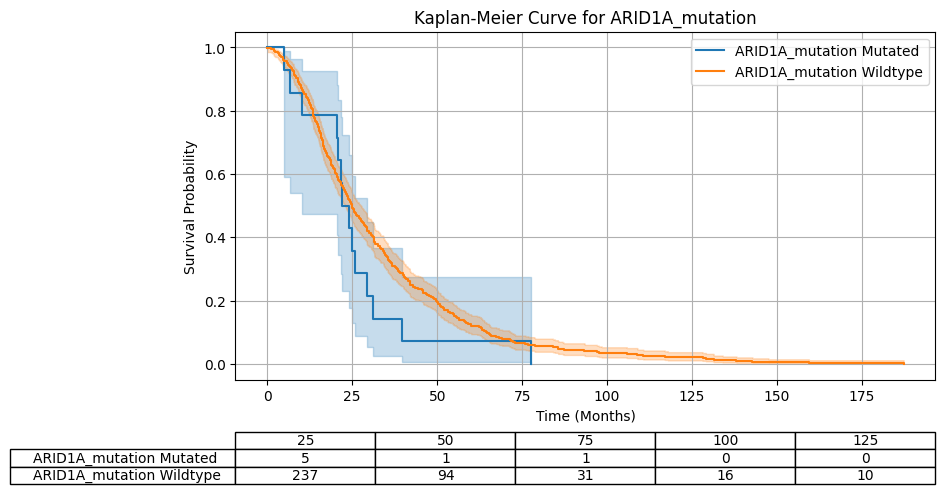

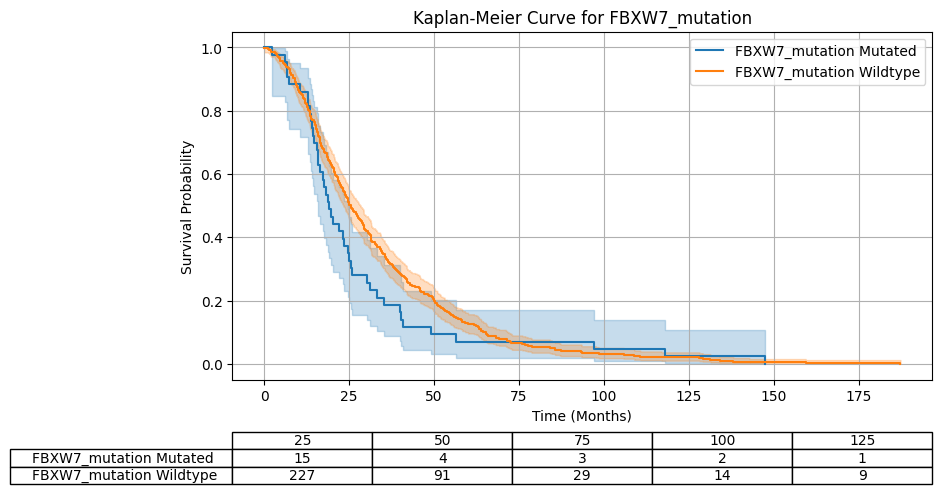

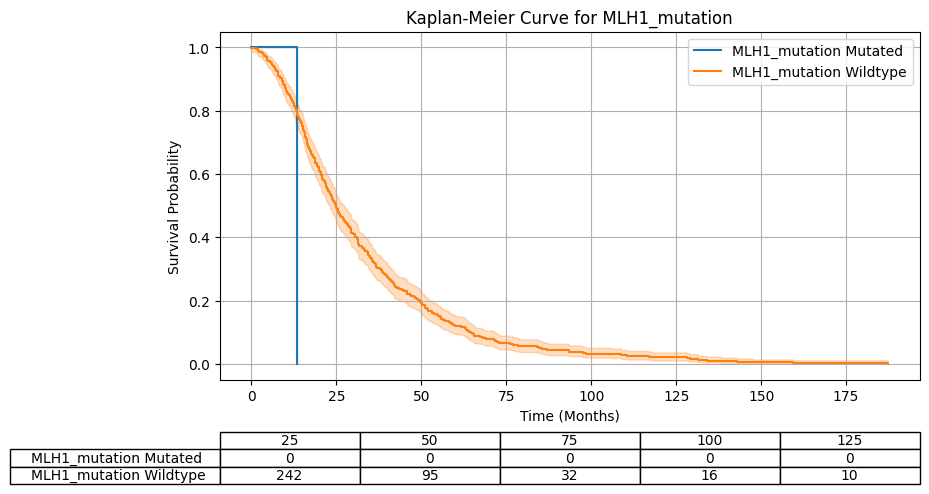

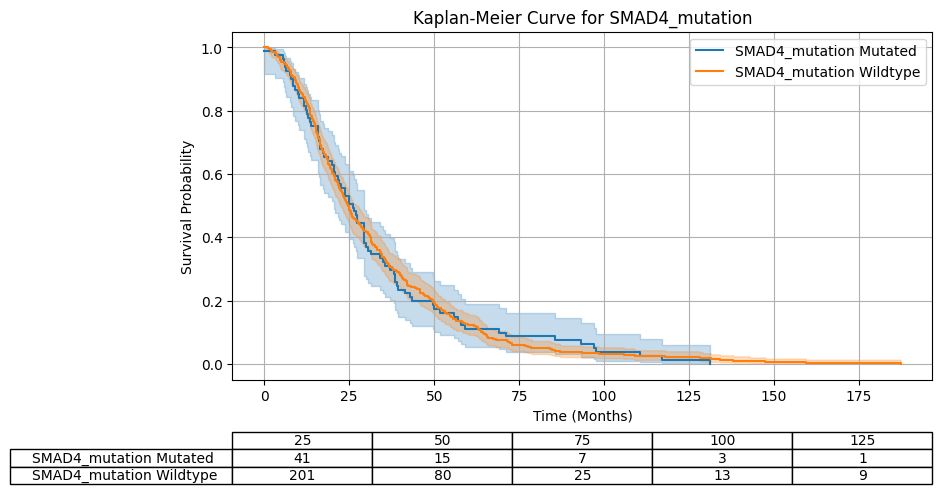

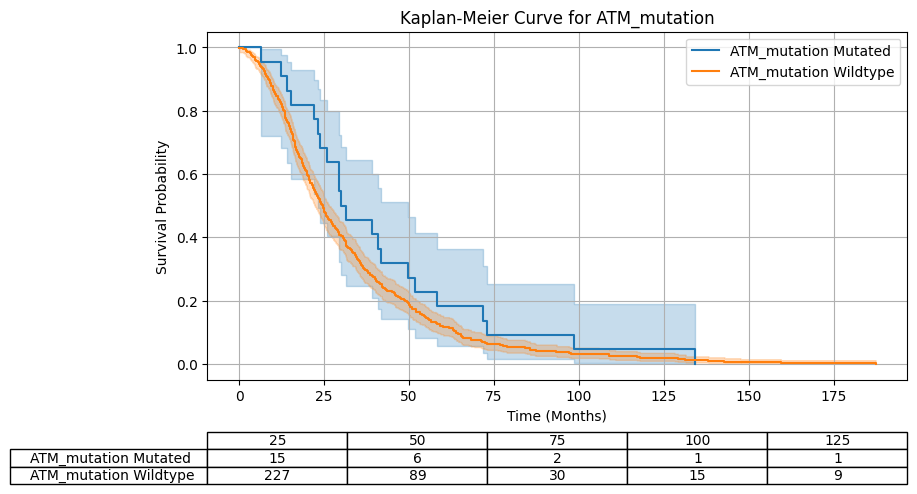

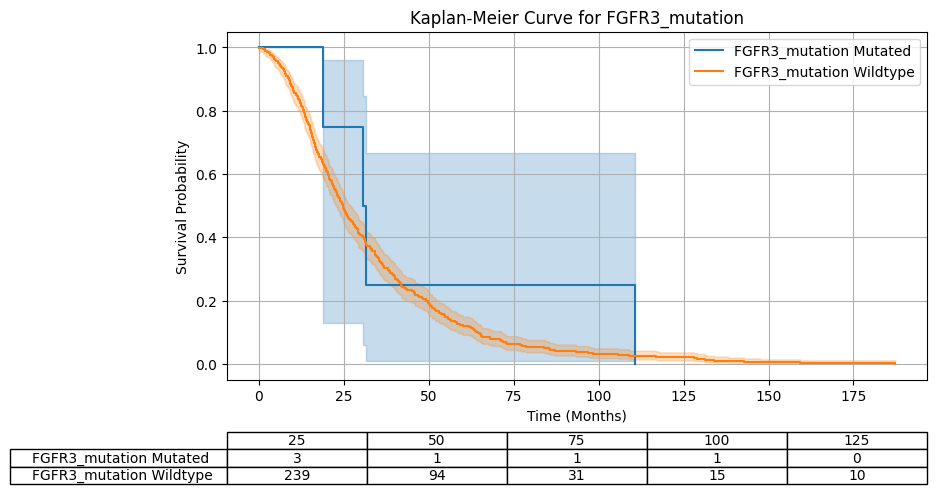

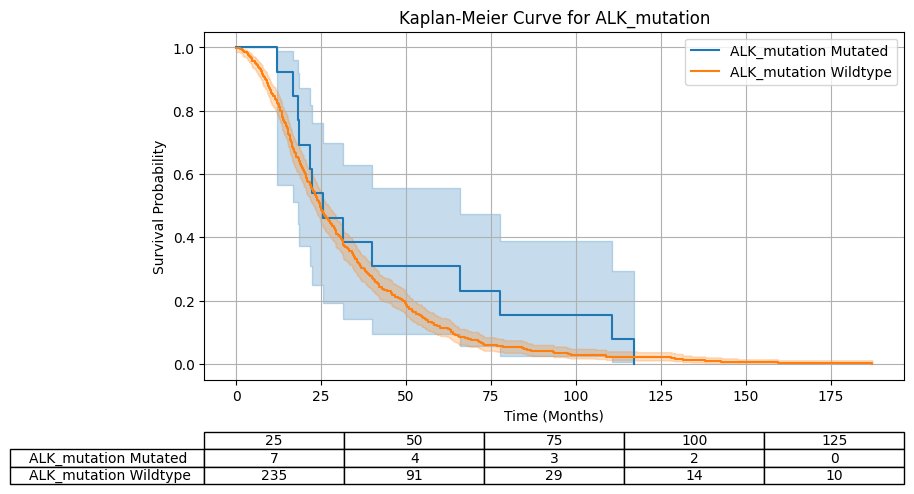

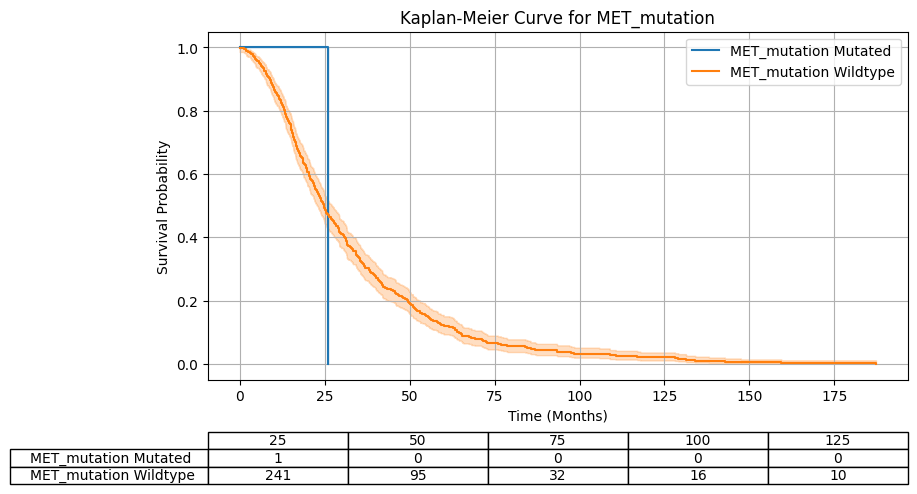

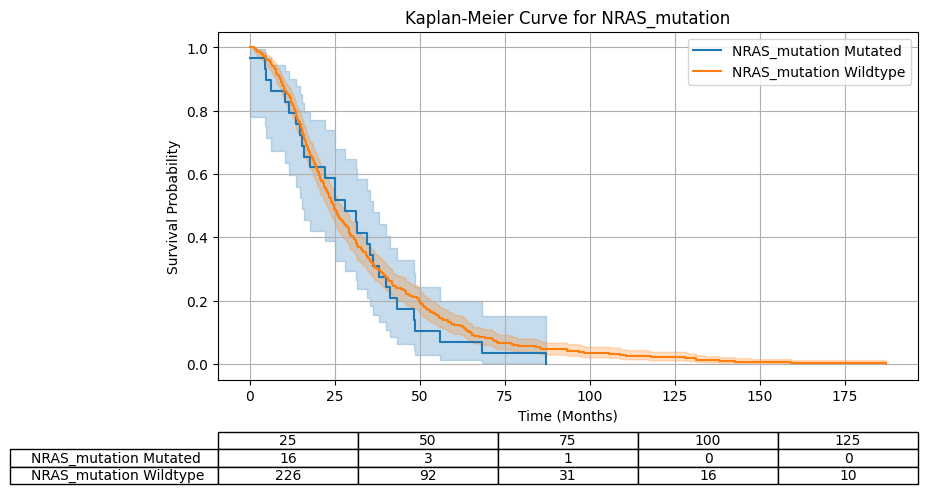

In [7]:
import pandas as pd
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

# Define the focus genes you want to plot
focus_genes = ['TP53_mutation', 'KRAS_mutation', 'EGFR_mutation', 'BRCA1_mutation', 'BRCA2_mutation','PTEN_mutation','APC_mutation',
               'PIK3CA_mutation','RB1_mutation','NF1_mutation','CDKN2A_mutation','IDH1_mutation','CTNNB1_mutation','NOTCH1_mutation',
               'BRAF_mutation','ARID1A_mutation','FBXW7_mutation','MLH1_mutation', 'SMAD4_mutation', 
               'ATM_mutation', 'FGFR3_mutation', 'ALK_mutation', 'MET_mutation', 
               'NRAS_mutation']

# Initialize the Kaplan-Meier fitter
kmf = KaplanMeierFitter()

# Define the survival columns
duration_col = 'Overall Survival (Months) from Dx of Met'
event_col = 'Overall Survival Status'

# Plot Kaplan-Meier curves for each mutation in focus_genes
for gene in focus_genes:
    plt.figure(figsize=(10, 6))
    
    # Fit the KM model for patients with the mutation (gene == 1)
    kmf.fit(merged_data_clean[merged_data_clean[gene] == 1][duration_col], 
            event_observed=merged_data_clean[merged_data_clean[gene] == 1][event_col], 
            label=f'{gene} Mutated')
    ax = kmf.plot_survival_function()

    # Fit the KM model for patients without the mutation (gene == 0)
    kmf.fit(merged_data_clean[merged_data_clean[gene] == 0][duration_col], 
            event_observed=merged_data_clean[merged_data_clean[gene] == 0][event_col], 
            label=f'{gene} Wildtype')
    kmf.plot_survival_function(ax=ax)

    # Customize the plot
    plt.title(f'Kaplan-Meier Curve for {gene}')
    plt.xlabel('Time (Months)')
    plt.ylabel('Survival Probability')
    plt.legend()
    plt.grid(True)
    
    # Optionally add risk table (manually add table below the plot)
    time_points = [25, 50, 75, 100, 125]  # Example time points in months
    n_at_risk_mutated = [sum(merged_data_clean[merged_data_clean[gene] == 1][duration_col] >= t) for t in time_points]
    n_at_risk_wildtype = [sum(merged_data_clean[merged_data_clean[gene] == 0][duration_col] >= t) for t in time_points]
    
    table_data = [n_at_risk_mutated, n_at_risk_wildtype]
    row_labels = [f'{gene} Mutated', f'{gene} Wildtype']
    
    # Add the table to the plot
    plt.table(cellText=table_data, 
              colLabels=time_points, 
              rowLabels=row_labels, 
              cellLoc='center', 
              loc='bottom', 
              bbox=[0, -0.3, 1, 0.15])

    # Adjust layout to make space for the table
    plt.subplots_adjust(left=0.2, bottom=0.3)
    
    # Show the plot
    plt.show()


/tmp/ipykernel_4298/1245343986.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data_clean['any_mutation'] = merged_data_clean[focus_genes].sum(axis=1) > 0


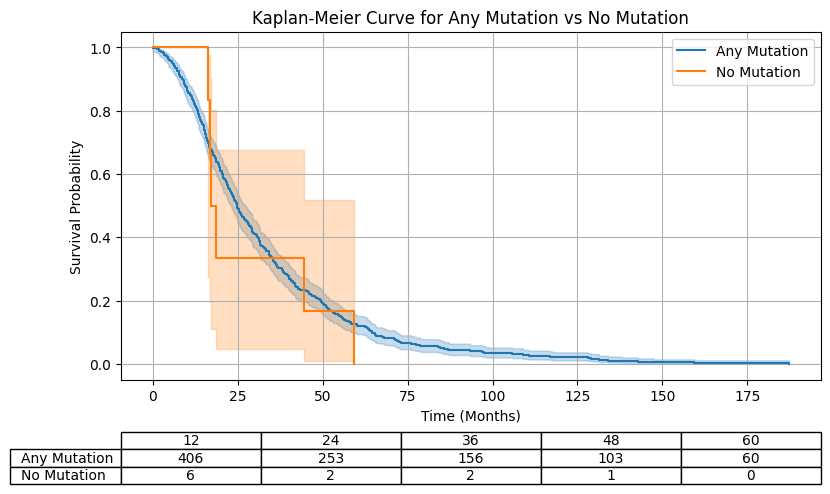

In [8]:
# Combine all mutations into a single variable: 'Any Mutation'
merged_data_clean['any_mutation'] = merged_data_clean[focus_genes].sum(axis=1) > 0

# Plot Kaplan-Meier curve for combined mutation effect (any mutation)
plt.figure(figsize=(10, 6))

# KM plot for patients with any mutation (any_mutation == True)
kmf.fit(merged_data_clean[merged_data_clean['any_mutation'] == True][duration_col], 
        event_observed=merged_data_clean[merged_data_clean['any_mutation'] == True][event_col], 
        label='Any Mutation')
ax = kmf.plot_survival_function()

# KM plot for patients without any mutations (any_mutation == False)
kmf.fit(merged_data_clean[merged_data_clean['any_mutation'] == False][duration_col], 
        event_observed=merged_data_clean[merged_data_clean['any_mutation'] == False][event_col], 
        label='No Mutation')
kmf.plot_survival_function(ax=ax)

# Customize the combined KM plot
plt.title('Kaplan-Meier Curve for Any Mutation vs No Mutation')
plt.xlabel('Time (Months)')
plt.ylabel('Survival Probability')
plt.legend()
plt.grid(True)

# Optionally add a combined risk table
time_points = [12, 24, 36, 48, 60]  # Example time points in months
n_at_risk_any_mutation = [sum(merged_data_clean[merged_data_clean['any_mutation'] == True][duration_col] >= t) for t in time_points]
n_at_risk_no_mutation = [sum(merged_data_clean[merged_data_clean['any_mutation'] == False][duration_col] >= t) for t in time_points]

table_data = [n_at_risk_any_mutation, n_at_risk_no_mutation]
row_labels = ['Any Mutation', 'No Mutation']

# Add the table to the plot
plt.table(cellText=table_data, 
          colLabels=time_points, 
          rowLabels=row_labels, 
          cellLoc='center', 
          loc='bottom', 
          bbox=[0, -0.3, 1, 0.15])

# Adjust layout to make space for the table
plt.subplots_adjust(left=0.2, bottom=0.3)

# Show the combined mutation plot
plt.show()

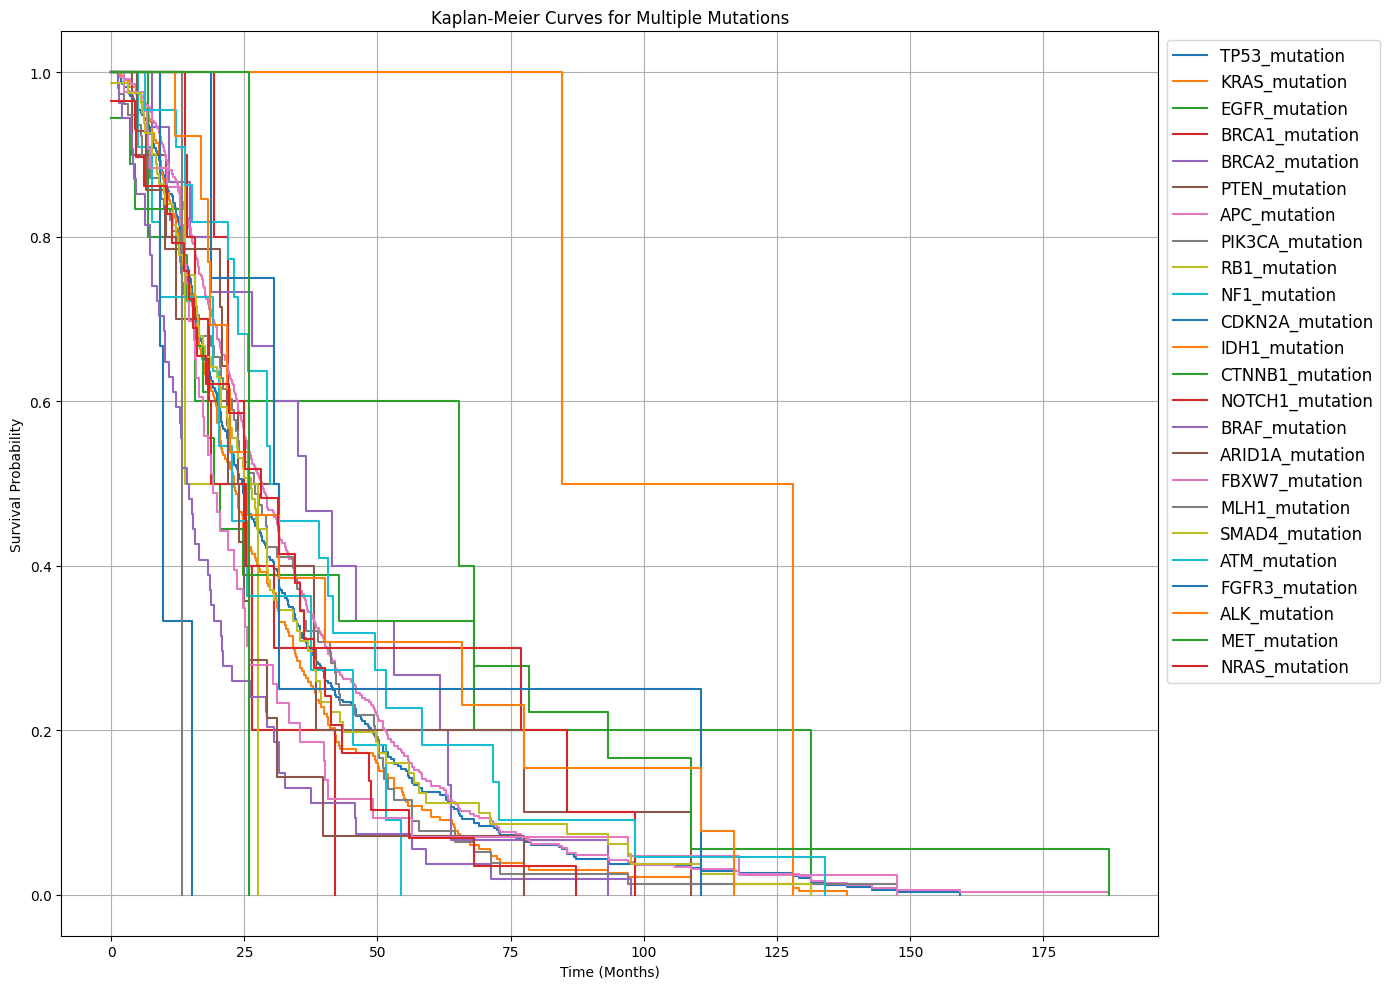

In [9]:
plt.figure(figsize=(14, 10))

# Plot Kaplan-Meier curves for each mutation in focus_genes
for gene in focus_genes:
    # Fit the KM model for patients with the mutation (gene == 1)
    kmf.fit(merged_data_clean[merged_data_clean[gene] == 1][duration_col], 
            event_observed=merged_data_clean[merged_data_clean[gene] == 1][event_col], 
            label=f'{gene}')
    
    # Plot the survival function without confidence intervals
    kmf.plot_survival_function(ci_show=False)

# Customize the plot
plt.title('Kaplan-Meier Curves for Multiple Mutations')
plt.xlabel('Time (Months)')
plt.ylabel('Survival Probability')
plt.grid(True)

# Display the legend outside of the plot for clarity
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

/tmp/ipykernel_4298/1698989138.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data_clean['Sex'] = merged_data_clean['Sex'].map({'Male': 1, 'Female': 0})
/tmp/ipykernel_4298/1698989138.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data_clean['Age at Diagnosis'] = pd.to_numeric(merged_data_clean['Age at Diagnosis'], errors='coerce')


ImportError: Pandas requires version '3.1.2' or newer of 'jinja2' (version '2.11.2' currently installed).

<lifelines.CoxPHFitter: fitted with 494 total observations, 0 right-censored observations>
             duration col = 'Overall Survival (Months) from Dx of Met'
                event col = 'Overall Survival Status'
      baseline estimation = breslow
   number of observations = 494
number of events observed = 494
   partial log-likelihood = -2571.94
         time fit was run = 2024-10-07 12:52:33 UTC

---
                  coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                         
TMB              -0.02      0.98      0.47           -0.95            0.90                0.39                2.47
Age at Diagnosis -0.01      0.99      0.00           -0.01            0.00                0.99                1.00
Sex              -0.14      0.87      0.09           -0.31            0.04                0.73                1.04

                  cmp to     z    p  -log2(p)
covariate                                    
TMB                 0.00 -0.05 0.96      0.06
Age at Diagnosis    0.00 -1.34 0.18      2.46
Sex                 0.00 -1.50 0.13      2.90
---
Concordance = 0.53
Partial AIC = 5149.88
log-likelihood ratio test = 4.26 on 3 df
-log2(p) of ll-ratio test = 2.09

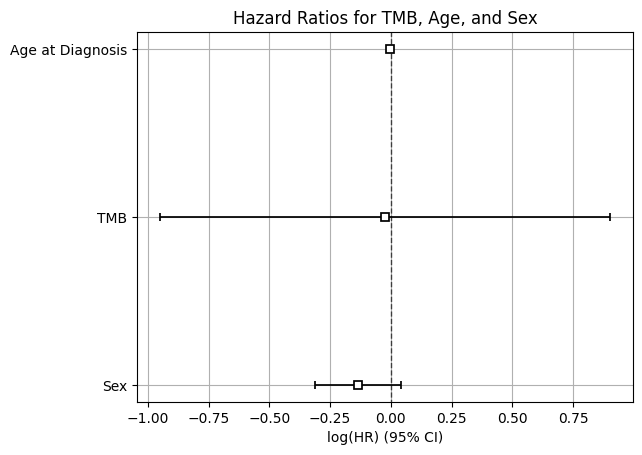

In [10]:
import pandas as pd
from lifelines import CoxPHFitter

# Assuming mutation_data and clinical_data are already loaded and cleaned

# Calculate Tumor Mutational Burden (TMB)
exome_size_mb = 30  # Example size in Mb
mutation_data['Mutation_Count'] = mutation_data.groupby('Tumor_Sample_Barcode')['Tumor_Sample_Barcode'].transform('count')
mutation_data['TMB'] = mutation_data['Mutation_Count'] / exome_size_mb
mutation_data_clean = mutation_data[['Tumor_Sample_Barcode', 'TMB']].drop_duplicates()

#  Merge TMB with Clinical Data
merged_data = pd.merge(clinical_data, mutation_data_clean, left_on='Sample ID', right_on='Tumor_Sample_Barcode', how='left')

#  Convert 'Overall Survival Status' to a binary variable
# Assuming the status is like '1:DECEASED' and '0:ALIVE'
merged_data['Overall Survival Status'] = merged_data['Overall Survival Status'].map({'1:DECEASED': 1, '0:ALIVE': 0})

# Ensure 'Sex' is binary and 'Age at Diagnosis' is numeric
merged_data_clean = merged_data.dropna(subset=['Overall Survival (Months) from Dx of Met', 'Overall Survival Status', 'TMB'])
merged_data_clean['Sex'] = merged_data_clean['Sex'].map({'Male': 1, 'Female': 0})
merged_data_clean['Age at Diagnosis'] = pd.to_numeric(merged_data_clean['Age at Diagnosis'], errors='coerce')

# Drop rows with any remaining NaN values in these important columns
merged_data_clean = merged_data_clean.dropna(subset=['Age at Diagnosis', 'Sex'])

# : Cox Proportional Hazards Model using TMB, Age, and Sex
coxph = CoxPHFitter()
coxph.fit(merged_data_clean[['Overall Survival (Months) from Dx of Met', 'Overall Survival Status', 'TMB', 'Age at Diagnosis', 'Sex']], 
          duration_col='Overall Survival (Months) from Dx of Met', 
          event_col='Overall Survival Status')

# Print the CoxPH model summary
coxph.print_summary()

# Optionally plot the hazard ratios
coxph.plot()
plt.title('Hazard Ratios for TMB, Age, and Sex')
plt.grid(True)
plt.show()


/tmp/ipykernel_4298/4293277562.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data_clean['Sex'] = merged_data_clean['Sex'].map({'Male': 1, 'Female': 0})
/tmp/ipykernel_4298/4293277562.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data_clean['Age at Diagnosis'] = pd.to_numeric(merged_data_clean['Age at Diagnosis'], errors='coerce')


ImportError: Pandas requires version '3.1.2' or newer of 'jinja2' (version '2.11.2' currently installed).

<lifelines.CoxPHFitter: fitted with 494 total observations, 0 right-censored observations>
             duration col = 'Overall Survival (Months) from Dx of Met'
                event col = 'Overall Survival Status'
      baseline estimation = breslow
   number of observations = 494
number of events observed = 494
   partial log-likelihood = -2571.94
         time fit was run = 2024-10-07 12:52:38 UTC

---
                  coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                         
TMB              -0.02      0.98      0.47           -0.95            0.90                0.39                2.47
Age at Diagnosis -0.01      0.99      0.00           -0.01            0.00                0.99                1.00
Sex              -0.14      0.87      0.09           -0.31            0.04                0.73                1.04

                  cmp to     z    p  -log2(p)
covariate                                    
TMB                 0.00 -0.05 0.96      0.06
Age at Diagnosis    0.00 -1.34 0.18      2.46
Sex                 0.00 -1.50 0.13      2.90
---
Concordance = 0.53
Partial AIC = 5149.88
log-likelihood ratio test = 4.26 on 3 df
-log2(p) of ll-ratio test = 2.09

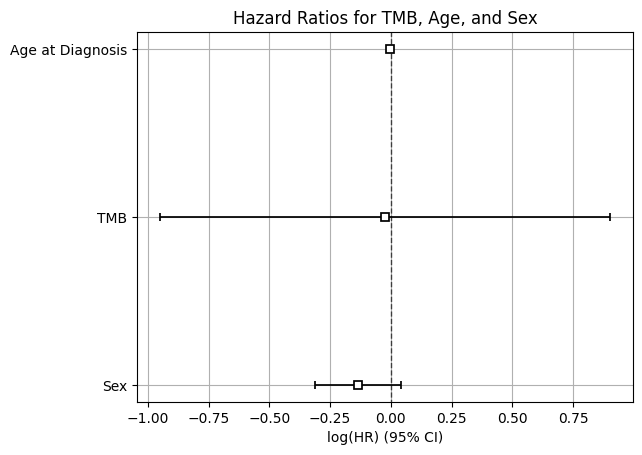

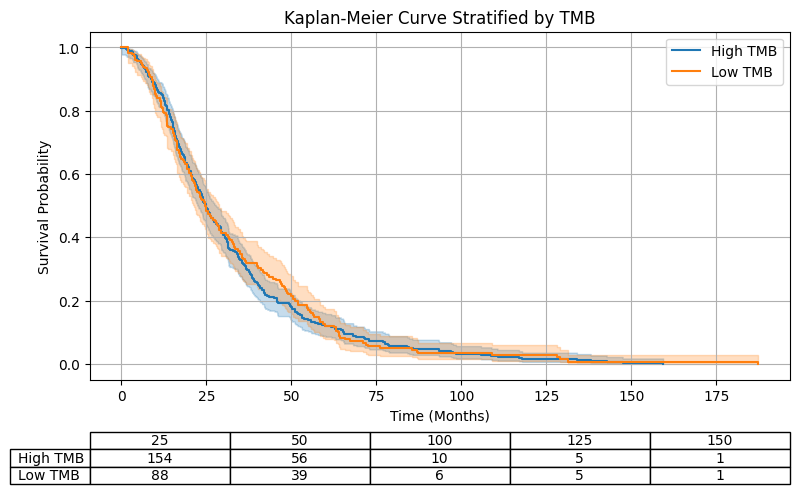

In [11]:
import pandas as pd
from lifelines import CoxPHFitter, KaplanMeierFitter
import matplotlib.pyplot as plt



# Calculate Tumor Mutational Burden (TMB)
exome_size_mb = 30  # Example size in Mb
mutation_data['Mutation_Count'] = mutation_data.groupby('Tumor_Sample_Barcode')['Tumor_Sample_Barcode'].transform('count')
mutation_data['TMB'] = mutation_data['Mutation_Count'] / exome_size_mb
mutation_data_clean = mutation_data[['Tumor_Sample_Barcode', 'TMB']].drop_duplicates()

# Merge TMB with Clinical Data
merged_data = pd.merge(clinical_data, mutation_data_clean, left_on='Sample ID', right_on='Tumor_Sample_Barcode', how='left')

# Convert 'Overall Survival Status' to a binary variable
merged_data['Overall Survival Status'] = merged_data['Overall Survival Status'].map({'1:DECEASED': 1, '0:ALIVE': 0})

# Ensure 'Sex' is binary and 'Age at Diagnosis' is numeric
merged_data_clean = merged_data.dropna(subset=['Overall Survival (Months) from Dx of Met', 'Overall Survival Status', 'TMB'])
merged_data_clean['Sex'] = merged_data_clean['Sex'].map({'Male': 1, 'Female': 0})
merged_data_clean['Age at Diagnosis'] = pd.to_numeric(merged_data_clean['Age at Diagnosis'], errors='coerce')

# Drop rows with any remaining NaN values in these important columns
merged_data_clean = merged_data_clean.dropna(subset=['Age at Diagnosis', 'Sex'])

#  Cox Proportional Hazards Model using TMB, Age, and Sex
coxph = CoxPHFitter()
coxph.fit(merged_data_clean[['Overall Survival (Months) from Dx of Met', 'Overall Survival Status', 'TMB', 'Age at Diagnosis', 'Sex']], 
          duration_col='Overall Survival (Months) from Dx of Met', 
          event_col='Overall Survival Status')

# Print the CoxPH model summary
coxph.print_summary()

# Optionally plot the hazard ratios
coxph.plot()
plt.title('Hazard Ratios for TMB, Age, and Sex')
plt.grid(True)
plt.show()

# --- Kaplan-Meier Plot ---
# Stratify by TMB (e.g., high TMB vs low TMB based on the median value)
median_tmb = merged_data_clean['TMB'].median()
high_tmb = merged_data_clean['TMB'] >= median_tmb
low_tmb = merged_data_clean['TMB'] < median_tmb

# Initialize Kaplan-Meier fitter
kmf = KaplanMeierFitter()

# Fit the KM model for high TMB group
plt.figure(figsize=(10, 6))
kmf.fit(merged_data_clean[high_tmb]['Overall Survival (Months) from Dx of Met'], 
        event_observed=merged_data_clean[high_tmb]['Overall Survival Status'], 
        label='High TMB')
ax = kmf.plot_survival_function()

# Fit the KM model for low TMB group
kmf.fit(merged_data_clean[low_tmb]['Overall Survival (Months) from Dx of Met'], 
        event_observed=merged_data_clean[low_tmb]['Overall Survival Status'], 
        label='Low TMB')
kmf.plot_survival_function(ax=ax)

# Customize the KM plot
plt.title('Kaplan-Meier Curve Stratified by TMB')
plt.xlabel('Time (Months)')
plt.ylabel('Survival Probability')
plt.grid(True)

# Define time points for risk table
time_points = [25, 50, 100, 125, 150]  # Example time points in months
n_at_risk_high = [sum(merged_data_clean[high_tmb]['Overall Survival (Months) from Dx of Met'] >= t) for t in time_points]
n_at_risk_low = [sum(merged_data_clean[low_tmb]['Overall Survival (Months) from Dx of Met'] >= t) for t in time_points]

# Create table data
table_data = [n_at_risk_high, n_at_risk_low]
row_labels = ['High TMB', 'Low TMB']

# Add the table to the plot
plt.table(cellText=table_data, 
          colLabels=time_points, 
          rowLabels=row_labels, 
          cellLoc='center', 
          loc='bottom', 
          bbox=[0, -0.3, 1, 0.15])

# Adjust layout to make space for the table
plt.subplots_adjust(left=0.2, bottom=0.3)

# Show the plot
plt.show()


In [2]:
####CNV +CLINICAL
import pandas as pd

# Load the clinical and CNV data
clinical_data = pd.read_csv('crc_eo_2020_clinical_data.tsv', sep='\t')
cnv_data = pd.read_csv('data_cna.txt', sep='\t')

# Display the columns of both datasets to understand their structure
print("Clinical Data Columns:")
print(clinical_data.columns)

print("\nCNV Data Columns:")
print(cnv_data.columns)

# Optionally, display the first few rows to inspect the data
print("\nFirst few rows of Clinical Data:")
print(clinical_data.head())

print("\nFirst few rows of CNV Data:")
print(cnv_data.head())


Clinical Data Columns:
Index(['Study ID', 'Patient ID', 'Sample ID', 'Age at Diagnosis', 'Age Groups',
       'Age Subgroups', 'BMI', 'BMI categories', 'Cancer Type',
       'Cancer Type Detailed', 'Impact TMB Score', 'Diabetes Mellitus History',
       'First Symptoms at Diagnosis', 'Fraction Genome Altered', 'Gene Panel',
       'Hypertension History', 'Metastasectomy', 'Metastatic Site',
       'Molecular Subtype', 'MSI Score', 'MSI Type', 'Mutation Count',
       'Oncotree Code', 'Overall Survival (Months) from Dx of Met',
       'Overall Survival Status', 'Primary Tumor Location', 'PUMP',
       'Race Category', 'Sample Class', 'Number of Samples Per Patient',
       'Sample coverage', 'Sample Type', 'Sex', 'Smoker Status',
       'Smoking history', 'Somatic Status', 'Stage at Diagnosis',
       'First Line Treatment at Metastasis', 'Tumor Grade', 'Tumor Purity',
       'Used for Response', 'Used in Clinical Analysis',
       'Used in Genomic MSS Analysis',
       'Used in Genomic

In [10]:
# Rename columns in clinical data to simplify matching with CNV data
clinical_data = clinical_data.rename(columns={'Sample ID': 'Sample_ID'})

# Transpose the CNV data to make samples rows and genes columns
cnv_data_t = cnv_data.set_index('Hugo_Symbol').T.reset_index()

# Merge CNV data with clinical data on 'Sample_ID' (the CNV sample names are in the columns)
merged_data = pd.merge(clinical_data, cnv_data_t, left_on='Sample_ID', right_on='index')

# Drop the index column used for merging
merged_data = merged_data.drop(columns=['index'])

# Display the first few rows of the merged data
print(merged_data.head())


      Study ID Patient ID          Sample_ID  Age at Diagnosis Age Groups  \
0  crc_eo_2020  P-0000119  P-0000119-T01-IM3              67.0         AO   
1  crc_eo_2020  P-0000520  P-0000520-T01-IM3              64.0         AO   
2  crc_eo_2020  P-0000552  P-0000552-T01-IM3              63.0         AO   
3  crc_eo_2020  P-0000616  P-0000616-T01-IM3              58.0         AO   
4  crc_eo_2020  P-0000625  P-0000625-T01-IM3              68.0         AO   

  Age Subgroups   BMI BMI categories        Cancer Type  Cancer Type Detailed  \
0            AO  24.7             NW  Colorectal Cancer  Colon Adenocarcinoma   
1            AO  18.9             NW  Colorectal Cancer  Colon Adenocarcinoma   
2            AO  19.5             NW  Colorectal Cancer  Colon Adenocarcinoma   
3            AO  24.9             NW  Colorectal Cancer  Colon Adenocarcinoma   
4            AO  25.0             OW  Colorectal Cancer  Colon Adenocarcinoma   

   ...  H3-4 ERCC3 ERCC4  CARM1 ERCC2 RPS6KB2  HIS

In [6]:
# Example: Create a binary indicator for the 'RB1' gene's CNV status
merged_data['RB1_Status'] = merged_data['RB1'].apply(lambda x: 'amplified' if x > 0 else ('deleted' if x < 0 else 'neutral'))

# Apply the same logic for multiple genes (if needed)
genes_of_interest = ['TP53', 'KRAS', 'EGFR', 'BRCA1', 'BRCA2', 'PTEN', 'APC', 'PIK3CA', 
    'RB1', 'NF1', 'CDKN2A', 'IDH1', 'CTNNB1', 'NOTCH1', 'BRAF',
    'ARID1A', 'FBXW7', 'MLH1', 'SMAD4', 'ATM', 'FGFR3', 'ALK', 'MET', 'NRAS']
for gene in genes_of_interest:
    merged_data[gene + '_Status'] = merged_data[gene].apply(lambda x: 'amplified' if x > 0 else ('deleted' if x < 0 else 'neutral'))

# Display the first few rows of the updated data
print(merged_data.head())


      Study ID Patient ID          Sample_ID  Age at Diagnosis Age Groups  \
0  crc_eo_2020  P-0000119  P-0000119-T01-IM3              67.0         AO   
1  crc_eo_2020  P-0000520  P-0000520-T01-IM3              64.0         AO   
2  crc_eo_2020  P-0000552  P-0000552-T01-IM3              63.0         AO   
3  crc_eo_2020  P-0000616  P-0000616-T01-IM3              58.0         AO   
4  crc_eo_2020  P-0000625  P-0000625-T01-IM3              68.0         AO   

  Age Subgroups   BMI BMI categories        Cancer Type  Cancer Type Detailed  \
0            AO  24.7             NW  Colorectal Cancer  Colon Adenocarcinoma   
1            AO  18.9             NW  Colorectal Cancer  Colon Adenocarcinoma   
2            AO  19.5             NW  Colorectal Cancer  Colon Adenocarcinoma   
3            AO  24.9             NW  Colorectal Cancer  Colon Adenocarcinoma   
4            AO  25.0             OW  Colorectal Cancer  Colon Adenocarcinoma   

   ...  BRAF_Status ARID1A_Status FBXW7_Status  ML

In [7]:
# Prepare the survival data (using 'Overall Survival (Months) from Dx of Met' and 'Overall Survival Status')
merged_data['time'] = merged_data['Overall Survival (Months) from Dx of Met']
merged_data['event'] = merged_data['Overall Survival Status'].apply(lambda x: 1 if x == 'Dead' else 0)

# Drop any missing data
merged_data.dropna(subset=['time', 'event'], inplace=True)

# Display data ready for survival analysis
print(merged_data.head())


      Study ID Patient ID          Sample_ID  Age at Diagnosis Age Groups  \
0  crc_eo_2020  P-0000119  P-0000119-T01-IM3              67.0         AO   
1  crc_eo_2020  P-0000520  P-0000520-T01-IM3              64.0         AO   
2  crc_eo_2020  P-0000552  P-0000552-T01-IM3              63.0         AO   
3  crc_eo_2020  P-0000616  P-0000616-T01-IM3              58.0         AO   
4  crc_eo_2020  P-0000625  P-0000625-T01-IM3              68.0         AO   

  Age Subgroups   BMI BMI categories        Cancer Type  Cancer Type Detailed  \
0            AO  24.7             NW  Colorectal Cancer  Colon Adenocarcinoma   
1            AO  18.9             NW  Colorectal Cancer  Colon Adenocarcinoma   
2            AO  19.5             NW  Colorectal Cancer  Colon Adenocarcinoma   
3            AO  24.9             NW  Colorectal Cancer  Colon Adenocarcinoma   
4            AO  25.0             OW  Colorectal Cancer  Colon Adenocarcinoma   

   ...  FBXW7_Status MLH1_Status SMAD4_Status  ATM